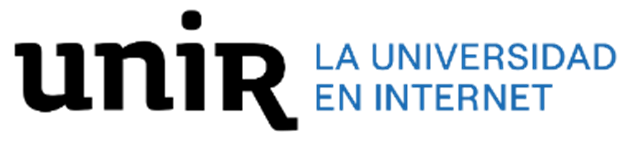

# Universidad Internacional de La Rioja
## Escuela Superior de Ingeniería y Tecnología

### Máster Universitario en Análisis y Visualización de Datos Masivos/ Visual Analytics and Big Data

### Pruebas Saber 11, modelo predictivo del desempeño académico a partir de factores socioeconómicos

#### Trabajo fin de estudio presentado por
- Carlos Augusto Valero González 
- Jhon Fredy Alvarez Perez 
- Nelson Alejandro Díaz Villalobos 

#### Director
- Arturo Peralta Martin Palomino 


## Importado de librerías

In [131]:
# Librerías básicas
import numpy as np
import pandas as pd
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns


# Librerías para modelos predictivos
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from kneed import KneeLocator

## Lectura de los datos

In [132]:
# Indicar la ruta del archivo
archivo_csv = "Saber_11__2020-2_20240513.csv"

# Leer de la ruta indicada
datos = pd.read_csv(archivo_csv)

# Mostrar las primeras filas de los datos
datos.head()


ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO    ESTU_FECHANACIMIENTO  \
0                 TI             SUIZA           F  03/03/2003 12:00:00 AM   
1                PEP         VENEZUELA           M  05/10/2002 12:00:00 AM   
2                 TI         VENEZUELA           F  12/14/2003 12:00:00 AM   
3                 CE         VENEZUELA           M  04/12/2003 12:00:00 AM   
4                 TI          COLOMBIA           F  03/03/2004 12:00:00 AM   

   PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE ESTU_TIENEETNIA  \
0    20204  SB11202040211436      ESTUDIANTE            SUIZA              No   
1    20204  SB11202040433216      ESTUDIANTE        VENEZUELA              No   
2    20204  SB11202040244180      ESTUDIANTE        VENEZUELA              No   
3    20204  SB11202040210971      ESTUDIANTE        VENEZUELA              No   
4    20204  SB11202040235382      ESTUDIANTE         COLOMBIA              No   

  ESTU_DEPTO_RESIDE  ...  PUNT_INGLES PERCENTIL_INGLES  DESEMP_INGLES  \
0      CUNDINAMARCA  ...         55.0               81             A1   
1      CUNDINAMARCA  ...         33.0                6             A-   
2      CUNDINAMARCA  ...         59.0               87             A2   
3      CUNDINAMARCA  ...         47.0               58             A-   
4      CUNDINAMARCA  ...         43.0               40             A-   

  PUNT_GLOBAL PERCENTIL_GLOBAL ESTU_INSE_INDIVIDUAL ESTU_NSE_INDIVIDUAL  \
0         244               49            54.882365                 3.0   
1         238               44            49.252311                 2.0   
2         325               94            40.733672                 1.0   
3         238               45            48.217953                 2.0   
4         202               19            60.912192                 3.0   

  ESTU_NSE_ESTABLECIMIENTO ESTU_ESTADOINVESTIGACION         ESTU_GENERACION-E  
0                      3.0                 PUBLICAR                        NO  
1                      2.0                 PUBLICAR                        NO  
2                      3.0                 PUBLICAR  GENERACION E - GRATUIDAD  
3                      3.0                 PUBLICAR                        NO  
4                      3.0                 PUBLICAR                        NO  

[5 rows x 81 columns]

## Análisis Exploratorio Inicial

### Descripción del DataFrame

In [133]:
# Mostrar medidas estadísticas para las variables numéricas, de forma traspuesta para facilitar la lectura
datos.describe().T

count          mean           std  \
PERIODO                        504872.0  2.020400e+04  0.000000e+00   
ESTU_COD_RESIDE_DEPTO          504870.0  3.609967e+01  6.138110e+02   
ESTU_COD_RESIDE_MCPIO          504870.0  3.257905e+04  2.636752e+04   
COLE_CODIGO_ICFES              504872.0  2.910736e+05  2.894432e+05   
COLE_COD_DANE_ESTABLECIMIENTO  504872.0  2.013835e+11  9.096065e+10   
COLE_COD_DANE_SEDE             504872.0  2.017896e+11  9.151341e+10   
COLE_COD_MCPIO_UBICACION       504872.0  3.255715e+04  2.633793e+04   
COLE_COD_DEPTO_UBICACION       504872.0  3.231800e+01  2.631266e+01   
ESTU_COD_MCPIO_PRESENTACION    504664.0  3.258047e+04  2.640857e+04   
ESTU_COD_DEPTO_PRESENTACION    504664.0  3.235859e+01  2.638201e+01   
PUNT_LECTURA_CRITICA           504872.0  5.215678e+01  1.015843e+01   
PERCENTIL_LECTURA_CRITICA      504872.0  5.019397e+01  2.890797e+01   
DESEMP_LECTURA_CRITICA         504872.0  2.612852e+00  7.258455e-01   
PUNT_MATEMATICAS               504872.0  5.101975e+01  1.164766e+01   
PERCENTIL_MATEMATICAS          504872.0  5.022957e+01  2.887243e+01   
DESEMP_MATEMATICAS             504872.0  2.470826e+00  7.212303e-01   
PUNT_C_NATURALES               504872.0  4.819737e+01  1.049961e+01   
PERCENTIL_C_NATURALES          504872.0  5.027138e+01  2.886437e+01   
DESEMP_C_NATURALES             504872.0  2.012356e+00  7.527008e-01   
PUNT_SOCIALES_CIUDADANAS       504872.0  4.823394e+01  1.197058e+01   
PERCENTIL_SOCIALES_CIUDADANAS  504872.0  5.023811e+01  2.888935e+01   
DESEMP_SOCIALES_CIUDADANAS     504872.0  2.020696e+00  8.257690e-01   
PUNT_INGLES                    504538.0  4.688351e+01  1.131313e+01   
PERCENTIL_INGLES               504872.0  5.012368e+01  2.892794e+01   
PUNT_GLOBAL                    504872.0  2.483471e+02  4.869252e+01   
PERCENTIL_GLOBAL               504872.0  5.009784e+01  2.890389e+01   
ESTU_INSE_INDIVIDUAL           490927.0  5.080992e+01  9.444813e+00   
ESTU_NSE_INDIVIDUAL            490927.0  2.406900e+00  8.460493e-01   
ESTU_NSE_ESTABLECIMIENTO       504823.0  2.428802e+00  6.614664e-01   

                                        min           25%           50%  \
PERIODO                        2.020400e+04  2.020400e+04  2.020400e+04   
ESTU_COD_RESIDE_DEPTO          5.000000e+00  1.100000e+01  2.000000e+01   
ESTU_COD_RESIDE_MCPIO          5.001000e+03  1.100100e+04  2.040000e+04   
COLE_CODIGO_ICFES              8.300000e+01  6.034300e+04  1.418380e+05   
COLE_COD_DANE_ESTABLECIMIENTO  1.050010e+11  1.158350e+11  1.730010e+11   
COLE_COD_DANE_SEDE             1.050010e+11  1.158610e+11  1.730010e+11   
COLE_COD_MCPIO_UBICACION       5.001000e+03  1.100100e+04  2.044300e+04   
COLE_COD_DEPTO_UBICACION       5.000000e+00  1.100000e+01  2.000000e+01   
ESTU_COD_MCPIO_PRESENTACION    5.001000e+03  1.100100e+04  2.023800e+04   
ESTU_COD_DEPTO_PRESENTACION    5.000000e+00  1.100000e+01  2.000000e+01   
PUNT_LECTURA_CRITICA           0.000000e+00  4.500000e+01  5.200000e+01   
PERCENTIL_LECTURA_CRITICA      1.000000e+00  2.500000e+01  5.000000e+01   
DESEMP_LECTURA_CRITICA         1.000000e+00  2.000000e+00  3.000000e+00   
PUNT_MATEMATICAS               0.000000e+00  4.300000e+01  5.100000e+01   
PERCENTIL_MATEMATICAS          1.000000e+00  2.500000e+01  5.000000e+01   
DESEMP_MATEMATICAS             1.000000e+00  2.000000e+00  3.000000e+00   
PUNT_C_NATURALES               0.000000e+00  4.000000e+01  4.800000e+01   
PERCENTIL_C_NATURALES          1.000000e+00  2.500000e+01  5.000000e+01   
DESEMP_C_NATURALES             1.000000e+00  1.000000e+00  2.000000e+00   
PUNT_SOCIALES_CIUDADANAS       0.000000e+00  3.900000e+01  4.700000e+01   
PERCENTIL_SOCIALES_CIUDADANAS  1.000000e+00  2.500000e+01  5.000000e+01   
DESEMP_SOCIALES_CIUDADANAS     1.000000e+00  1.000000e+00  2.000000e+00   
PUNT_INGLES                    0.000000e+00  3.900000e+01  4.500000e+01   
PERCENTIL_INGLES               1.000000e+00  2.500000e+01  5.000000e+01   
PUNT_GLOBAL                 

In [134]:
# Describir el esquema del dataframe
print("========================")
print("Esquema del DataFrame:")
print("========================")
print(datos.info())

Esquema del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504872 entries, 0 to 504871
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             504872 non-null  object 
 1   ESTU_NACIONALIDAD              504872 non-null  object 
 2   ESTU_GENERO                    504864 non-null  object 
 3   ESTU_FECHANACIMIENTO           504872 non-null  object 
 4   PERIODO                        504872 non-null  int64  
 5   ESTU_CONSECUTIVO               504872 non-null  object 
 6   ESTU_ESTUDIANTE                504872 non-null  object 
 7   ESTU_PAIS_RESIDE               504872 non-null  object 
 8   ESTU_TIENEETNIA                501879 non-null  object 
 9   ESTU_DEPTO_RESIDE              504870 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          504870 non-null  float64
 11  ESTU_MCPIO_RESIDE              504870 non-null  object 
 12  ESTU_CO

### Se inicia con la limpieza del DataFrame

### Eliminado de columnas innecesarias

In [135]:
# Definir campos que no se van a considerar en el desarrollo de los modelos
columnas_eliminar = [
    'ESTU_TIPODOCUMENTO', 'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_ESTUDIANTE',
    'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
    'COLE_CODIGO_ICFES', 'COLE_GENERO', 'COLE_NATURALEZA', 'COLE_CALENDARIO',
    'COLE_BILINGUE', 'COLE_CARACTER', 'COLE_COD_DANE_SEDE', 'COLE_NOMBRE_SEDE',
    'COLE_AREA_UBICACION', 'COLE_JORNADA', 'COLE_COD_MCPIO_UBICACION',
    'COLE_MCPIO_UBICACION', 'COLE_COD_DEPTO_UBICACION', 'COLE_DEPTO_UBICACION',
    'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION',
    'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL',
    'ESTU_NSE_ESTABLECIMIENTO', 'ESTU_ESTADOINVESTIGACION', 'ESTU_GENERACION-E', 'ESTU_CONSECUTIVO', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE', 'FAMI_PERSONASHOGAR',
    'FAMI_CUARTOSHOGAR', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_NUMLIBROS',
    'COLE_SEDE_PRINCIPAL', 'PERCENTIL_GLOBAL', 'PERCENTIL_INGLES', 'PERCENTIL_SOCIALES_CIUDADANAS',
    'PERCENTIL_C_NATURALES', 'PERCENTIL_MATEMATICAS', 'PERCENTIL_LECTURA_CRITICA','ESTU_PRIVADO_LIBERTAD','COLE_NOMBRE_ESTABLECIMIENTO'
    ,'COLE_COD_DANE_ESTABLECIMIENTO',"PUNT_LECTURA_CRITICA",    "DESEMP_LECTURA_CRITICA",    "PUNT_MATEMATICAS",    "DESEMP_MATEMATICAS",    "PUNT_C_NATURALES",    "DESEMP_C_NATURALES",    "PUNT_SOCIALES_CIUDADANAS",    "DESEMP_SOCIALES_CIUDADANAS",    "PUNT_INGLES"
    ,    "DESEMP_INGLES"
]

# Imprimir los campos especificados
datos[columnas_eliminar].head()

ESTU_TIPODOCUMENTO    ESTU_FECHANACIMIENTO  PERIODO ESTU_ESTUDIANTE  \
0                 TI  03/03/2003 12:00:00 AM    20204      ESTUDIANTE   
1                PEP  05/10/2002 12:00:00 AM    20204      ESTUDIANTE   
2                 TI  12/14/2003 12:00:00 AM    20204      ESTUDIANTE   
3                 CE  04/12/2003 12:00:00 AM    20204      ESTUDIANTE   
4                 TI  03/03/2004 12:00:00 AM    20204      ESTUDIANTE   

   ESTU_COD_RESIDE_DEPTO ESTU_MCPIO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
0                   25.0            CAJICÁ                25126.0   
1                   25.0            CAJICÁ                25126.0   
2                   25.0            CAJICÁ                25126.0   
3                   25.0            CAJICÁ                25126.0   
4                   25.0            CAJICÁ                25126.0   

   COLE_CODIGO_ICFES COLE_GENERO COLE_NATURALEZA  ... PUNT_LECTURA_CRITICA  \
0             679225       MIXTO         OFICIAL  ...                   54   
1             706085       MIXTO         OFICIAL  ...                   57   
2             679225       MIXTO         OFICIAL  ...                   59   
3             679225       MIXTO         OFICIAL  ...                   47   
4             679217       MIXTO         OFICIAL  ...                   37   

  DESEMP_LECTURA_CRITICA PUNT_MATEMATICAS  DESEMP_MATEMATICAS  \
0                      3               65                   3   
1                      3               43                   2   
2                      3               72                   4   
3                      2               55                   3   
4                      2               48                   2   

  PUNT_C_NATURALES DESEMP_C_NATURALES PUNT_SOCIALES_CIUDADANAS  \
0               41                  2                       33   
1               46                  2                       49   
2               63                  3                       68   
3               46                  2                       43   
4               44                  2                       32   

   DESEMP_SOCIALES_CIUDADANAS PUNT_INGLES  DESEMP_INGLES  
0                           1        55.0             A1  
1                           2        33.0             A-  
2                           3        59.0             A2  
3                           2        47.0             A-  
4                           1        43.0             A-  

[5 rows x 58 columns]

In [136]:
# Eliminar las columnas especificadas
df = datos.drop(columns=columnas_eliminar)

# Imprimir el DataFrame resultante
df.head()

ESTU_NACIONALIDAD ESTU_GENERO ESTU_TIENEETNIA FAMI_ESTRATOVIVIENDA  \
0             SUIZA           F              No            Estrato 2   
1         VENEZUELA           M              No            Estrato 3   
2         VENEZUELA           F              No            Estrato 1   
3         VENEZUELA           M              No          Sin Estrato   
4          COLOMBIA           F              No            Estrato 5   

                    FAMI_EDUCACIONPADRE                   FAMI_EDUCACIONMADRE  \
0        Técnica o tecnológica completa        Educación profesional completa   
1    Secundaria (Bachillerato) completa        Educación profesional completa   
2                   Primaria incompleta  Secundaria (Bachillerato) incompleta   
3  Secundaria (Bachillerato) incompleta        Educación profesional completa   
4    Secundaria (Bachillerato) completa        Educación profesional completa   

  FAMI_TIENEINTERNET FAMI_TIENESERVICIOTV FAMI_TIENECOMPUTADOR  \
0                 Si                   Si                   Si   
1                 Si                   Si                   No   
2                 No                   Si                   No   
3                 Si                   Si                   No   
4                 Si                   Si                   Si   

  FAMI_TIENELAVADORA  ... FAMI_TIENECONSOLAVIDEOJUEGOS  \
0                 Si  ...                           No   
1                 No  ...                           No   
2                 Si  ...                           No   
3                 Si  ...                           No   
4                 Si  ...                           Si   

        FAMI_COMELECHEDERIVADOS    FAMI_COMECARNEPESCADOHUEVO  \
0        3 a 5 veces por semana        1 o 2 veces por semana   
1        3 a 5 veces por semana   Todos o casi todos los días   
2        1 o 2 veces por semana        3 a 5 veces por semana   
3  Nunca o rara vez comemos eso  Nunca o rara vez comemos eso   
4   Todos o casi todos los días   Todos o casi todos los días   

  FAMI_COMECEREALFRUTOSLEGUMBRE FAMI_SITUACIONECONOMICA  \
0        3 a 5 veces por semana                    Peor   
1        3 a 5 veces por semana                   Mejor   
2        3 a 5 veces por semana                   Igual   
3        3 a 5 veces por semana                    Peor   
4        3 a 5 veces por semana                   Igual   

  ESTU_DEDICACIONLECTURADIARIA ESTU_DEDICACIONINTERNET  \
0           30 minutos o menos          Más de 3 horas   
1   No leo por entretenimiento          Más de 3 horas   
2        Entre 30 y 60 minutos      30 minutos o menos   
3           30 minutos o menos       Entre 1 y 3 horas   
4            Entre 1 y 2 horas       Entre 1 y 3 horas   

  ESTU_HORASSEMANATRABAJA ESTU_TIPOREMUNERACION PUNT_GLOBAL  
0                       0                    No         244  
1     Entre 11 y 20 horas       Si, en efectivo         238  
2                       0       Si, en efectivo         325  
3                       0                    No         238  
4       Menos de 10 horas       Si, en efectivo         202  

[5 rows x 23 columns]

In [137]:
#El nuevo el esquema del dataset
print("========================")
print("Esquema del DataFrame con las columnas a utilizar:")
print("========================")
df.info()

Esquema del DataFrame con las columnas a utilizar:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504872 entries, 0 to 504871
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   ESTU_NACIONALIDAD              504872 non-null  object
 1   ESTU_GENERO                    504864 non-null  object
 2   ESTU_TIENEETNIA                501879 non-null  object
 3   FAMI_ESTRATOVIVIENDA           487920 non-null  object
 4   FAMI_EDUCACIONPADRE            491882 non-null  object
 5   FAMI_EDUCACIONMADRE            491386 non-null  object
 6   FAMI_TIENEINTERNET             491207 non-null  object
 7   FAMI_TIENESERVICIOTV           489433 non-null  object
 8   FAMI_TIENECOMPUTADOR           484678 non-null  object
 9   FAMI_TIENELAVADORA             488640 non-null  object
 10  FAMI_TIENEHORNOMICROOGAS       487730 non-null  object
 11  FAMI_TIENEAUTOMOVIL            487063 non-null  objec

### Tratamiento de valores nulos

In [138]:
# Obtener el conteo de valores nulos por columna
df_nulos = df.isnull().sum()

# Imprimir los valores nulos por columna
df_nulos.head(100)

ESTU_NACIONALIDAD                    0
ESTU_GENERO                          8
ESTU_TIENEETNIA                   2993
FAMI_ESTRATOVIVIENDA             16952
FAMI_EDUCACIONPADRE              12990
FAMI_EDUCACIONMADRE              13486
FAMI_TIENEINTERNET               13665
FAMI_TIENESERVICIOTV             15439
FAMI_TIENECOMPUTADOR             20194
FAMI_TIENELAVADORA               16232
FAMI_TIENEHORNOMICROOGAS         17142
FAMI_TIENEAUTOMOVIL              17809
FAMI_TIENEMOTOCICLETA            17086
FAMI_TIENECONSOLAVIDEOJUEGOS     17478
FAMI_COMELECHEDERIVADOS          13628
FAMI_COMECARNEPESCADOHUEVO       15306
FAMI_COMECEREALFRUTOSLEGUMBRE    20263
FAMI_SITUACIONECONOMICA          16314
ESTU_DEDICACIONLECTURADIARIA     14481
ESTU_DEDICACIONINTERNET          14626
ESTU_HORASSEMANATRABAJA          16984
ESTU_TIPOREMUNERACION            17646
PUNT_GLOBAL                          0
dtype: int64

In [139]:
# Eliminar todas las filas que contengan valores nulos
df_eliminar_nulos = df.dropna()

# validar la eliminacion de valores nulos por columna
df_eliminar_nulos.isnull().sum().head(100)

ESTU_NACIONALIDAD                0
ESTU_GENERO                      0
ESTU_TIENEETNIA                  0
FAMI_ESTRATOVIVIENDA             0
FAMI_EDUCACIONPADRE              0
FAMI_EDUCACIONMADRE              0
FAMI_TIENEINTERNET               0
FAMI_TIENESERVICIOTV             0
FAMI_TIENECOMPUTADOR             0
FAMI_TIENELAVADORA               0
FAMI_TIENEHORNOMICROOGAS         0
FAMI_TIENEAUTOMOVIL              0
FAMI_TIENEMOTOCICLETA            0
FAMI_TIENECONSOLAVIDEOJUEGOS     0
FAMI_COMELECHEDERIVADOS          0
FAMI_COMECARNEPESCADOHUEVO       0
FAMI_COMECEREALFRUTOSLEGUMBRE    0
FAMI_SITUACIONECONOMICA          0
ESTU_DEDICACIONLECTURADIARIA     0
ESTU_DEDICACIONINTERNET          0
ESTU_HORASSEMANATRABAJA          0
ESTU_TIPOREMUNERACION            0
PUNT_GLOBAL                      0
dtype: int64

In [140]:
print("========================")
print("Esquema del DataFrame sin nulos:")
print("========================")
df_eliminar_nulos.info()

Esquema del DataFrame sin nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 452898 entries, 0 to 504871
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   ESTU_NACIONALIDAD              452898 non-null  object
 1   ESTU_GENERO                    452898 non-null  object
 2   ESTU_TIENEETNIA                452898 non-null  object
 3   FAMI_ESTRATOVIVIENDA           452898 non-null  object
 4   FAMI_EDUCACIONPADRE            452898 non-null  object
 5   FAMI_EDUCACIONMADRE            452898 non-null  object
 6   FAMI_TIENEINTERNET             452898 non-null  object
 7   FAMI_TIENESERVICIOTV           452898 non-null  object
 8   FAMI_TIENECOMPUTADOR           452898 non-null  object
 9   FAMI_TIENELAVADORA             452898 non-null  object
 10  FAMI_TIENEHORNOMICROOGAS       452898 non-null  object
 11  FAMI_TIENEAUTOMOVIL            452898 non-null  object
 12  FAMI_TIENEMOTOCI

### Tratamiento de filas duplicadas

In [141]:
# Verificar si hay filas duplicadas
hay_filas_duplicadas = df_eliminar_nulos.duplicated().any()

# Imprimir el resultado
if hay_filas_duplicadas:
    print("Hay filas duplicadas")
else:
    print("No hay filas duplicadas")

Hay filas duplicadas


In [142]:
# Eliminar filas duplicadas
df_sin_duplicados = df_eliminar_nulos.drop_duplicates()

# Verificar si hay filas duplicadas
hay_filas_duplicadas = df_sin_duplicados.duplicated().any()

# Imprimir el resultado
if hay_filas_duplicadas:
    print("Hay filas duplicadas")
else:
    print("No hay filas duplicadas")


No hay filas duplicadas


### Tratamiendo de los tipos de datos

In [144]:
# Lista de columnas a convertir en categorías
columnas_a_categoria = [
'ESTU_NACIONALIDAD',
'FAMI_ESTRATOVIVIENDA',
'FAMI_EDUCACIONPADRE',
'FAMI_EDUCACIONMADRE',
'FAMI_COMELECHEDERIVADOS',
'FAMI_COMECARNEPESCADOHUEVO',
'FAMI_COMECEREALFRUTOSLEGUMBRE',
'FAMI_SITUACIONECONOMICA',
'ESTU_DEDICACIONLECTURADIARIA',
'ESTU_DEDICACIONINTERNET',
'ESTU_HORASSEMANATRABAJA',
'ESTU_TIPOREMUNERACION',
'ESTU_GENERO',
'ESTU_TIENEETNIA',
'FAMI_TIENEINTERNET',
'FAMI_TIENESERVICIOTV',
'FAMI_TIENECOMPUTADOR',
'FAMI_TIENELAVADORA',
'FAMI_TIENEHORNOMICROOGAS',
'FAMI_TIENEAUTOMOVIL',
'FAMI_TIENEMOTOCICLETA',
'FAMI_TIENECONSOLAVIDEOJUEGOS'
]

# Convertir las columnas en categorías
df_sin_duplicados[columnas_a_categoria] = df_sin_duplicados[columnas_a_categoria].astype('category')

print("========================")
print("Esquema del DataFrame con tipos de datos como categoría:")
print("========================")
df_sin_duplicados.info()


Esquema del DataFrame con tipos de datos como categoría:
<class 'pandas.core.frame.DataFrame'>
Index: 452686 entries, 0 to 504871
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   ESTU_NACIONALIDAD              452686 non-null  category
 1   ESTU_GENERO                    452686 non-null  category
 2   ESTU_TIENEETNIA                452686 non-null  category
 3   FAMI_ESTRATOVIVIENDA           452686 non-null  category
 4   FAMI_EDUCACIONPADRE            452686 non-null  category
 5   FAMI_EDUCACIONMADRE            452686 non-null  category
 6   FAMI_TIENEINTERNET             452686 non-null  category
 7   FAMI_TIENESERVICIOTV           452686 non-null  category
 8   FAMI_TIENECOMPUTADOR           452686 non-null  category
 9   FAMI_TIENELAVADORA             452686 non-null  category
 10  FAMI_TIENEHORNOMICROOGAS       452686 non-null  category
 11  FAMI_TIENEAUTOMOVIL       

C:\Users\diazn\AppData\Local\Temp\ipykernel_26256\1087807150.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados[columnas_a_categoria] = df_sin_duplicados[columnas_a_categoria].astype('category')


### DataFrame limpio

In [145]:
df_sin_duplicados.head()

ESTU_NACIONALIDAD ESTU_GENERO ESTU_TIENEETNIA FAMI_ESTRATOVIVIENDA  \
0             SUIZA           F              No            Estrato 2   
1         VENEZUELA           M              No            Estrato 3   
2         VENEZUELA           F              No            Estrato 1   
3         VENEZUELA           M              No          Sin Estrato   
4          COLOMBIA           F              No            Estrato 5   

                    FAMI_EDUCACIONPADRE                   FAMI_EDUCACIONMADRE  \
0        Técnica o tecnológica completa        Educación profesional completa   
1    Secundaria (Bachillerato) completa        Educación profesional completa   
2                   Primaria incompleta  Secundaria (Bachillerato) incompleta   
3  Secundaria (Bachillerato) incompleta        Educación profesional completa   
4    Secundaria (Bachillerato) completa        Educación profesional completa   

  FAMI_TIENEINTERNET FAMI_TIENESERVICIOTV FAMI_TIENECOMPUTADOR  \
0                 Si                   Si                   Si   
1                 Si                   Si                   No   
2                 No                   Si                   No   
3                 Si                   Si                   No   
4                 Si                   Si                   Si   

  FAMI_TIENELAVADORA  ... FAMI_TIENECONSOLAVIDEOJUEGOS  \
0                 Si  ...                           No   
1                 No  ...                           No   
2                 Si  ...                           No   
3                 Si  ...                           No   
4                 Si  ...                           Si   

        FAMI_COMELECHEDERIVADOS    FAMI_COMECARNEPESCADOHUEVO  \
0        3 a 5 veces por semana        1 o 2 veces por semana   
1        3 a 5 veces por semana   Todos o casi todos los días   
2        1 o 2 veces por semana        3 a 5 veces por semana   
3  Nunca o rara vez comemos eso  Nunca o rara vez comemos eso   
4   Todos o casi todos los días   Todos o casi todos los días   

  FAMI_COMECEREALFRUTOSLEGUMBRE FAMI_SITUACIONECONOMICA  \
0        3 a 5 veces por semana                    Peor   
1        3 a 5 veces por semana                   Mejor   
2        3 a 5 veces por semana                   Igual   
3        3 a 5 veces por semana                    Peor   
4        3 a 5 veces por semana                   Igual   

  ESTU_DEDICACIONLECTURADIARIA ESTU_DEDICACIONINTERNET  \
0           30 minutos o menos          Más de 3 horas   
1   No leo por entretenimiento          Más de 3 horas   
2        Entre 30 y 60 minutos      30 minutos o menos   
3           30 minutos o menos       Entre 1 y 3 horas   
4            Entre 1 y 2 horas       Entre 1 y 3 horas   

  ESTU_HORASSEMANATRABAJA ESTU_TIPOREMUNERACION PUNT_GLOBAL  
0                       0                    No         244  
1     Entre 11 y 20 horas       Si, en efectivo         238  
2                       0       Si, en efectivo         325  
3                       0                    No         238  
4       Menos de 10 horas       Si, en efectivo         202  

[5 rows x 23 columns]

In [146]:
# Nombre de la columna correspondiente a la variable dependiente en el DataFrame
columna_y = "PUNT_GLOBAL"

# Distribución de Variables
### Visualizaremos la distribución de algunas de las variables categóricas.

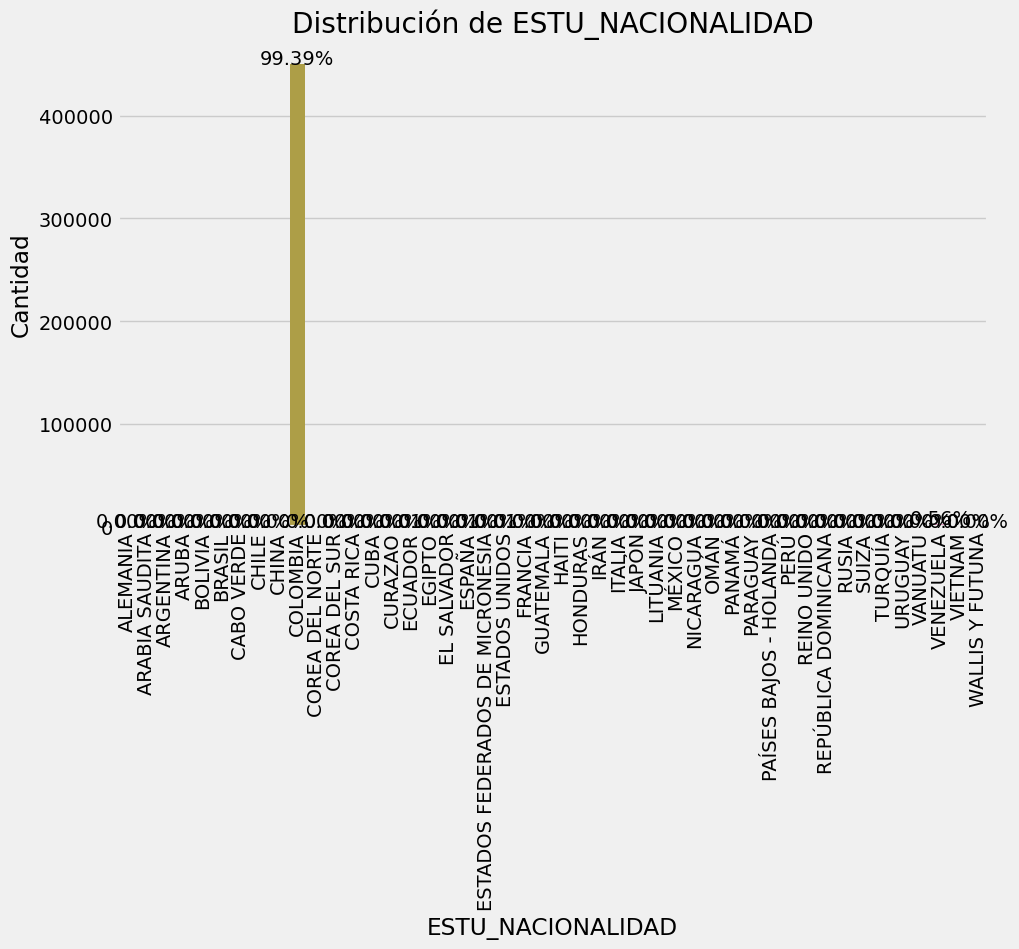

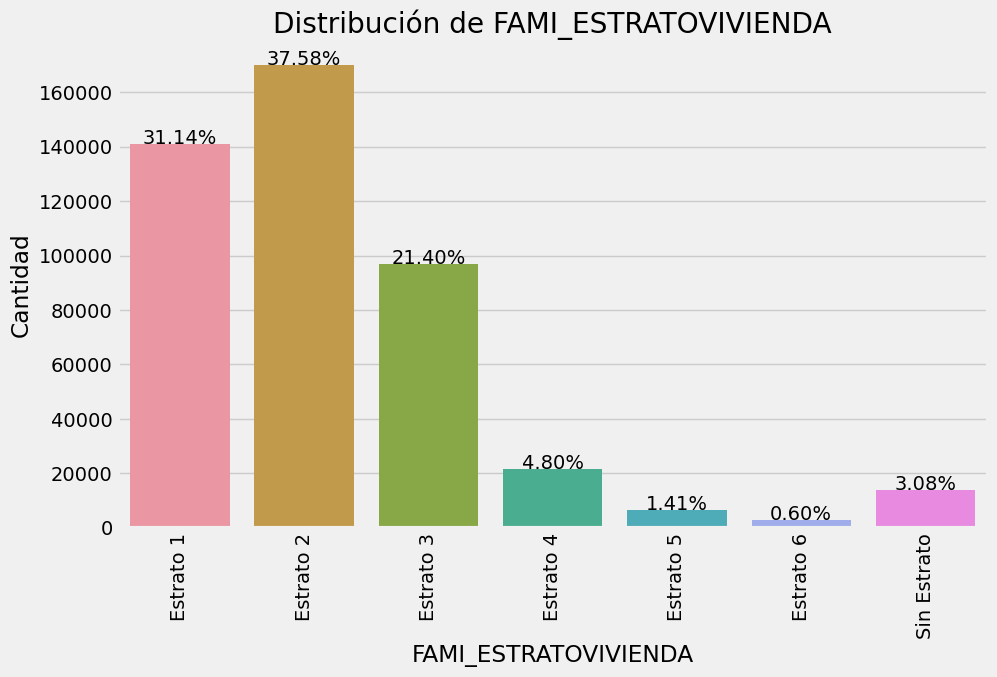

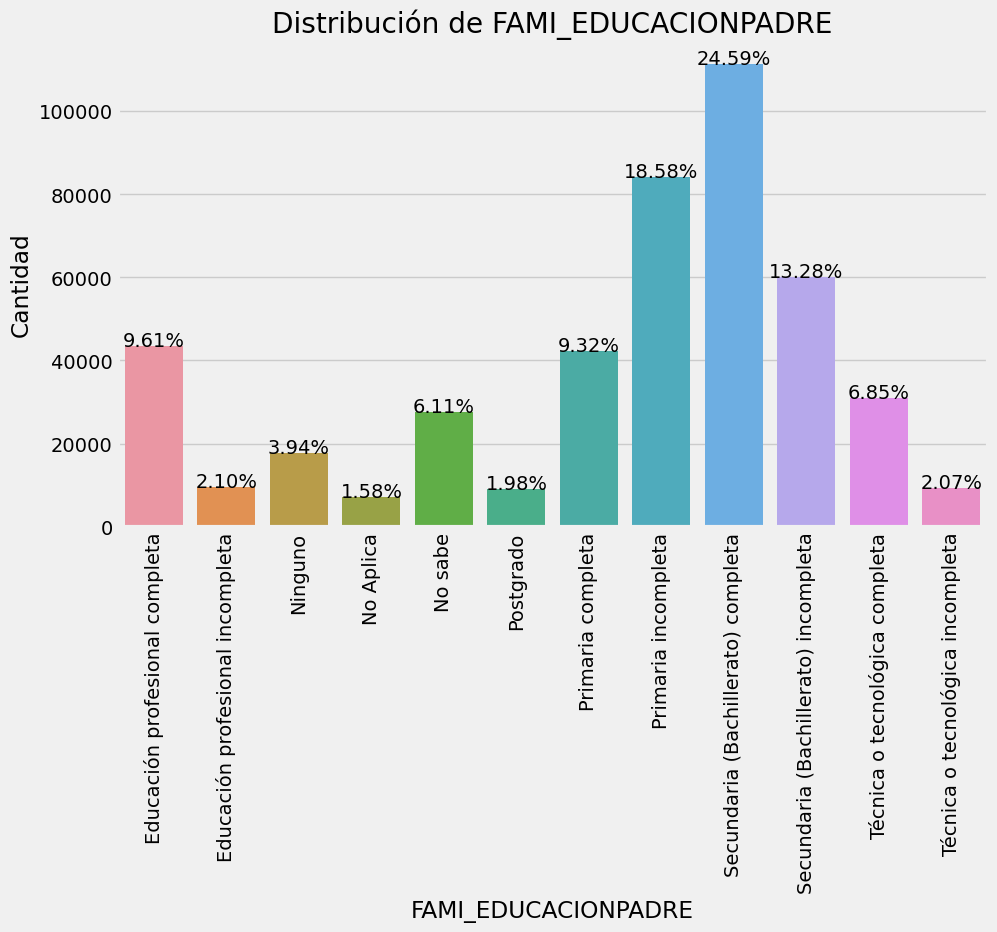

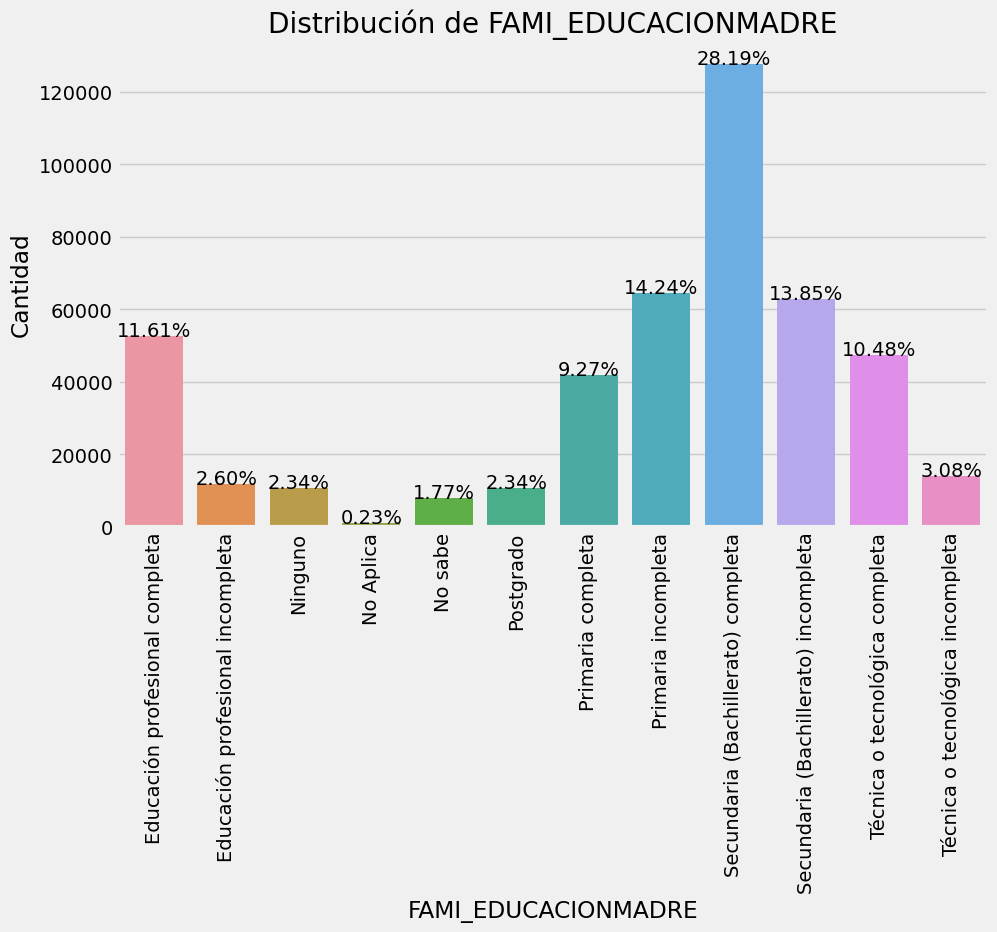

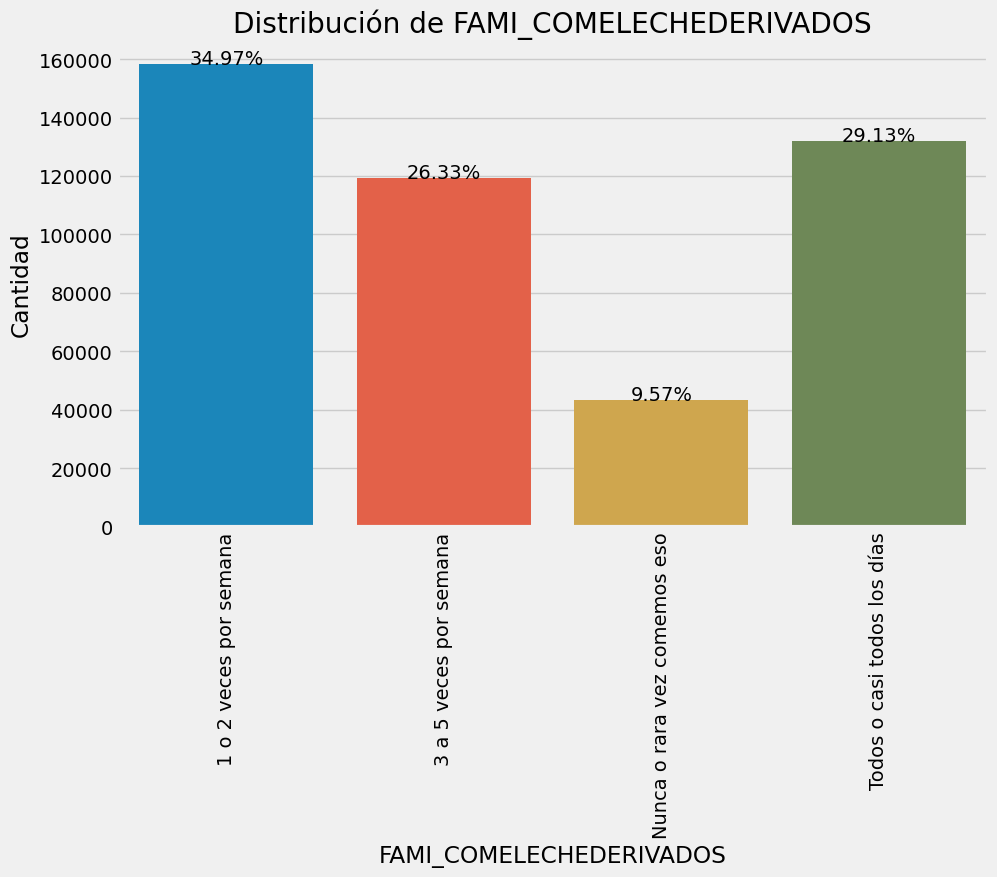

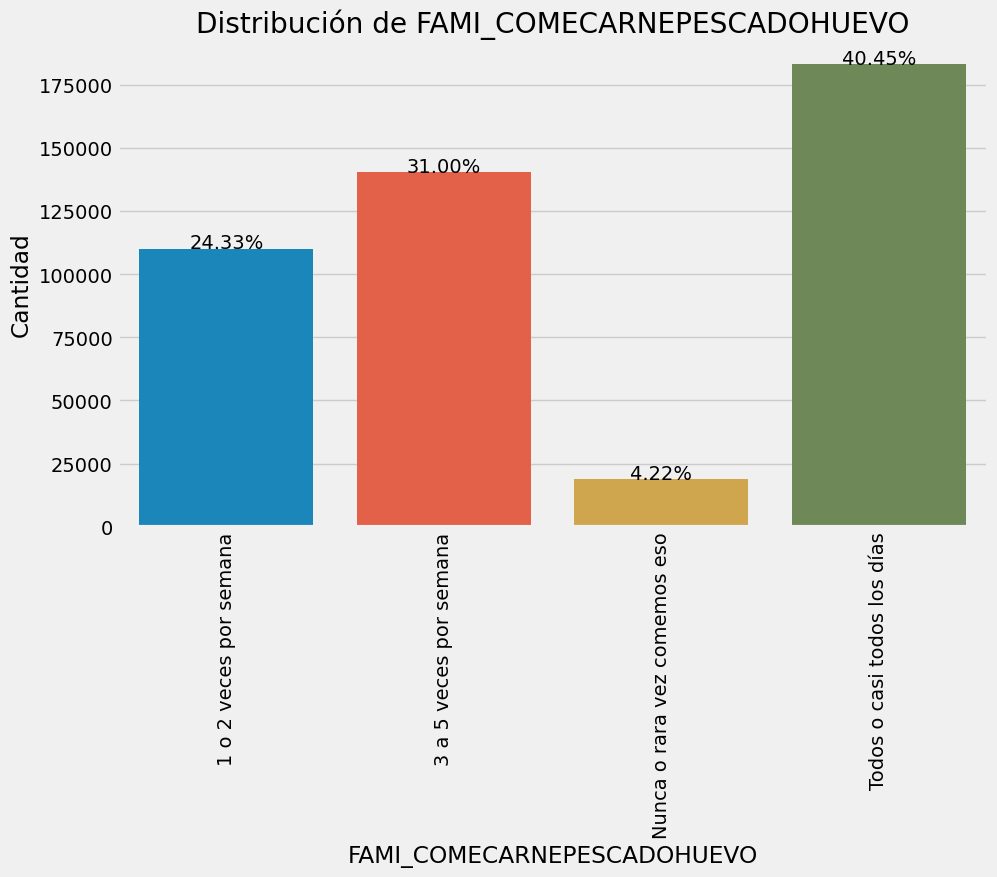

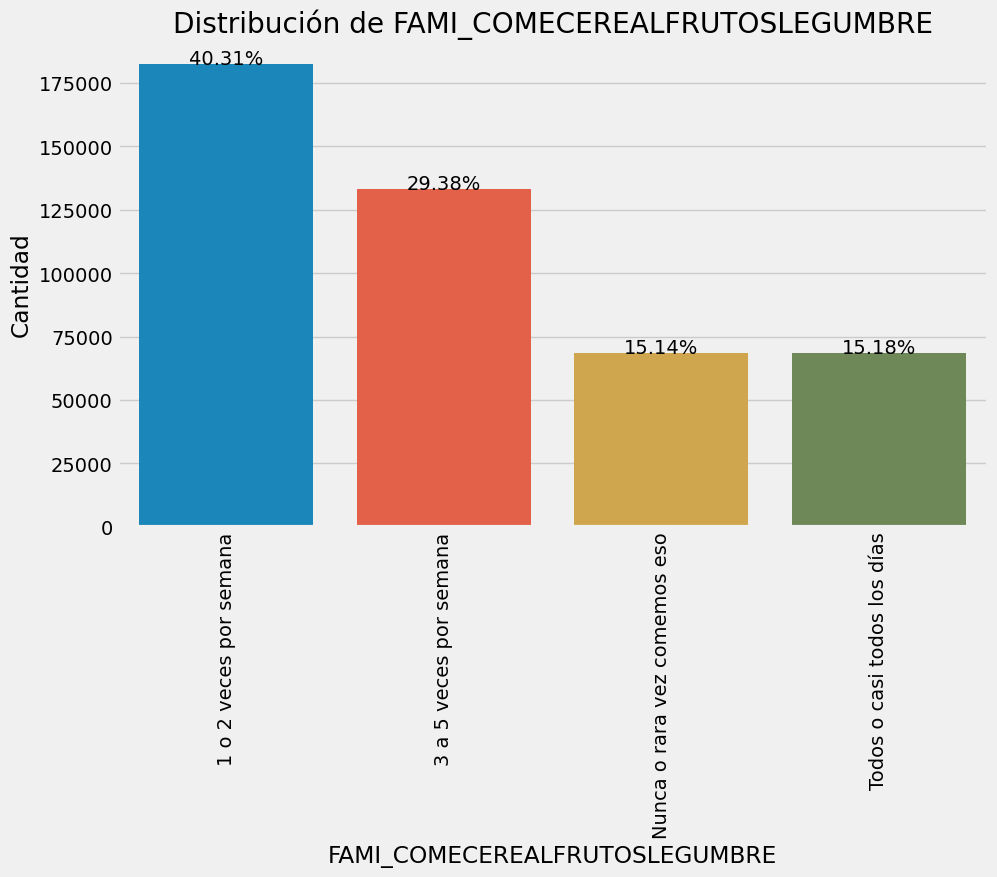

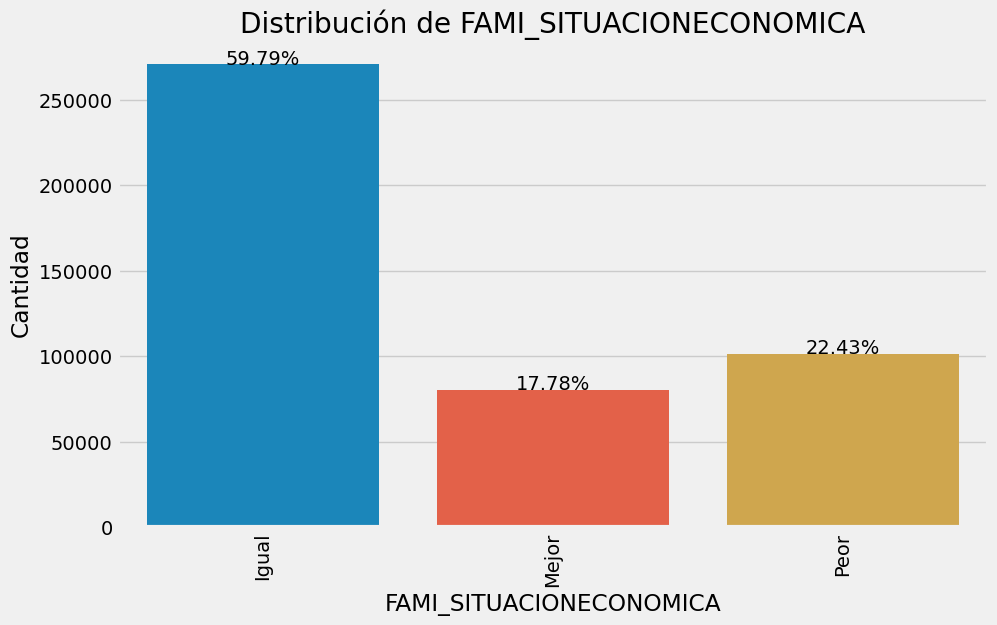

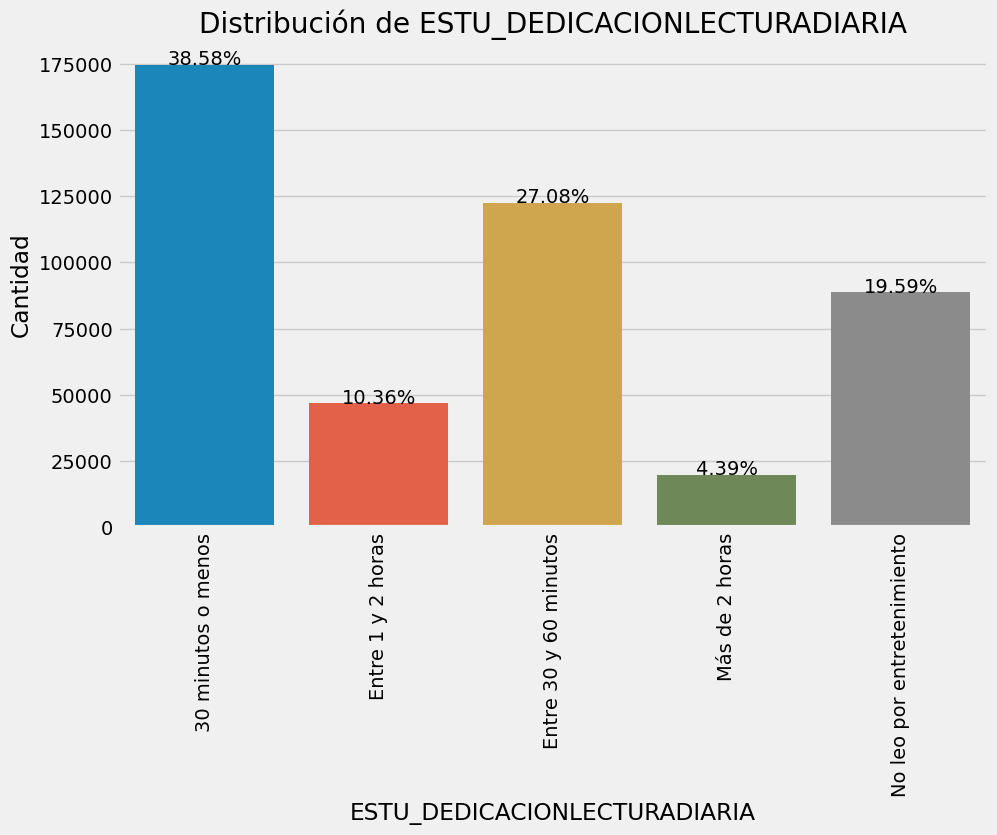

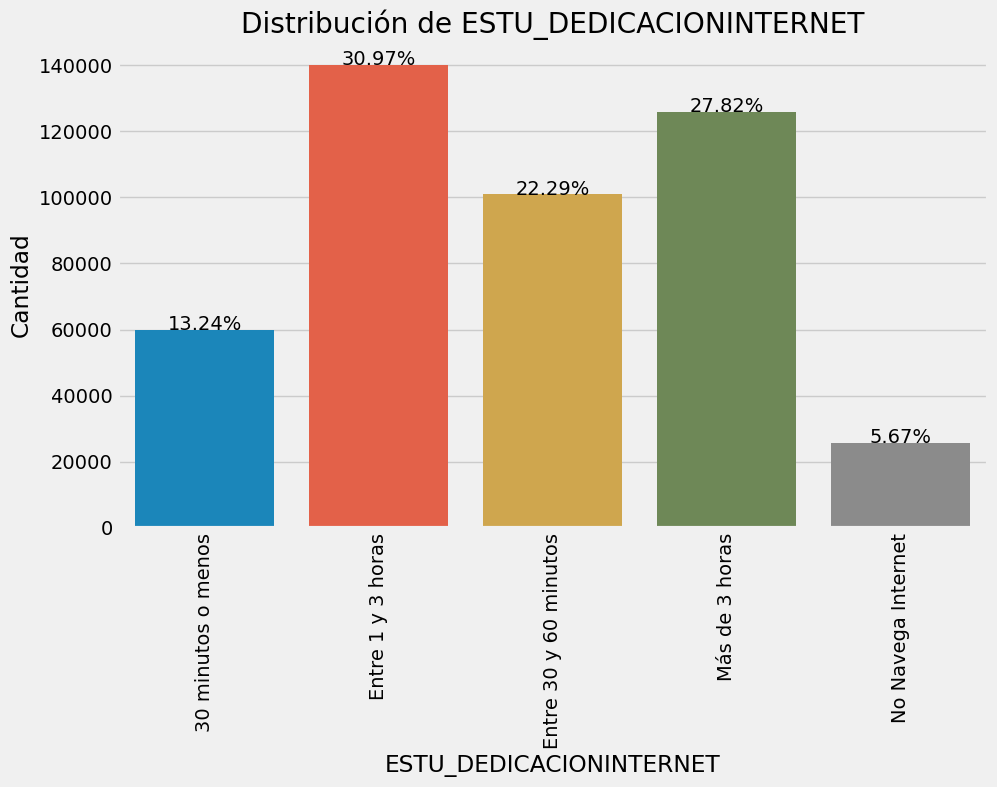

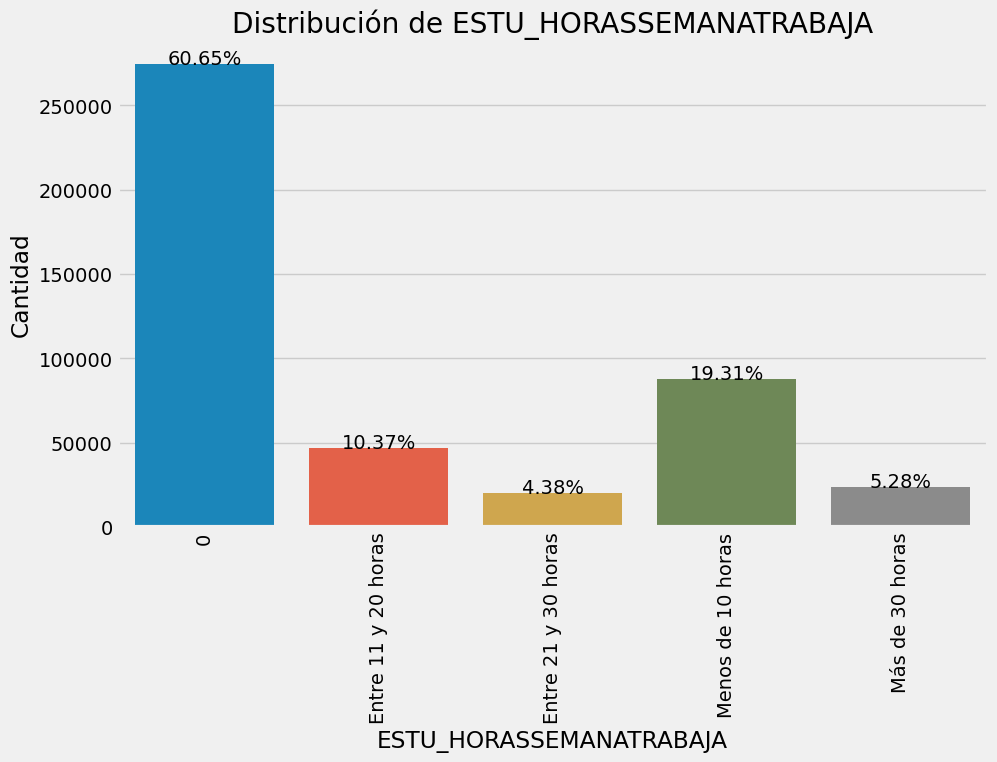

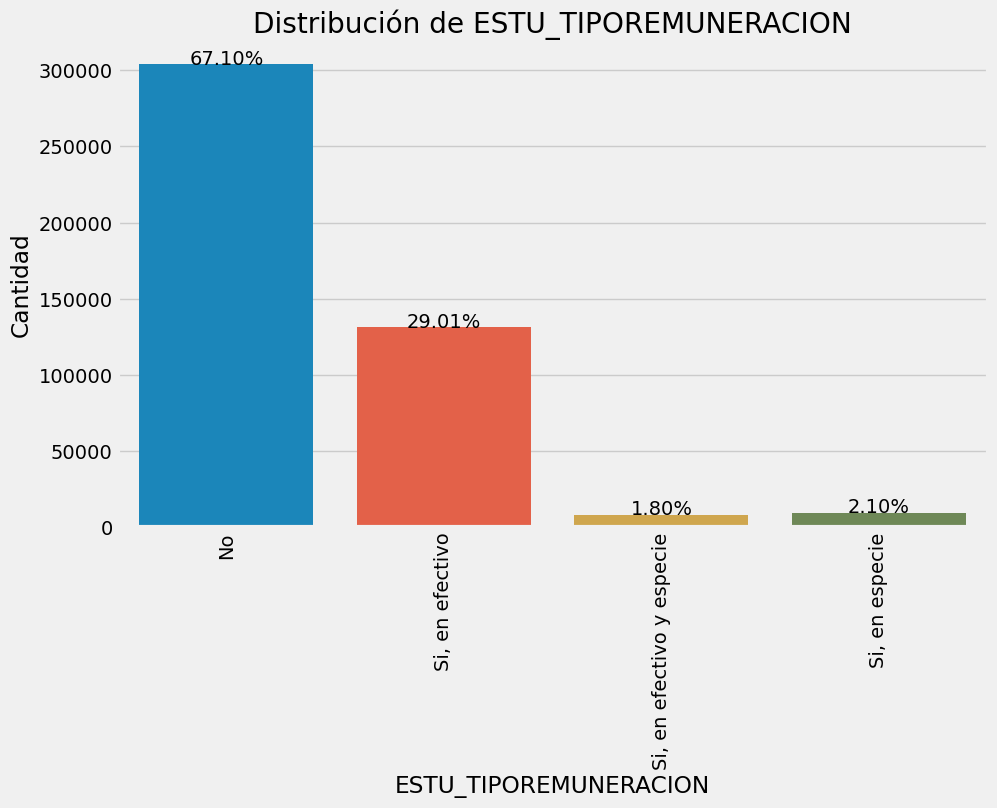

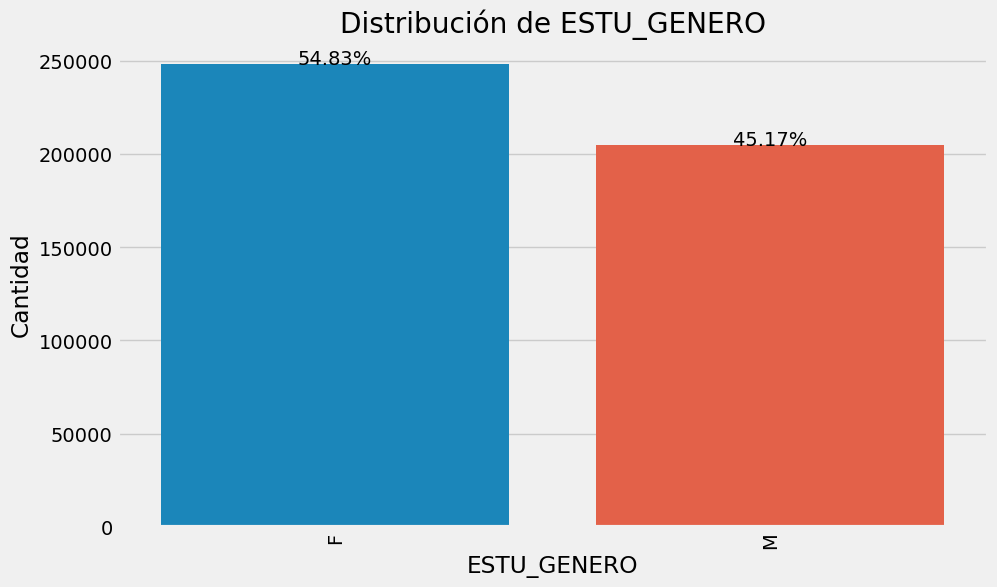

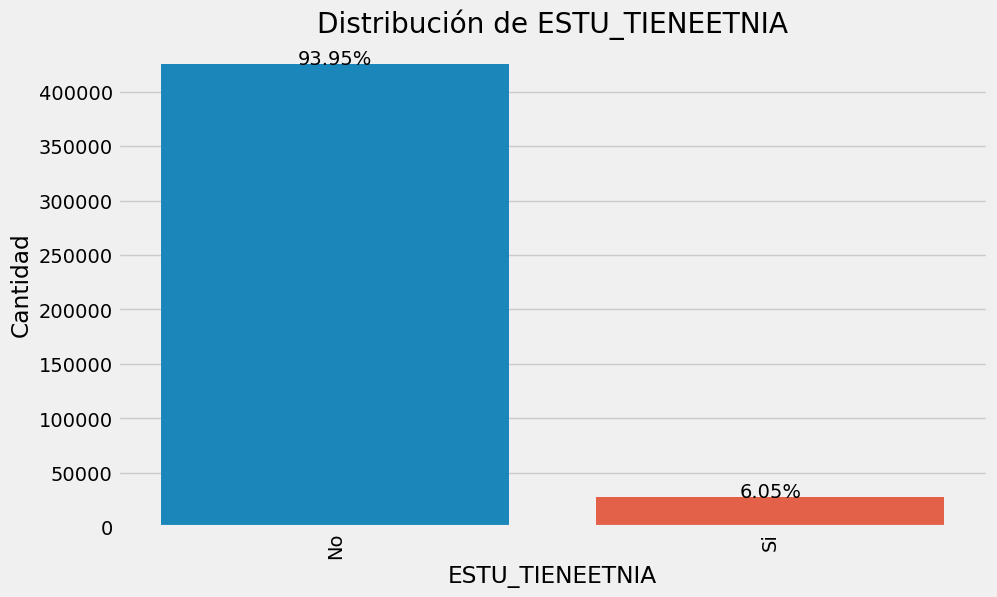

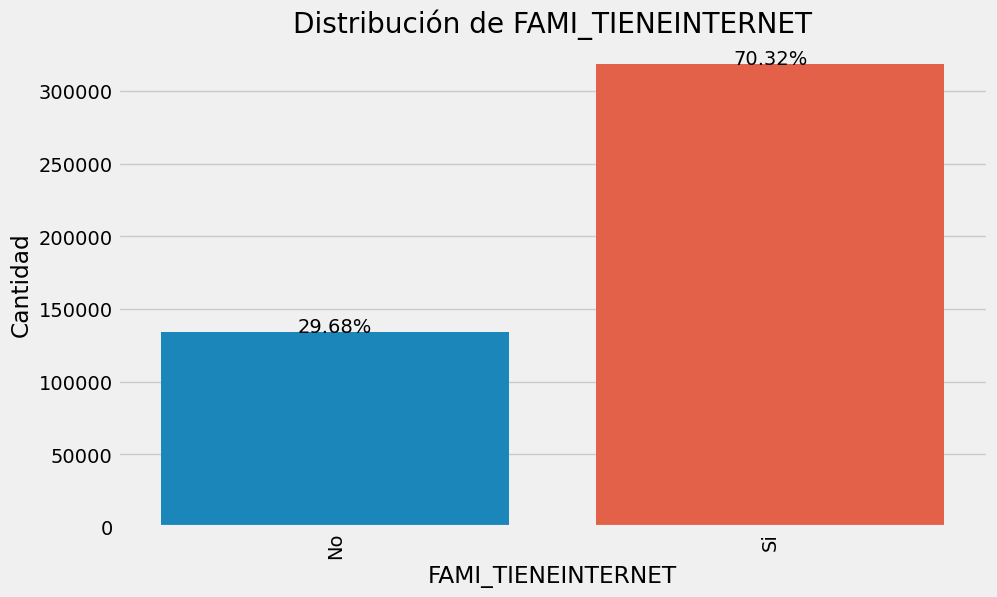

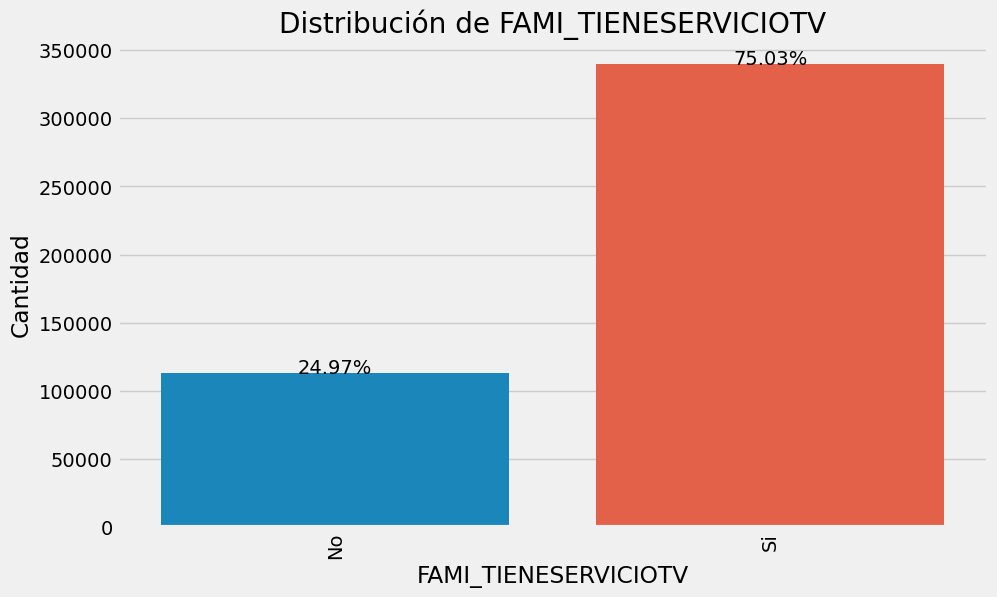

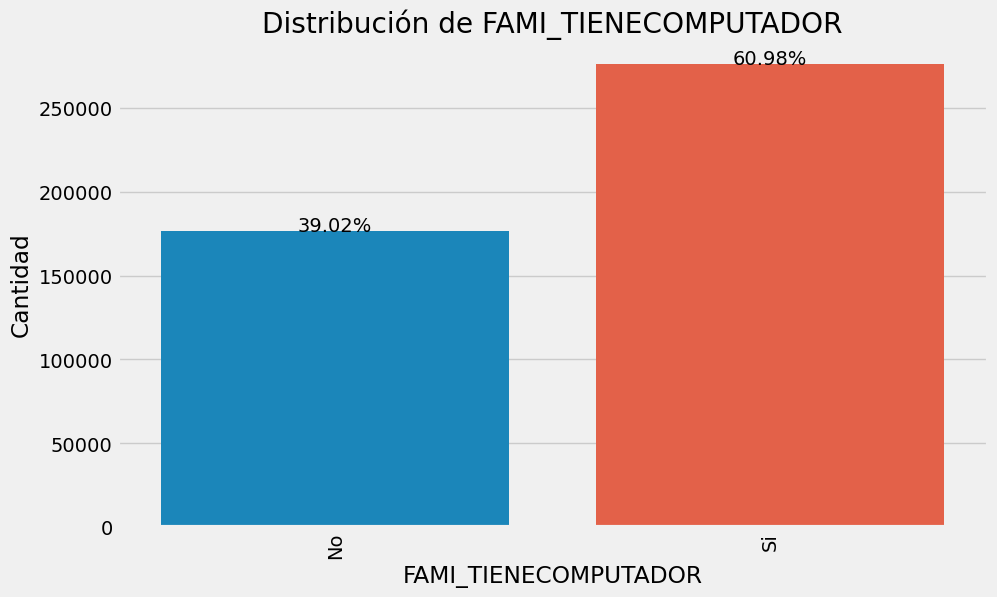

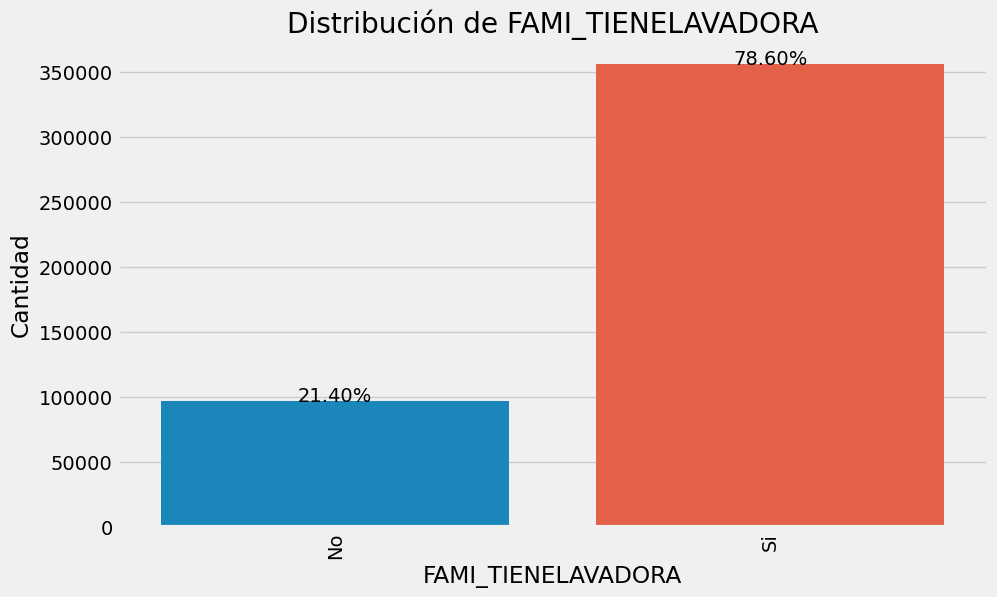

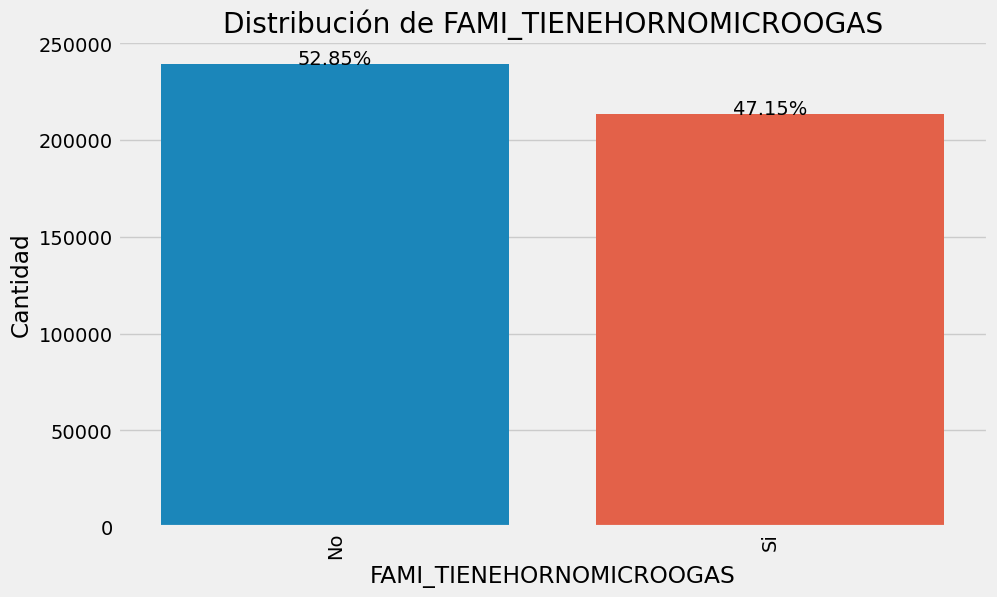

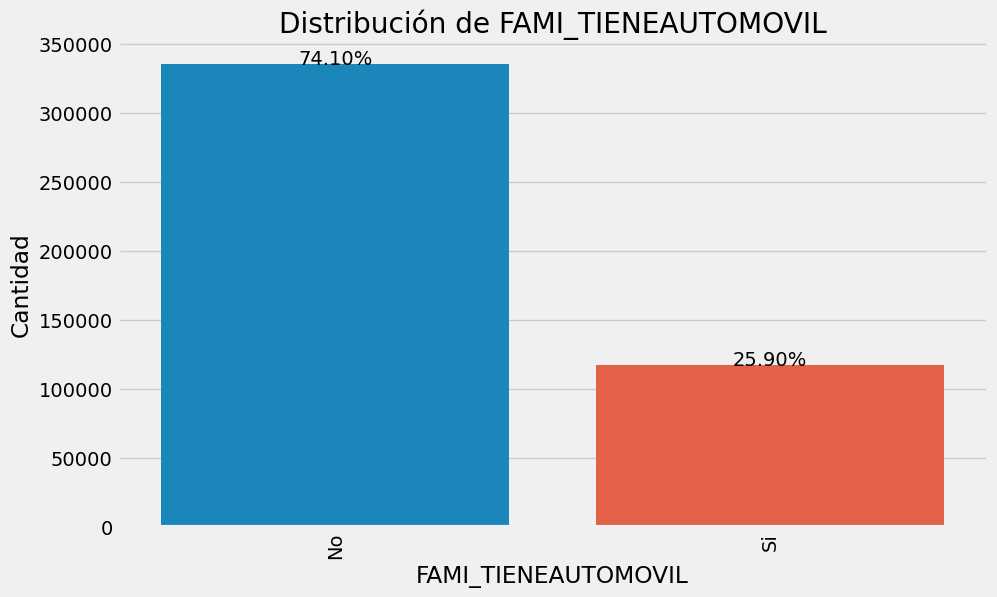

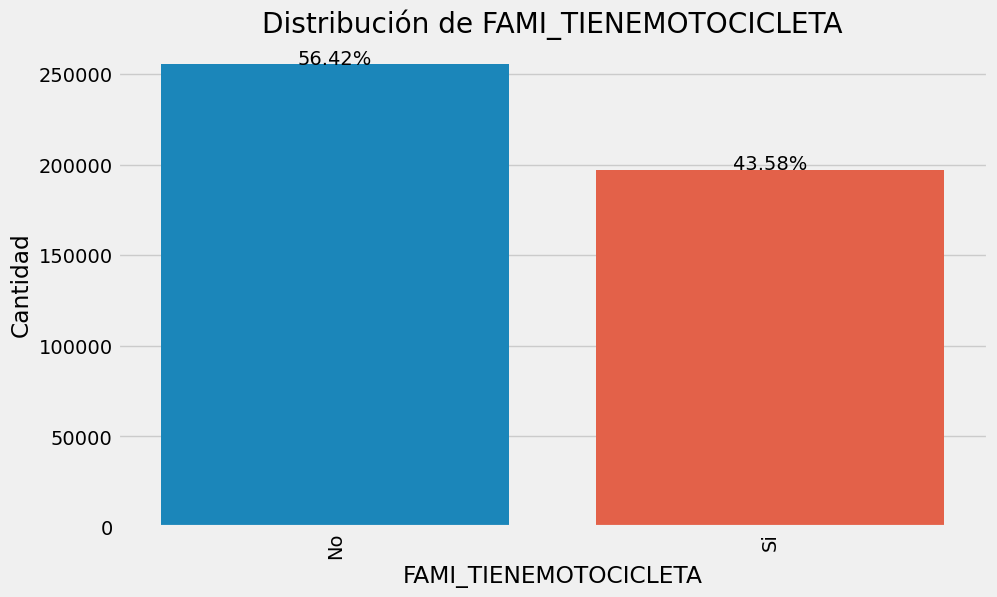

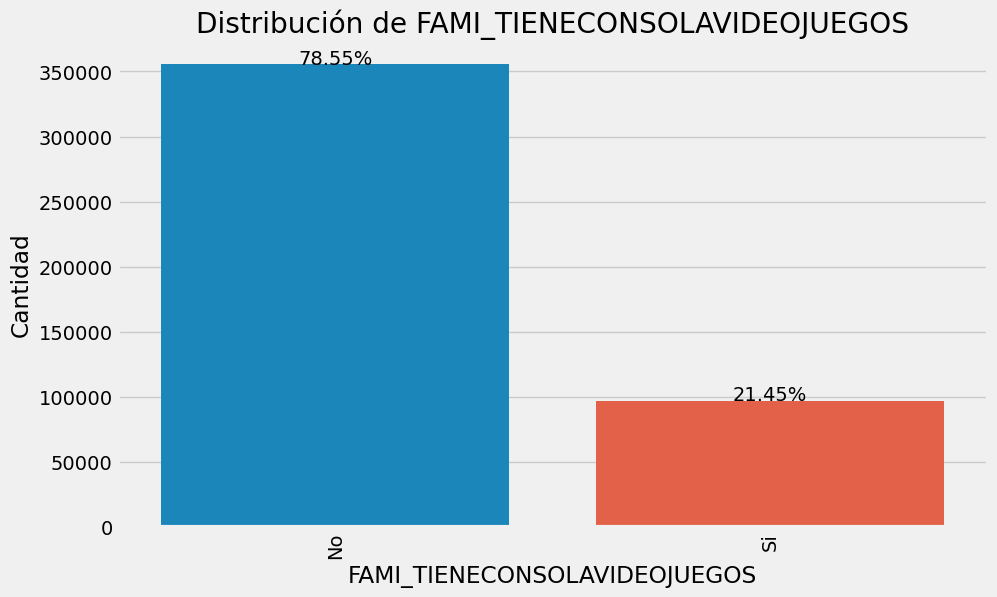

In [16]:
# Distribución de algunas variables categóricas
plt.style.use("fivethirtyeight")
for col in columnas_a_categoria:
    plt.figure(figsize=(10, 6))
    total = float(len(df_sin_duplicados))  # Obtener el total de filas para el cálculo del porcentaje
    ax = sns.countplot(x=col, data=df_sin_duplicados)
    
    # Calcular y mostrar los porcentajes en las barras
    for p in ax.patches:
        height = p.get_height()  # Obtener la altura de cada barra
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,  # Posición del texto (un poco por encima de la barra)
                '{:1.2f}%'.format((height / total) * 100),  # Formato del porcentaje
                ha="center")  # Alineación del texto
    
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
    plt.ylabel('Cantidad')
    plt.show()


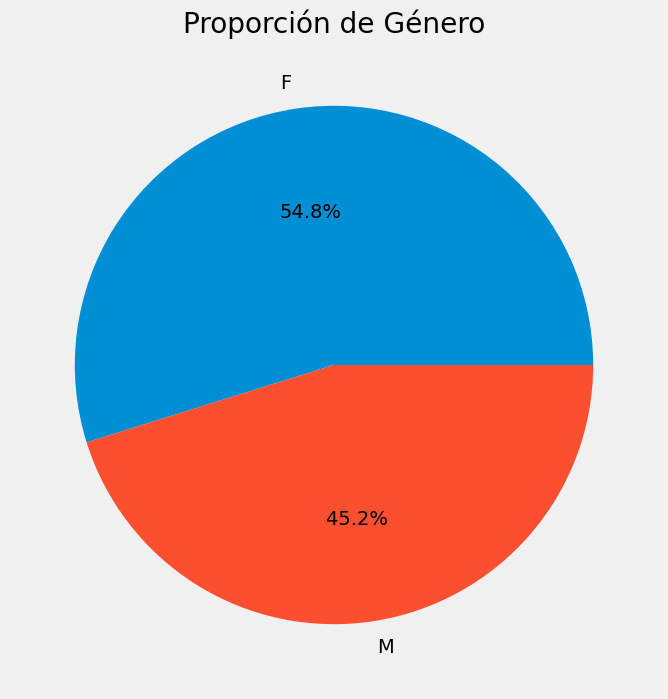

In [17]:
# Gráfico de pastel para una variable categórica
plt.figure(figsize=(8, 8))
df_sin_duplicados['ESTU_GENERO'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Género')
plt.ylabel('')
plt.show()

Text(0, 0.5, 'Puntaje Global')

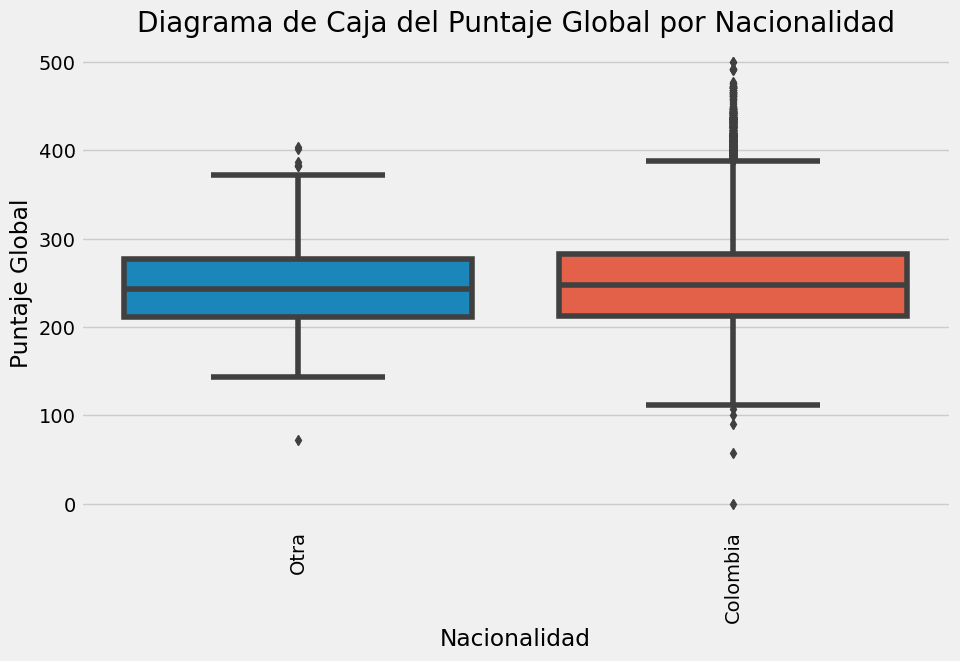

In [18]:
df_graficas = df_sin_duplicados.copy()
df_graficas['ESTU_NACIONALIDAD_CAT'] = df['ESTU_NACIONALIDAD'].apply(lambda x: 'Colombia' if x == 'COLOMBIA' else 'Otra')

# Create the boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x='ESTU_NACIONALIDAD_CAT', y=columna_y, data=df_graficas)

# Add title and labels
plt.title('Diagrama de Caja del Puntaje Global por Nacionalidad')
plt.xlabel('Nacionalidad')
plt.xticks(rotation=90)
plt.ylabel('Puntaje Global')

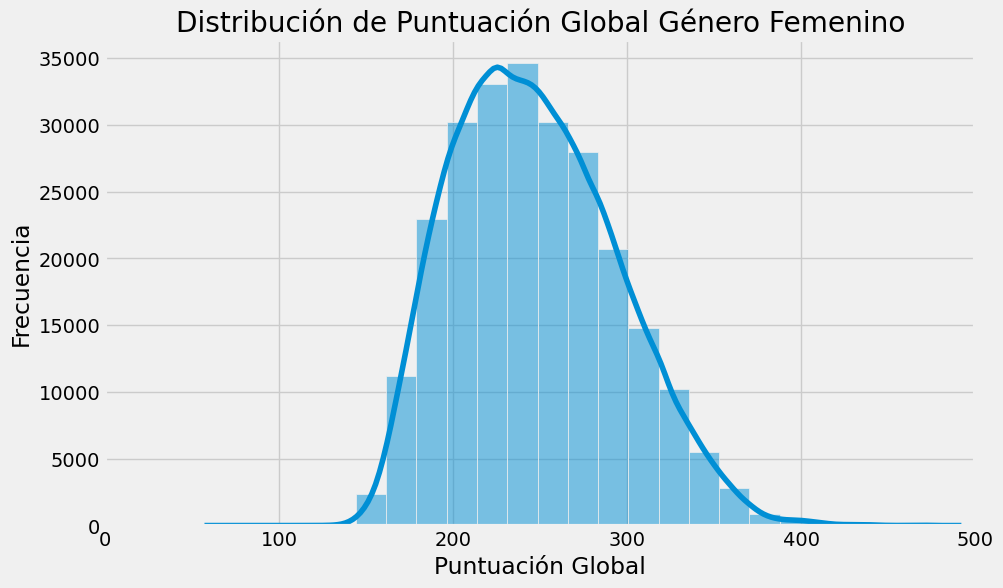

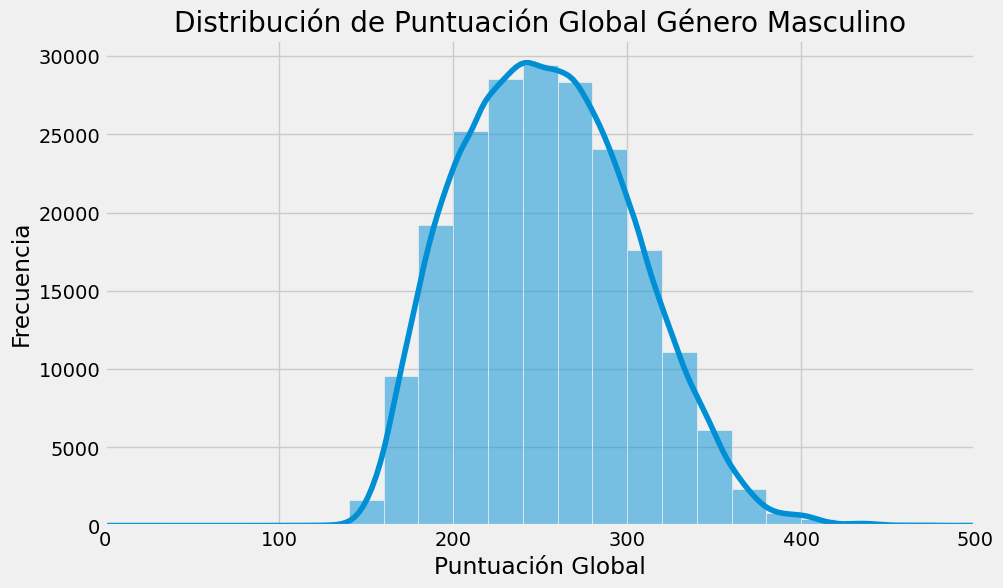

In [19]:
# Histograma para ver la variable PUNT_GLOBAL
# Determinar el máximo del puntaje global para hacer que las gráficas sigan la misma proporción
max_value = df_sin_duplicados[columna_y].max()

# Gráfica para ESTU_GENERO = F
plt.figure(figsize=(10, 6))
sns.histplot(df_sin_duplicados[df_sin_duplicados['ESTU_GENERO'] == 'F']['PUNT_GLOBAL'].copy(), bins=25, kde=True)
plt.style.use("fivethirtyeight")
plt.title('Distribución de Puntuación Global Género Femenino')
plt.xlabel('Puntuación Global')
plt.ylabel('Frecuencia')
plt.xlim(left=0, right=max_value)
plt.ylim(bottom=0)
plt.show()

# Gráfica para ESTU_GENERO = M
plt.figure(figsize=(10, 6))
sns.histplot(df_sin_duplicados[df_sin_duplicados['ESTU_GENERO'] == 'M']['PUNT_GLOBAL'].copy(), bins=25, kde=True)
plt.style.use("fivethirtyeight")
plt.title('Distribución de Puntuación Global Género Masculino')
plt.xlabel('Puntuación Global')
plt.ylabel('Frecuencia')
plt.xlim(left=0, right=max_value)
plt.ylim(bottom=0)
plt.show()

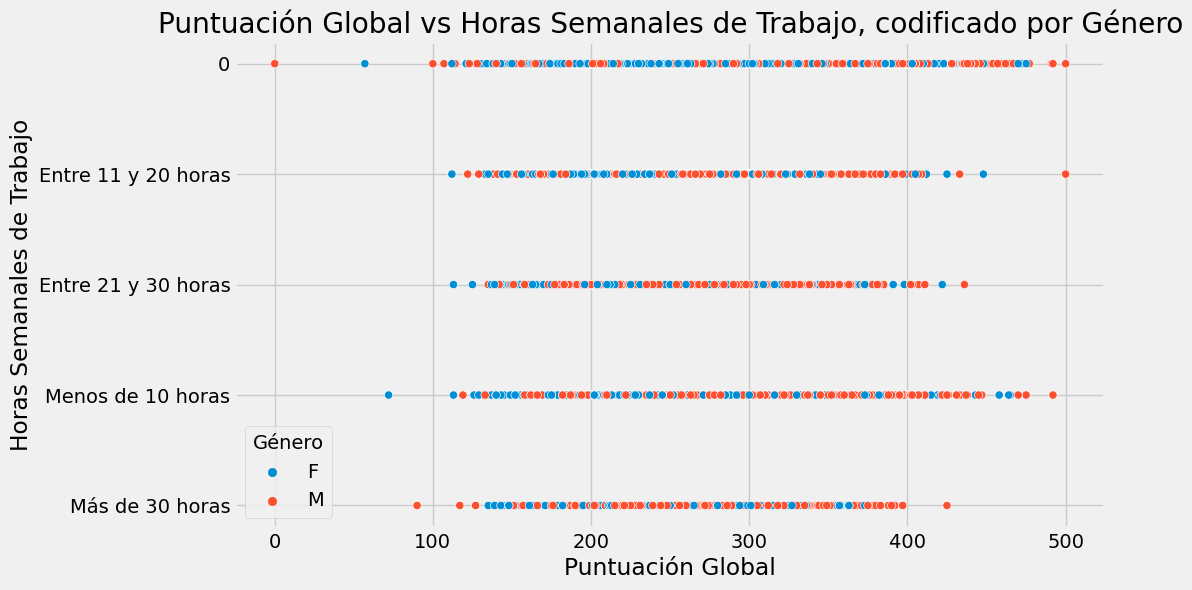

In [20]:
# Gráfico de dispersión con codificación de color
plt.figure(figsize=(10, 6))
sns.scatterplot(x=columna_y, y='ESTU_HORASSEMANATRABAJA', hue='ESTU_GENERO', data=df_sin_duplicados)
plt.title('Puntuación Global vs Horas Semanales de Trabajo, codificado por Género')
plt.xlabel('Puntuación Global')
plt.ylabel('Horas Semanales de Trabajo')
plt.legend(title='Género')
plt.show()

### Funciónes auxiliares

In [149]:
# Hacer un encode inicial y devolver el DataFrame luego de aplicar LabelEncoder a cada una de sus columnas de tipo categoría
# Devolver también los LabelEncoders utilizados
def label_encode_inicial(df):
    label_encoders = {}
    df_encoded = df.copy()
    
    for column in df_encoded.select_dtypes(include=['category']).columns:
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le
    
    return df_encoded, label_encoders

# Permite repetir el LabelEncode teniendo los LabelEncoders
def label_encode(df, label_encoders):
    df_encoded = df.copy()
    
    for column in df_encoded.select_dtypes(include=['category']).columns:
        le = label_encoders[column]
        df_encoded[column] = le.transform(df_encoded[column])
    
    return df_encoded

def convertir_punt_global_categoria(df, columna, minimo, maximo, n_bins):
    df_convertir = df.copy()
    
    valores = list(range(1, n_bins + 1))
    bins = np.linspace(minimo, maximo, n_bins+1)
    bins[0] -= 1
    
    rangos = []
    for i in range(len(bins) - 1):
        if i == 0:
            rangos.append(f"{bins[i]+1} ≤ {columna} ≤ {bins[i+1]}")
        else:
            rangos.append(f"{bins[i]} < {columna} ≤ {bins[i+1]}")
    
    y = pd.cut(df_convertir[columna], bins, labels=valores)
    
    return y, rangos

# bins_icfes = [-1,175, 250, 350,500]
# categoria_icfes = ["Insuficiente", "Mínimo", "Satisfactorio", "Avanzado"]

def escalar_estandar(df):
    df_escalado = df.copy()

    scaler = StandardScaler().set_output(transform="pandas")
    df_escalado = scaler.fit_transform(df_escalado)
    
    return df_escalado, scaler
    


## Matriz de correlación de variables:

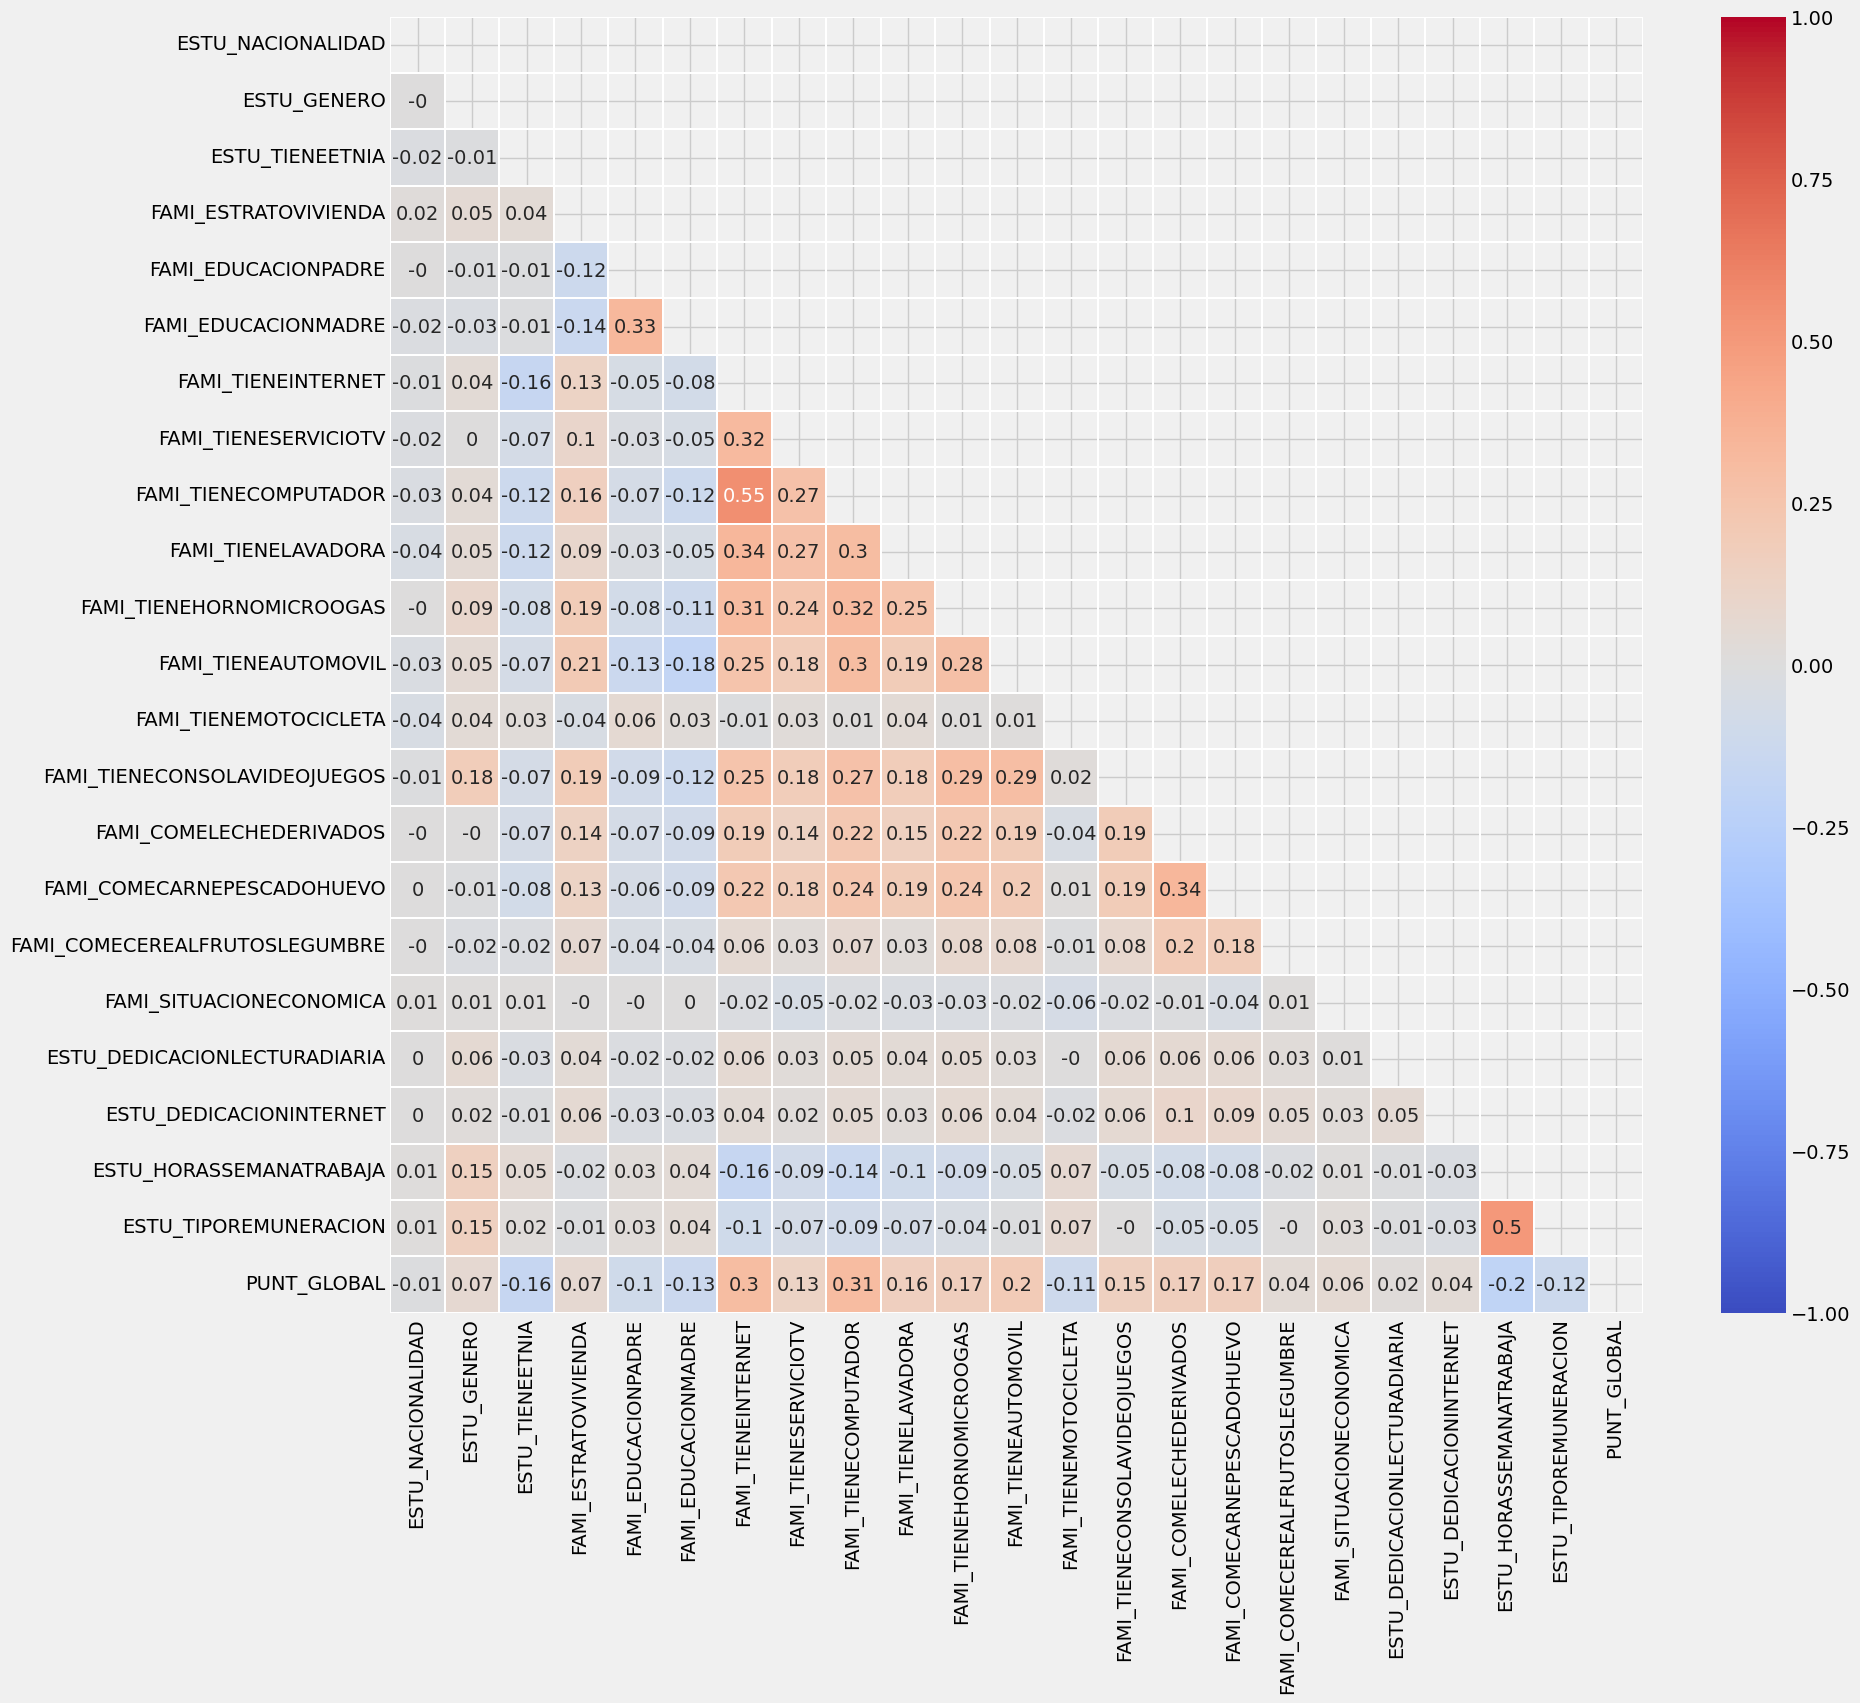

In [150]:
# Hacer label encode a las variables
corr_df_encoded, label_encoders = label_encode_inicial(df_sin_duplicados)

# Matriz de Correlación:
pio.templates.default = "plotly_white"
 
# Matriz de correlaciones:
corr_df = corr_df_encoded.corr(method='pearson').round(2)
plt.figure(figsize=(18, 16))
mask = np.triu(np.ones_like(corr_df, dtype=bool))
sns.heatmap(corr_df, annot=True, vmax=1, vmin=-1, 
    center=0, cmap=sns.color_palette("coolwarm", as_cmap=True), 
    mask=mask, linewidth=.3)
plt.show()

# Modelos de Predicción

## Variable Dependiente

In [23]:
# Guardar la columna de puntaje global en un nuevo DataFrame
puntaje_global = df_sin_duplicados[[columna_y]].copy()

# Valores mínimos y máximos obtenibles en las pruebas Saber 11
minimo_s11 = 0
maximo_s11 = 500
n_bins = 5

# Convertir el puntaje global a categoría
puntaje_global_cat, labels_puntaje_global_cat = convertir_punt_global_categoria(df_sin_duplicados,columna_y, minimo_s11, maximo_s11,n_bins)

## Clustering

In [24]:
# Copiar el DataFrame limpio
df_cl = df_sin_duplicados.copy()

# Usar los LabelEncoders generados en la Matriz de correlación
df_cl_encoded = label_encode(df_cl,label_encoders)

# Remover la variable dependiente del DataFrame
df_cl_encoded = df_cl_encoded.drop(columns=columna_y)

# Aplicar un StandardScaler al DataFrame
X_cl, scaler = escalar_estandar(df_cl_encoded)

# DataFrame con LabelEncode aplicado
X_cl.head()

ESTU_NACIONALIDAD  ESTU_GENERO  ESTU_TIENEETNIA  FAMI_ESTRATOVIVIENDA  \
0          11.643089    -0.907692        -0.253791             -0.169703   
1          13.205715     1.101695        -0.253791              0.606011   
2          13.205715    -0.907692        -0.253791             -0.945417   
3          13.205715     1.101695        -0.253791              3.708868   
4          -0.076601    -0.907692        -0.253791              2.157440   

   FAMI_EDUCACIONPADRE  FAMI_EDUCACIONMADRE  FAMI_TIENEINTERNET  \
0             1.203997            -2.145283            0.649607   
1             0.530409            -2.145283            0.649607   
2             0.193615             0.732689           -1.539392   
3             0.867203            -2.145283            0.649607   
4             0.530409            -2.145283            0.649607   

   FAMI_TIENESERVICIOTV  FAMI_TIENECOMPUTADOR  FAMI_TIENELAVADORA  ...  \
0              0.576951              0.799885            0.521838  ...   
1              0.576951             -1.250180           -1.916302  ...   
2              0.576951             -1.250180            0.521838  ...   
3              0.576951             -1.250180            0.521838  ...   
4              0.576951              0.799885            0.521838  ...   

   FAMI_TIENEMOTOCICLETA  FAMI_TIENECONSOLAVIDEOJUEGOS  \
0               1.137816                     -0.522606   
1              -0.878877                     -0.522606   
2               1.137816                     -0.522606   
3              -0.878877                     -0.522606   
4              -0.878877                      1.913488   

   FAMI_COMELECHEDERIVADOS  FAMI_COMECARNEPESCADOHUEVO  \
0                -0.267988                   -1.298351   
1                -0.267988                    1.123919   
2                -1.083787                   -0.490927   
3                 0.547812                    0.316496   
4                 1.363611                    1.123919   

   FAMI_COMECEREALFRUTOSLEGUMBRE  FAMI_SITUACIONECONOMICA  \
0                      -0.048222                 1.662726   
1                      -0.048222                 0.452315   
2                      -0.048222                -0.758096   
3                      -0.048222                 1.662726   
4                      -0.048222                -0.758096   

   ESTU_DEDICACIONLECTURADIARIA  ESTU_DEDICACIONINTERNET  \
0                     -1.033241                 1.033126   
1                      1.615034                 1.033126   
2                      0.290897                -1.587003   
3                     -1.033241                -0.713627   
4                     -0.371172                -0.713627   

   ESTU_HORASSEMANATRABAJA  ESTU_TIPOREMUNERACION  
0                -0.712838              -0.615359  
1                 0.013028               0.966719  
2                -0.712838               0.966719  
3                -0.712838              -0.615359  
4                 1.464761               0.966719  

[5 rows x 22 columns]

In [25]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, puntaje_global, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train_cl.shape)
print("X_test shape:", X_test_cl.shape)
print("y_train shape:", y_train_cl.shape)
print("y_test shape:", y_test_cl.shape)

X_train shape: (362148, 22)
X_test shape: (90538, 22)
y_train shape: (362148, 1)
y_test shape: (90538, 1)


La cantidad programáticamente recomendada de clusters es de:  8


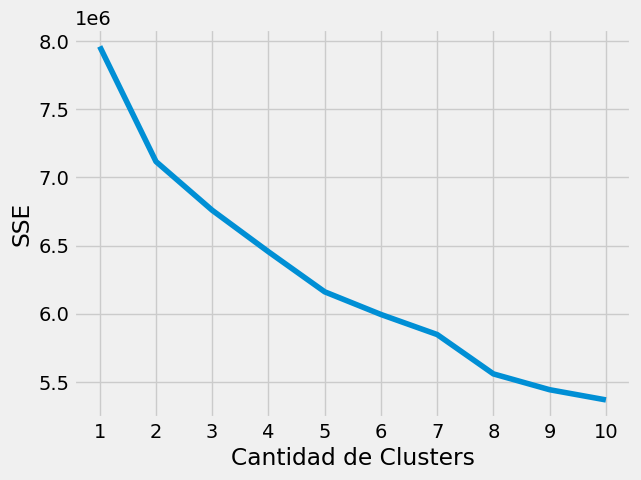

In [26]:
# Definir los argumentos para KMeans y poder probar
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Recopilar el SSE con distintas cantidades de clusters
sse = []
n_clusters_min = 1
n_clusters_max = 10

for k in range(n_clusters_min, n_clusters_max + 1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train_cl)
    sse.append(kmeans.inertia_)

# Encontrar el codo para definir la cantidad de clusters recomendable
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

print("La cantidad programáticamente recomendada de clusters es de: ",kl.elbow)

# Graficar el SSE para KMeans con distintas cantidades de clusters    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Cantidad de Clusters")
plt.ylabel("SSE") #Suma de los cuadrados de los errores
plt.show()

### ¡Atención!

La siguiente celda tarda una cantidad significativa de tiempo en ejecutarse, los valores de su ejecución se han colocado en la celda que le sigue, si de igual manera desea ejecutarla, puede cambiar la primer línea de 
    
    estoy_seguro_ejecutar_celda = False
    
a

    estoy_seguro_ejecutar_celda = True

### ¡Atención!

In [28]:
estoy_seguro_ejecutar_celda = False

# Arreglo para guardar los coeficientes de silueta
silhouette_coefficients = []

celda_silueta_ejecutada = False

if estoy_seguro_ejecutar_celda:
    # Calcular los coeficientes de silueta para distintas cantidades de centroides
    for k in range(n_clusters_min + 1, n_clusters_max + 1):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(X_train_cl)
        score = silhouette_score(X_train_cl, kmeans.labels_)
        silhouette_coefficients.append(score)
    
    celda_silueta_ejecutada = True
    print("¡¡Se ha ejecutado la celda!!")
    print(silhouette_coefficients)
else:
    print("¡¡No se ha ejecutado la celda!!")

¡¡No se ha ejecutado la celda!!


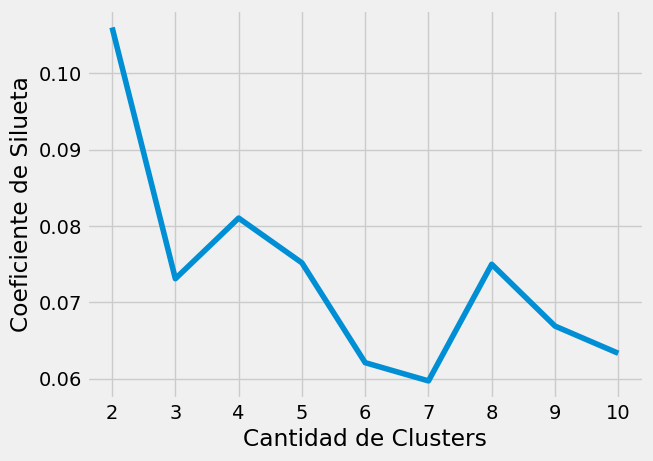

In [29]:
if not celda_silueta_ejecutada:
    silhouette_coefficients =  [0.10603663595213936, 0.07309257807161473, 0.08104419605006453, 0.07517465405024043, 0.06208361305215369, 0.059692495217651693, 0.07498449480694933, 0.0668824723599449, 0.0633143599054871]

# Graficar los componentes de silueta para cada una de las distintas cantidades de centroides
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Cantidad de Clusters")
plt.ylabel("Coeficiente de Silueta")
plt.show()

In [30]:
# Crear el modelo de KMeans con la cantidad de centroides (n_clusters) que se determinó como óptima en los pasos anteriores
kmeans = KMeans(n_clusters=8,init="k-means++",n_init=50,max_iter=300,random_state=42)
# Entrenar el modelo
kmeans.fit(X_train_cl)

KMeans(n_init=50, random_state=42)

In [31]:
# Realizar las predicciones
y_pred_cl = kmeans.predict(X_cl)

print(y_pred_cl)

[6 6 6 ... 4 1 0]


In [32]:
# Para todo el DataFrame, determinar el cluster correspondiente de cada registro
cluster = kmeans.predict(df_cl_encoded)

# Imprimir el cluster correspondiente de cada registro del DataFrame
print(cluster)

[6 6 6 ... 6 6 6]


In [33]:
# Agregar el array como una nueva columna directamente
puntaje_global['cluster'] = cluster

puntaje_global.head()

PUNT_GLOBAL  cluster
0          244        6
1          238        6
2          325        6
3          238        6
4          202        6

C:\Users\diazn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


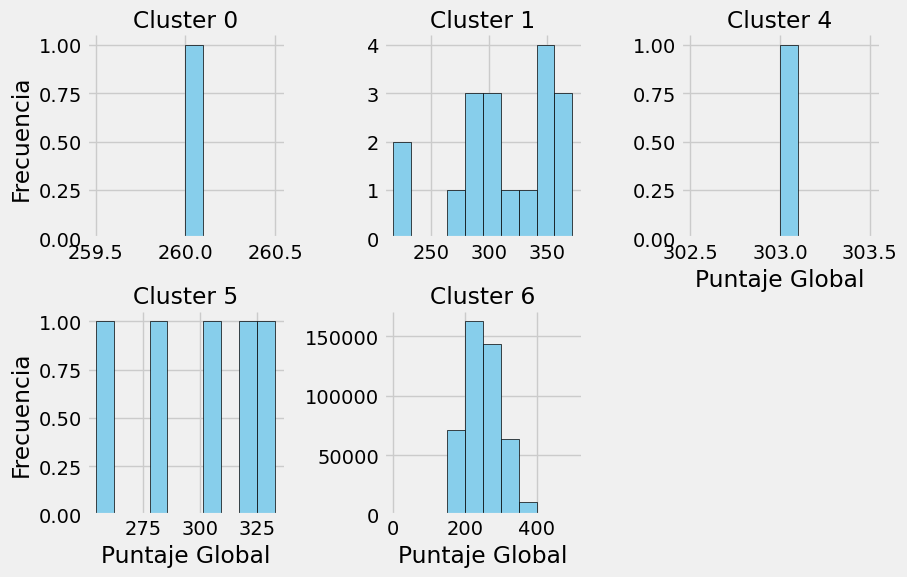

In [34]:
# Crear un grid de gráficos
g = sns.FacetGrid(puntaje_global, col="cluster", col_wrap=3, sharex=False, sharey=False)

# Mapear los datos al grid de gráficos
g.map(plt.hist, columna_y, bins=10, color="skyblue", edgecolor="black")

# Establecer los títulos y las etiquetas
g.set_titles("Cluster {col_name}")
g.set_axis_labels("Puntaje Global", "Frecuencia")

# Mostrar el gráfico
plt.show()

In [35]:
puntaje_global.describe()

PUNT_GLOBAL        cluster
count  452686.000000  452686.000000
mean      250.120786       5.999772
std        48.274963       0.033067
min         0.000000       0.000000
25%       213.000000       6.000000
50%       247.000000       6.000000
75%       283.000000       6.000000
max       500.000000       6.000000

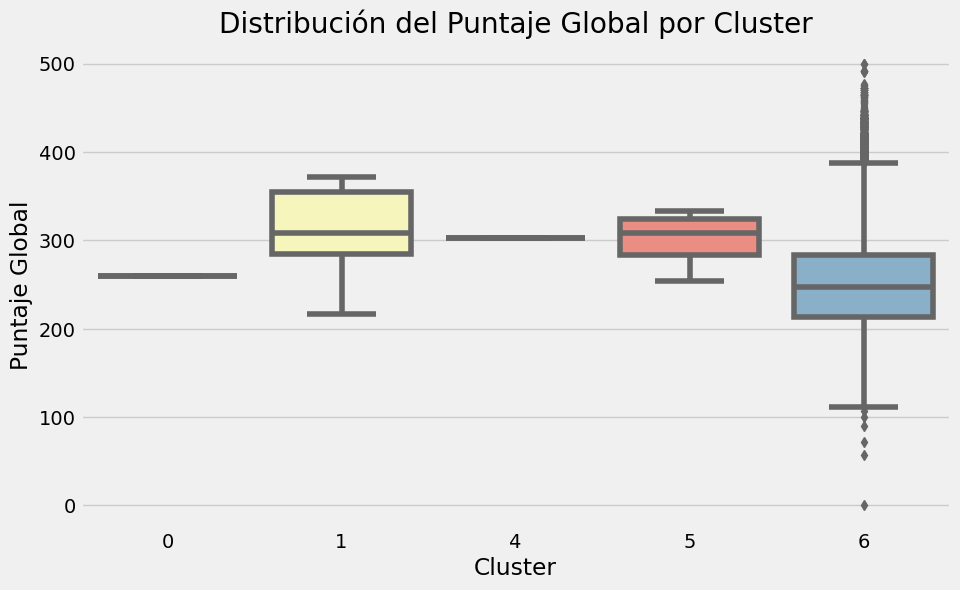

In [36]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="cluster", y=columna_y, data=puntaje_global, palette="Set3")

# Establecer los títulos y las etiquetas
plt.title('Distribución del Puntaje Global por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Puntaje Global')

# Mostrar el gráfico
plt.show()

## Selección de Variables y Reducción de Dimensionalidad

### DataFrame Inicial con LabelEncode

In [37]:
# Usar los LabelEncoders generados en la Matriz de correlación
df_encoded = label_encode(df_sin_duplicados,label_encoders)

# Remover la variable dependiente del DataFrame
DF_Columnas_Todas = df_encoded.drop(columns=columna_y).copy()

DF_Columnas_Todas.head()

ESTU_NACIONALIDAD  ESTU_GENERO  ESTU_TIENEETNIA  FAMI_ESTRATOVIVIENDA  \
0                 39            0                0                     1   
1                 43            1                0                     2   
2                 43            0                0                     0   
3                 43            1                0                     6   
4                  9            0                0                     4   

   FAMI_EDUCACIONPADRE  FAMI_EDUCACIONMADRE  FAMI_TIENEINTERNET  \
0                   10                    0                   1   
1                    8                    0                   1   
2                    7                    9                   0   
3                    9                    0                   1   
4                    8                    0                   1   

   FAMI_TIENESERVICIOTV  FAMI_TIENECOMPUTADOR  FAMI_TIENELAVADORA  ...  \
0                     1                     1                   1  ...   
1                     1                     0                   0  ...   
2                     1                     0                   1  ...   
3                     1                     0                   1  ...   
4                     1                     1                   1  ...   

   FAMI_TIENEMOTOCICLETA  FAMI_TIENECONSOLAVIDEOJUEGOS  \
0                      1                             0   
1                      0                             0   
2                      1                             0   
3                      0                             0   
4                      0                             1   

   FAMI_COMELECHEDERIVADOS  FAMI_COMECARNEPESCADOHUEVO  \
0                        1                           0   
1                        1                           3   
2                        0                           1   
3                        2                           2   
4                        3                           3   

   FAMI_COMECEREALFRUTOSLEGUMBRE  FAMI_SITUACIONECONOMICA  \
0                              1                        2   
1                              1                        1   
2                              1                        0   
3                              1                        2   
4                              1                        0   

   ESTU_DEDICACIONLECTURADIARIA  ESTU_DEDICACIONINTERNET  \
0                             0                        3   
1                             4                        3   
2                             2                        0   
3                             0                        1   
4                             1                        1   

   ESTU_HORASSEMANATRABAJA  ESTU_TIPOREMUNERACION  
0                        0                      0  
1                        1                      1  
2                        0                      1  
3                        0                      0  
4                        3                      1  

[5 rows x 22 columns]

### DataFrame con Columnas Más Significativas

In [38]:
# Se eliminarán aquellas columnas cuya correlación tengo como primera cifra decimal un 0
variables_a_eliminar = [ 
    'PUNT_GLOBAL',
    'ESTU_NACIONALIDAD',
    'ESTU_GENERO',
    'ESTU_TIENEETNIA', 
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_COMECEREALFRUTOSLEGUMBRE', 
    'FAMI_SITUACIONECONOMICA',
    'ESTU_DEDICACIONLECTURADIARIA',
    'ESTU_DEDICACIONINTERNET'
]

DF_Columnas_Correlacion = df_encoded.drop(columns=variables_a_eliminar).copy()

DF_Columnas_Correlacion.head()

FAMI_EDUCACIONPADRE  FAMI_EDUCACIONMADRE  FAMI_TIENEINTERNET  \
0                   10                    0                   1   
1                    8                    0                   1   
2                    7                    9                   0   
3                    9                    0                   1   
4                    8                    0                   1   

   FAMI_TIENESERVICIOTV  FAMI_TIENECOMPUTADOR  FAMI_TIENELAVADORA  \
0                     1                     1                   1   
1                     1                     0                   0   
2                     1                     0                   1   
3                     1                     0                   1   
4                     1                     1                   1   

   FAMI_TIENEHORNOMICROOGAS  FAMI_TIENEAUTOMOVIL  FAMI_TIENEMOTOCICLETA  \
0                         0                    0                      1   
1                         0                    0                      0   
2                         1                    0                      1   
3                         0                    1                      0   
4                         1                    0                      0   

   FAMI_TIENECONSOLAVIDEOJUEGOS  FAMI_COMELECHEDERIVADOS  \
0                             0                        1   
1                             0                        1   
2                             0                        0   
3                             0                        2   
4                             1                        3   

   FAMI_COMECARNEPESCADOHUEVO  ESTU_HORASSEMANATRABAJA  ESTU_TIPOREMUNERACION  
0                           0                        0                      0  
1                           3                        1                      1  
2                           1                        0                      1  
3                           2                        0                      0  
4                           3                        3                      1

### Análisis de Componentes Principales (PCA)

In [39]:
# Aplicar PCA para crear el DataFrame con las componentes principales
# Definir la cantidad de componentes principales a utilizar
cantidad_pc = 10
pca = PCA(n_components=cantidad_pc)

# Generar los nombres de columnas para los componentes principales
pc_cols = []
for i in range(1, cantidad_pc + 1):
    pc_cols.append(f"PC{i}")

# Calcular las componentes principales
DF_Columnas_PCA = pd.DataFrame(data=pca.fit_transform(DF_Columnas_Todas), columns=pc_cols)

print("DataFrame después de aplicar PCA:")
DF_Columnas_PCA.head()

DataFrame después de aplicar PCA:


PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.359134  30.522113  1.064252 -1.473316 -1.293723 -1.546451 -0.083509   
1  4.951388  33.989315  3.583794  1.624207  1.784404 -0.220582 -0.259691   
2 -1.542894  32.326146  9.980523 -0.816087  0.467846 -2.006723 -0.752111   
3  4.568503  34.227706  2.817838  0.905948 -2.514139  0.572497  3.583677   
4  4.351958   1.235769 -5.448610  0.807620 -0.630008  3.281425  1.288450   

        PC8       PC9      PC10  
0  1.463212  0.960660 -0.437777  
1  0.818285 -0.724942  0.899956  
2 -1.708177  0.056802  0.575741  
3 -1.036295  0.238278 -0.206318  
4 -1.221552 -0.599300 -0.627126

In [40]:
print('Varianza explicada por componente principal: {}'.format(pca.explained_variance_ratio_))
print('Información perdida: {}'.format(1 - sum(pca.explained_variance_ratio_)))

Varianza explicada por componente principal: [0.315815   0.16636316 0.15718512 0.06555978 0.05525265 0.04869493
 0.03767884 0.03205851 0.02652614 0.02515893]
Información perdida: 0.0697069305392315


### DataFrames

In [41]:
dfs = {
    'DataFrame Completo': DF_Columnas_Todas,
    'DataFrame Selección por Correlación': DF_Columnas_Correlacion,
    'DataFrame con PCA': DF_Columnas_PCA
}

## Decission Tree


Árbol de decisión, busqueda de max_depth óptimo con DataFrame Completo:

X_train shape: (362148, 22)
X_test shape: (90538, 22)
y_train shape: (362148,)
y_test shape: (90538,)



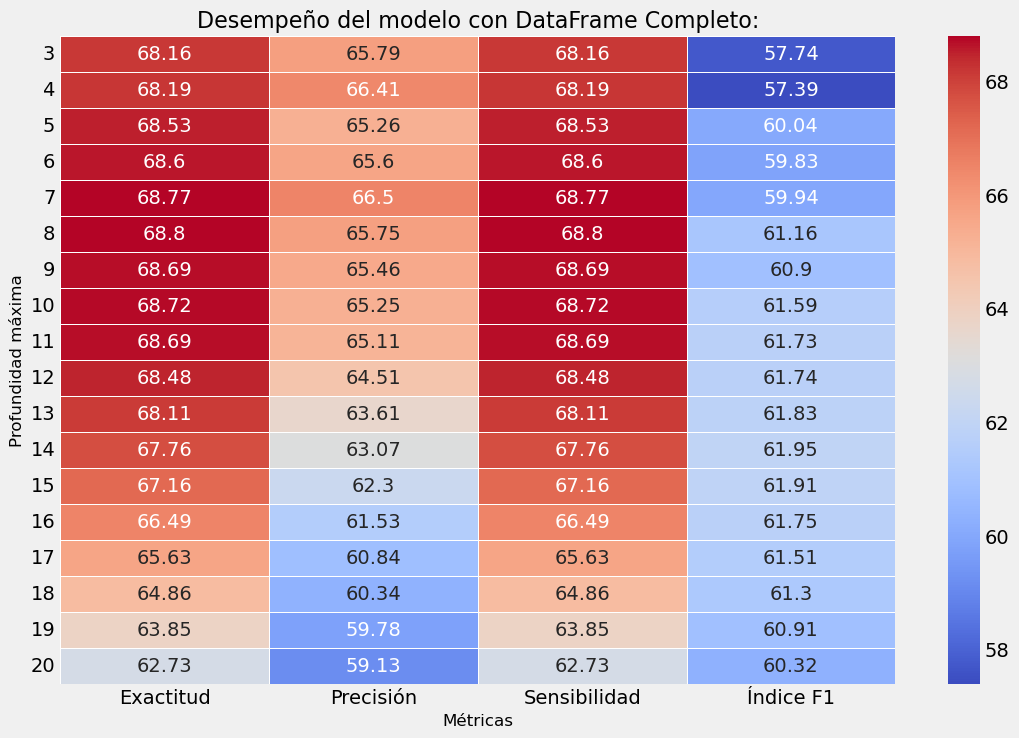


Árbol de decisión, busqueda de max_depth óptimo con DataFrame Selección por Correlación:

X_train shape: (362148, 14)
X_test shape: (90538, 14)
y_train shape: (362148,)
y_test shape: (90538,)



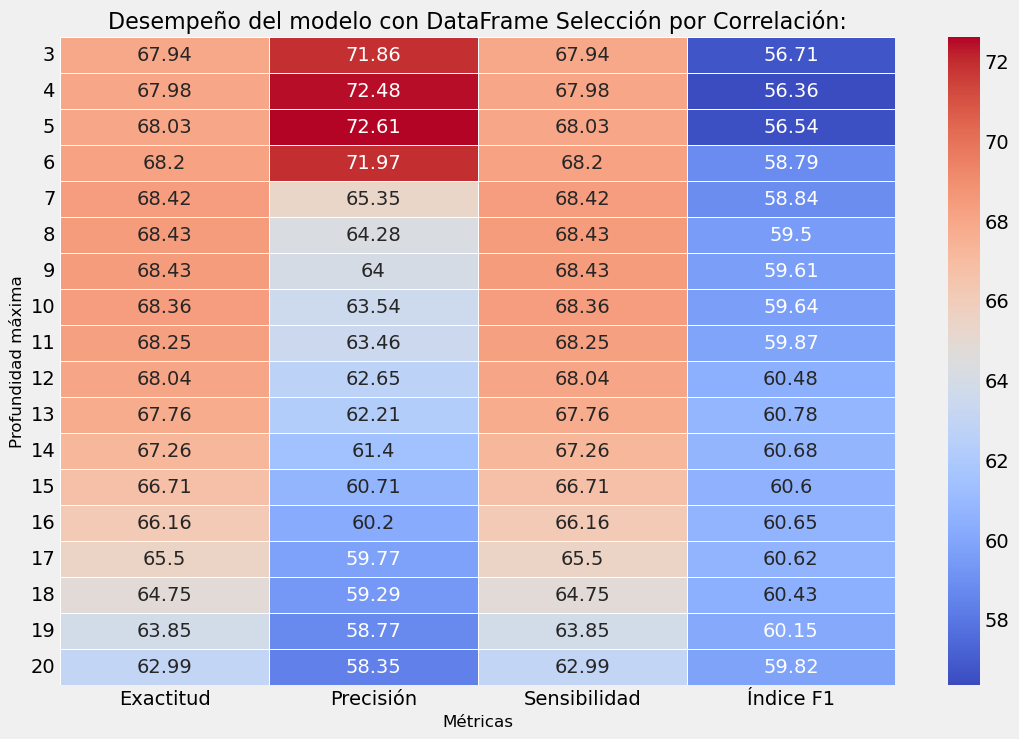


Árbol de decisión, busqueda de max_depth óptimo con DataFrame con PCA:

X_train shape: (362148, 10)
X_test shape: (90538, 10)
y_train shape: (362148,)
y_test shape: (90538,)



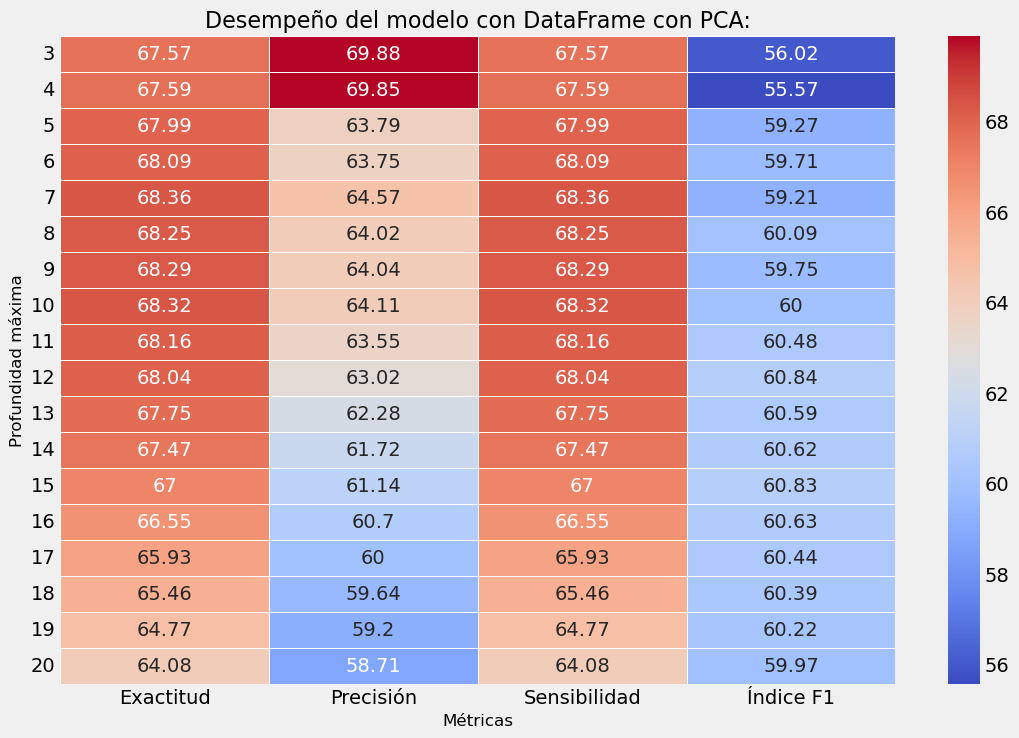

In [42]:
# Probar con cada DataFrame
for nombre, df in dfs.items():
    print("=====================================================")
    print("=====================================================")
    print("")
    print(f"Árbol de decisión, busqueda de max_depth óptimo con {nombre}:")
    print("")
    
    # Separar en datos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(df, puntaje_global_cat, test_size=0.2, random_state=42)

    # Imprimir los tamaños de los conjuntos de prueba y entrenamiento resultantes
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    print("")
    
    resultados_dt = []

    for num in range(3, 21):
        # Árbol
        dt_poda = DecisionTreeClassifier(max_depth=num,random_state=42)
        # Entrenamiento
        dt_poda = dt_poda.fit(X_train, y_train)
        # Predicciones
        y_pred_dt_poda = dt_poda.predict(X_test)

        resultados_dt.append({
            "Profundidad": num,
            "Exactitud": round(metrics.accuracy_score(y_test, y_pred_dt_poda)*100,2),
            "Precisión": round(metrics.precision_score(y_test, y_pred_dt_poda, average='weighted', zero_division=1)*100,2),
            "Sensibilidad": round(metrics.recall_score(y_test, y_pred_dt_poda, average='weighted', zero_division=1)*100,2),
            "Índice F1": round(metrics.f1_score(y_test, y_pred_dt_poda, average='weighted', zero_division=1)*100,2)
        })

    # Convertir a DataFrame para graficar
    resultados_dt_df = pd.DataFrame(resultados_dt)
    resultados_dt_df.set_index("Profundidad", inplace=True)

    # Crear mapa de calor
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(resultados_dt_df, annot=True, cmap='coolwarm', fmt=".5g", linewidths=.5)

    # Add title and labels
    plt.title(f"Desempeño del modelo con {nombre}:", fontsize=16)
    plt.xlabel("Métricas", fontsize=12)
    plt.ylabel("Profundidad máxima", fontsize=12)

    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    # Show the heatmap
    plt.show()

In [43]:
# Indicar profundidad máxima óptima de forma manual a partir de la celda anterior
dfs_max_depth = {
    'DataFrame Completo': 8,
    'DataFrame Selección por Correlación': 7,
    'DataFrame con PCA': 7
}

In [44]:
# Probar con cada DataFrame
for nombre, df in dfs.items():
    print("=====================================================")
    print("=====================================================")
    print("")
    print(f"Árbol de decisión con {nombre}:")
    print("")
    
    # Separar en datos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(df, puntaje_global_cat, test_size=0.2, random_state=42)

    # Imprimir los tamaños de los conjuntos de prueba y entrenamiento resultantes
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    print("")
    
    dtree = DecisionTreeClassifier(max_depth=dfs_max_depth[nombre])
    dtree = dtree.fit(X_train, y_train)
    y_pred_dt = dtree.predict(X_test)
    
    print("Métricas del modelo:")
    print("Exactitud: ",metrics.accuracy_score(y_test, y_pred_dt))
    print("Precisión: ",metrics.precision_score(y_test, y_pred_dt, average='weighted', zero_division=0))
    print("Sensibilidad: ",metrics.recall_score(y_test, y_pred_dt, average='weighted', zero_division=0))
    print("Índice F1: ",metrics.f1_score(y_test, y_pred_dt, average='weighted', zero_division=0))
    print("")
    
    report = classification_report(y_test, y_pred_dt, target_names=dtree.classes_, labels=dtree.classes_, output_dict=True, zero_division=0.0)
    #["Clase 1","Clase 2","Clase 3","Clase 4"]

    report_df = pd.DataFrame(report).transpose()
    print("Métricas del modelo por clase:")
    print(report_df)
    print("")


Árbol de decisión con DataFrame Completo:

X_train shape: (362148, 22)
X_test shape: (90538, 22)
y_train shape: (362148,)
y_test shape: (90538,)

Métricas del modelo:
Exactitud:  0.6879873644215688
Precisión:  0.6555103880275082
Sensibilidad:  0.6879873644215688
Índice F1:  0.6116147773476103

Métricas del modelo por clase:
              precision    recall  f1-score  support
1              0.000000  0.000000  0.000000      0.0
2              0.573274  0.085130  0.148246  15118.0
3              0.697123  0.956865  0.806599  61134.0
4              0.571787  0.177622  0.271045  14103.0
5              0.000000  0.000000  0.000000    183.0
micro avg      0.687987  0.687987  0.687987  90538.0
macro avg      0.368437  0.243923  0.245178  90538.0
weighted avg   0.655510  0.687987  0.611615  90538.0


Árbol de decisión con DataFrame Selección por Correlación:

X_train shape: (362148, 14)
X_test shape: (90538, 14)
y_train shape: (362148,)
y_test shape: (90538,)

Métricas del modelo:
Exactitud:

## Random Forest

In [45]:
# Probar con cada DataFrame
for nombre, df in dfs.items():
    print("=====================================================")
    print("=====================================================")
    print("")
    print(f"Random Forest con {nombre}:")
    print("")
    
    # Separar en datos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(df, puntaje_global_cat, test_size=0.2, random_state=42)

    # Imprimir los tamaños de los conjuntos de prueba y entrenamiento resultantes
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    print("")
    
    #Instanciando el modelo:
    random_forest = RandomForestClassifier(random_state=42)

    #Ajustando el modelo a los datos de entrenamiento:
    random_forest.fit(X_train, y_train)

    #Realizando predicciones con el conjunto de prueba:
    y_pred_rf = random_forest.predict(X_test)
    
    print("Métricas del modelo:")
    print("Exactitud: ",metrics.accuracy_score(y_test, y_pred_rf))
    print("Precisión: ",metrics.precision_score(y_test, y_pred_rf, average='weighted', zero_division=0))
    print("Sensibilidad: ",metrics.recall_score(y_test, y_pred_rf, average='weighted', zero_division=0))
    print("Índice F1: ",metrics.f1_score(y_test, y_pred_rf, average='weighted', zero_division=0))
    print("")
    
    report = classification_report(y_test, y_pred_rf, target_names=random_forest.classes_, labels=random_forest.classes_, output_dict=True, zero_division=0.0)

    report_df = pd.DataFrame(report).transpose()
    print("Métricas del modelo por clase:")
    print(report_df)
    print("")


Random Forest con DataFrame Completo:

X_train shape: (362148, 22)
X_test shape: (90538, 22)
y_train shape: (362148,)
y_test shape: (90538,)

Métricas del modelo:
Exactitud:  0.6799686319556429
Precisión:  0.6370366451160764
Sensibilidad:  0.6799686319556429
Índice F1:  0.621746214697339

Métricas del modelo por clase:
              precision    recall  f1-score  support
1              0.000000  0.000000  0.000000      0.0
2              0.498265  0.132954  0.209900  15118.0
3              0.701983  0.922956  0.797445  61134.0
4              0.512531  0.221868  0.309679  14103.0
5              0.000000  0.000000  0.000000    183.0
micro avg      0.679969  0.679969  0.679969  90538.0
macro avg      0.342556  0.255556  0.263405  90538.0
weighted avg   0.637037  0.679969  0.621746  90538.0


Random Forest con DataFrame Selección por Correlación:

X_train shape: (362148, 14)
X_test shape: (90538, 14)
y_train shape: (362148,)
y_test shape: (90538,)

Métricas del modelo:
Exactitud:  0.64731

## Modelos de Regresión

### Regresion Lineal

In [68]:
# Copiando la variable independiente y solamente el puntaje global
pg = puntaje_global.copy()['PUNT_GLOBAL']


Regresión Lineal con DataFrame Completo:

X_train shape: (362148, 22)
X_test shape: (90538, 22)
y_train shape: (362148,)
y_test shape: (90538,)

283565    188
1709      184
31826     261
27196     271
234790    236
Name: PUNT_GLOBAL, dtype: int64
457598    183
129384    192
225149    287
300853    208
26932     177
Name: PUNT_GLOBAL, dtype: int64
Métricas del modelo:
Error cuadrático medio (MSE): 1873.9691613038483
Error Absoluto Medio (MAE) con PCA: 35.00210688434244
Coeficiente de determinación (R^2): 0.19339862249900142

                               Coeficiente
ESTU_NACIONALIDAD                -0.074480
ESTU_GENERO                       7.662595
ESTU_TIENEETNIA                 -19.711522
FAMI_ESTRATOVIVIENDA             -0.968233
FAMI_EDUCACIONPADRE              -0.628197
FAMI_EDUCACIONMADRE              -0.859798
FAMI_TIENEINTERNET               13.664393
FAMI_TIENESERVICIOTV             -0.761379
FAMI_TIENECOMPUTADOR             15.343604
FAMI_TIENELAVADORA                1.784

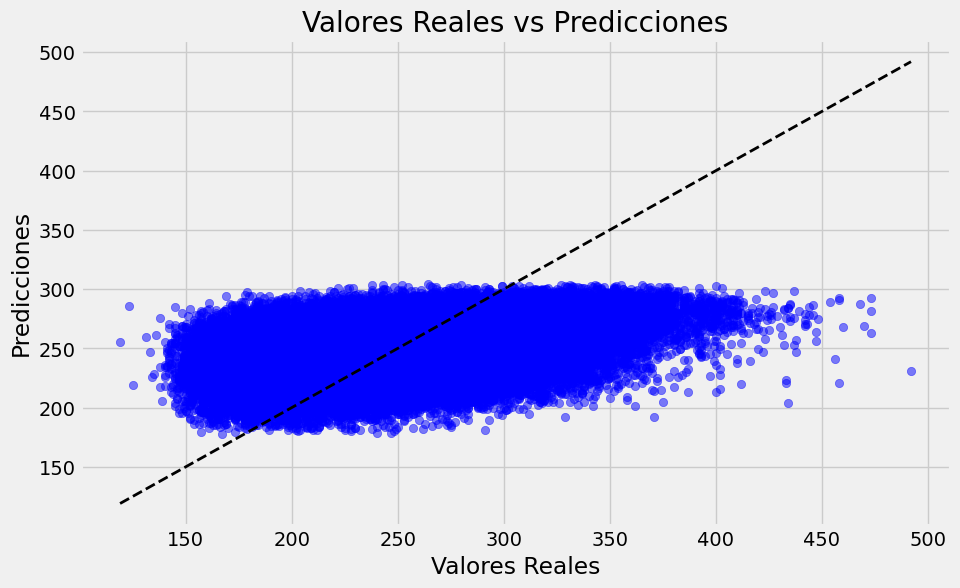

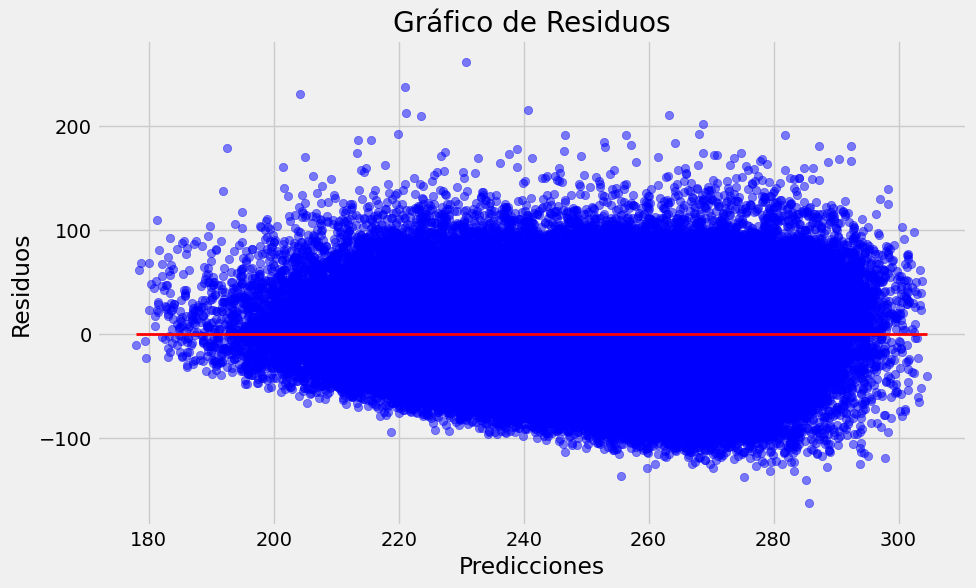


Regresión Lineal con DataFrame Selección por Correlación:

X_train shape: (362148, 14)
X_test shape: (90538, 14)
y_train shape: (362148,)
y_test shape: (90538,)

283565    188
1709      184
31826     261
27196     271
234790    236
Name: PUNT_GLOBAL, dtype: int64
457598    183
129384    192
225149    287
300853    208
26932     177
Name: PUNT_GLOBAL, dtype: int64
Métricas del modelo:
Error cuadrático medio (MSE): 1922.0516887894914
Error Absoluto Medio (MAE) con PCA: 35.527792086013164
Coeficiente de determinación (R^2): 0.17270274675862096

                              Coeficiente
FAMI_EDUCACIONPADRE             -0.576301
FAMI_EDUCACIONMADRE             -0.814117
FAMI_TIENEINTERNET              15.019819
FAMI_TIENESERVICIOTV            -1.365485
FAMI_TIENECOMPUTADOR            15.354967
FAMI_TIENELAVADORA               2.735383
FAMI_TIENEHORNOMICROOGAS         0.762620
FAMI_TIENEAUTOMOVIL              8.416074
FAMI_TIENEMOTOCICLETA           -8.912774
FAMI_TIENECONSOLAVIDEOJUEGOS   

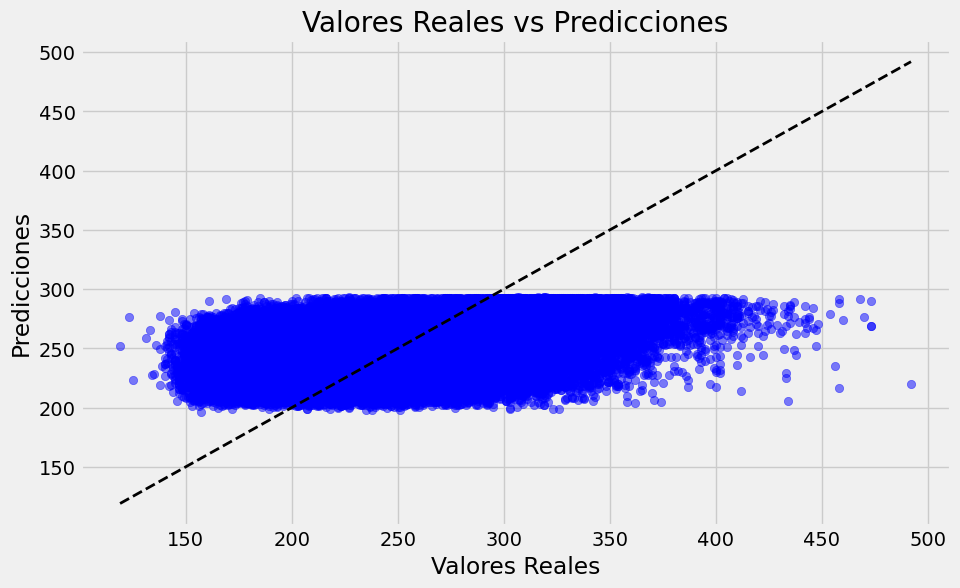

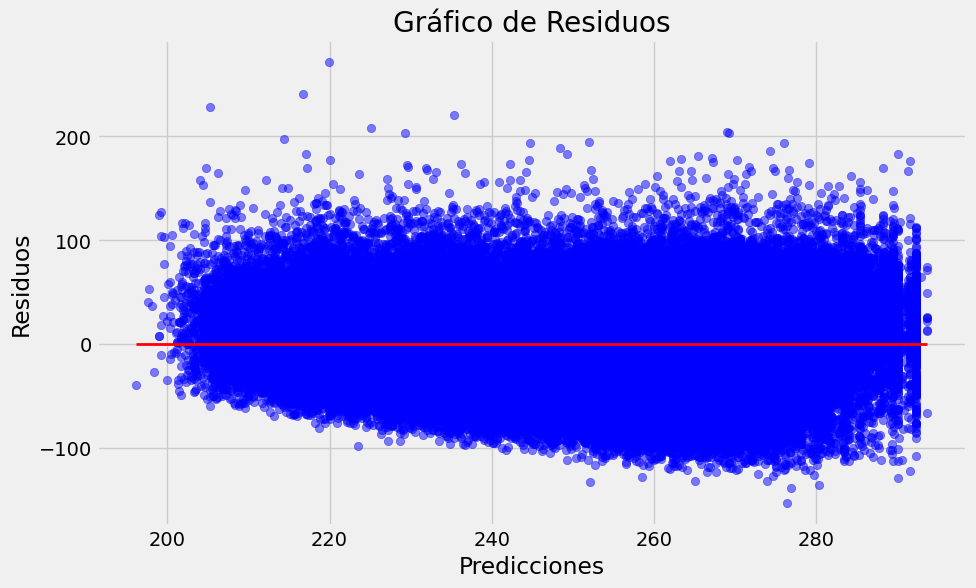


Regresión Lineal con DataFrame con PCA:

X_train shape: (362148, 10)
X_test shape: (90538, 10)
y_train shape: (362148,)
y_test shape: (90538,)

283565    188
1709      184
31826     261
27196     271
234790    236
Name: PUNT_GLOBAL, dtype: int64
457598    183
129384    192
225149    287
300853    208
26932     177
Name: PUNT_GLOBAL, dtype: int64
Métricas del modelo:
Error cuadrático medio (MSE): 2102.9932569755742
Error Absoluto Medio (MAE) con PCA: 37.39373845986707
Coeficiente de determinación (R^2): 0.09482114595119928

      Coeficiente
PC1      2.058819
PC2     -0.195549
PC3     -0.382638
PC4      6.453593
PC5     -4.485832
PC6     -2.790627
PC7     -0.761675
PC8     -0.661057
PC9     -1.957960
PC10    -1.543697



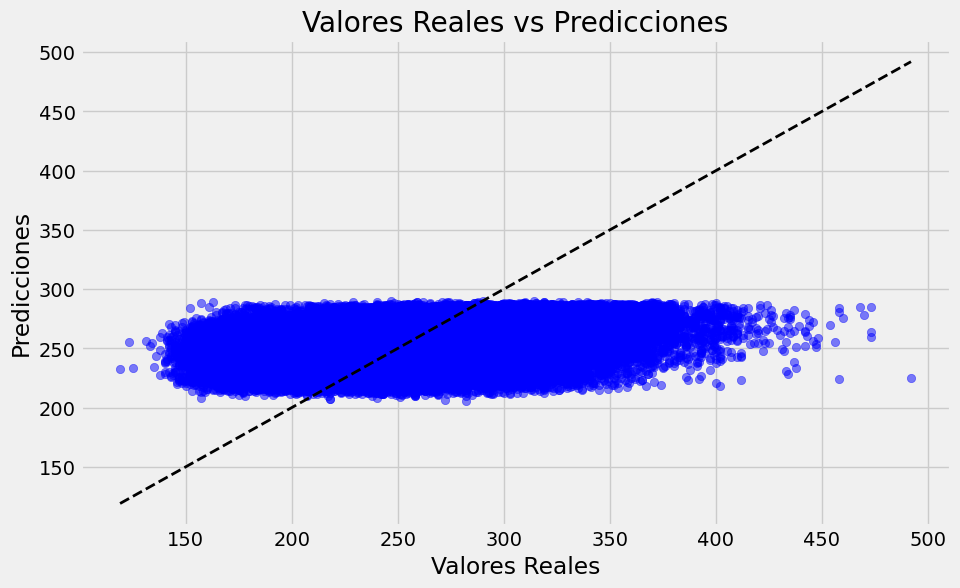

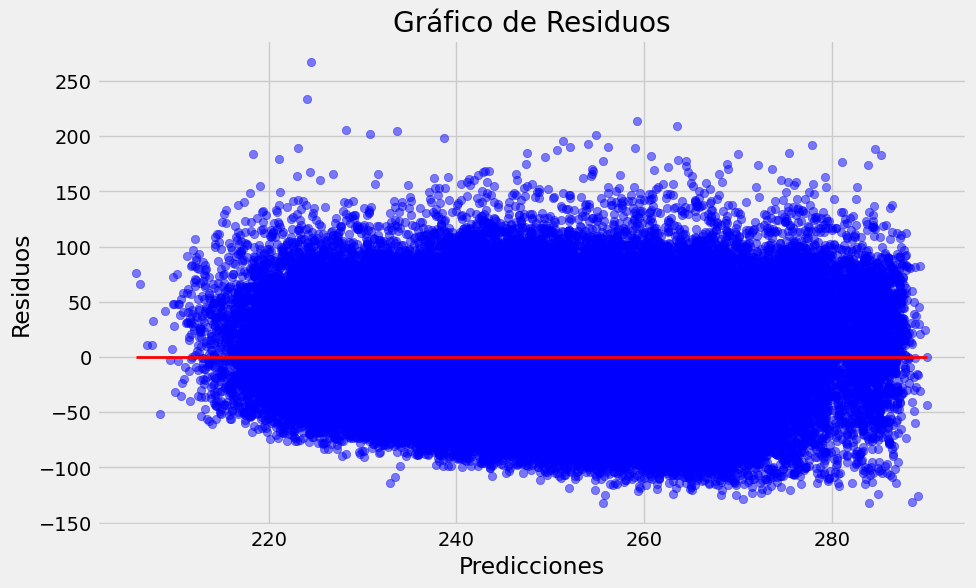

In [69]:
# Probar con cada DataFrame
for nombre, df in dfs.items():
    print("=====================================================")
    print("=====================================================")
    print("")
    print(f"Regresión Lineal con {nombre}:")
    print("")
    
    # Separar en datos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(df, pg, test_size=0.2, random_state=42)

    # Imprimir los tamaños de los conjuntos de prueba y entrenamiento resultantes
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    print("")
    
    #Instanciando el modelo:
    model = LinearRegression()
    
    #Ajustando el modelo a los datos de entrenamiento:
    model.fit(X_train, y_train)
    
    #Realizando predicciones con el conjunto de prueba:
    y_pred = model.predict(X_test)
    
    
    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Métricas del modelo:")
    print(f'Error cuadrático medio (MSE): {mse}')
    print(f'Error Absoluto Medio (MAE) con PCA: {mae}')
    print(f'Coeficiente de determinación (R^2): {r2}')
    print("")
    
    # Mostrar los coeficientes de regresión
    coef_df = pd.DataFrame(model.coef_, df.columns, columns=['Coeficiente'])
    print(coef_df)
    print("")
    
    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    

    # Gráfico de dispersión de valores reales vs predichos
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title('Valores Reales vs Predicciones')
    plt.grid(True)
    plt.show()


    # Gráfico de los residuos
    residuos = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuos, color='blue', alpha=0.5)
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', lw=2)
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.title('Gráfico de Residuos')
    plt.grid(True)
    plt.show()

### Regresion Lasso


Regresión Lasso con DataFrame Completo:

X_train shape: (362148, 22)
X_test shape: (90538, 22)
y_train shape: (362148,)
y_test shape: (90538,)

283565    188
1709      184
31826     261
27196     271
234790    236
Name: PUNT_GLOBAL, dtype: int64
457598    183
129384    192
225149    287
300853    208
26932     177
Name: PUNT_GLOBAL, dtype: int64


C:\Users\diazn\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\diazn\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Métricas del modelo:
Error cuadrático medio (MSE): 1874.3993500915237
Error Absoluto Medio (MAE) con PCA: 35.023439436083876
Coeficiente de determinación (R^2): 0.19321345890298847



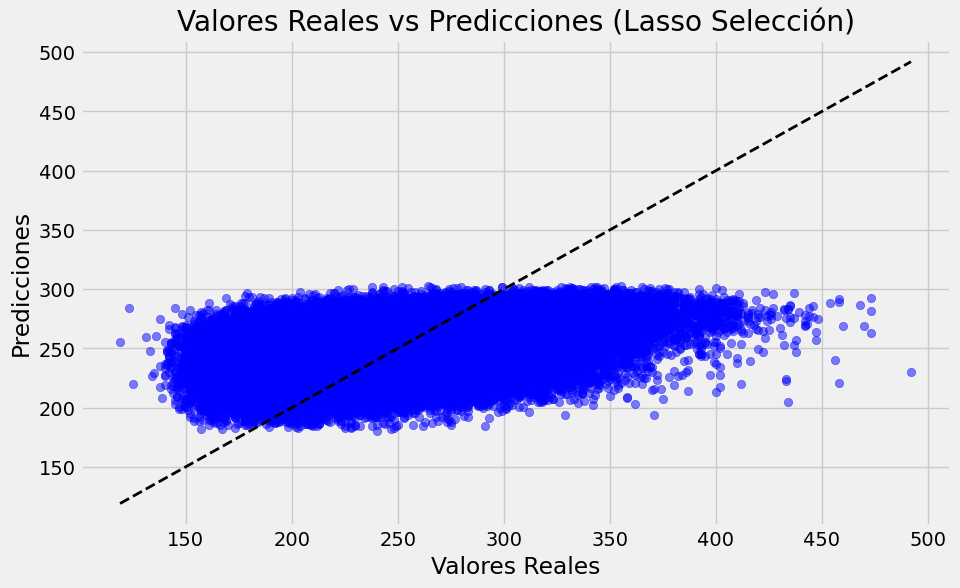

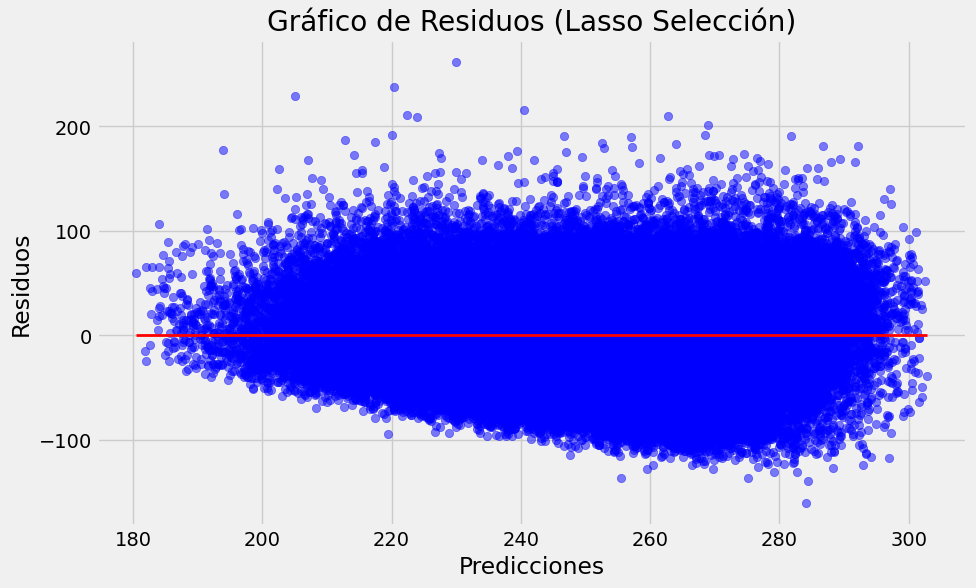


Regresión Lasso con DataFrame Selección por Correlación:

X_train shape: (362148, 14)
X_test shape: (90538, 14)
y_train shape: (362148,)
y_test shape: (90538,)

283565    188
1709      184
31826     261
27196     271
234790    236
Name: PUNT_GLOBAL, dtype: int64
457598    183
129384    192
225149    287
300853    208
26932     177
Name: PUNT_GLOBAL, dtype: int64


C:\Users\diazn\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\diazn\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Métricas del modelo:
Error cuadrático medio (MSE): 1922.39996162603
Error Absoluto Medio (MAE) con PCA: 35.54270192671406
Coeficiente de determinación (R^2): 0.17255284175724794



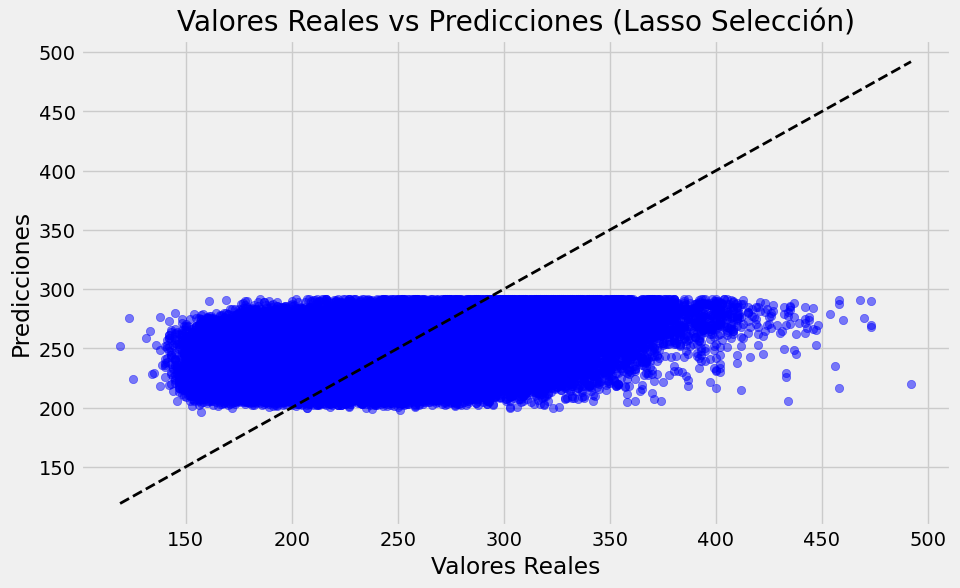

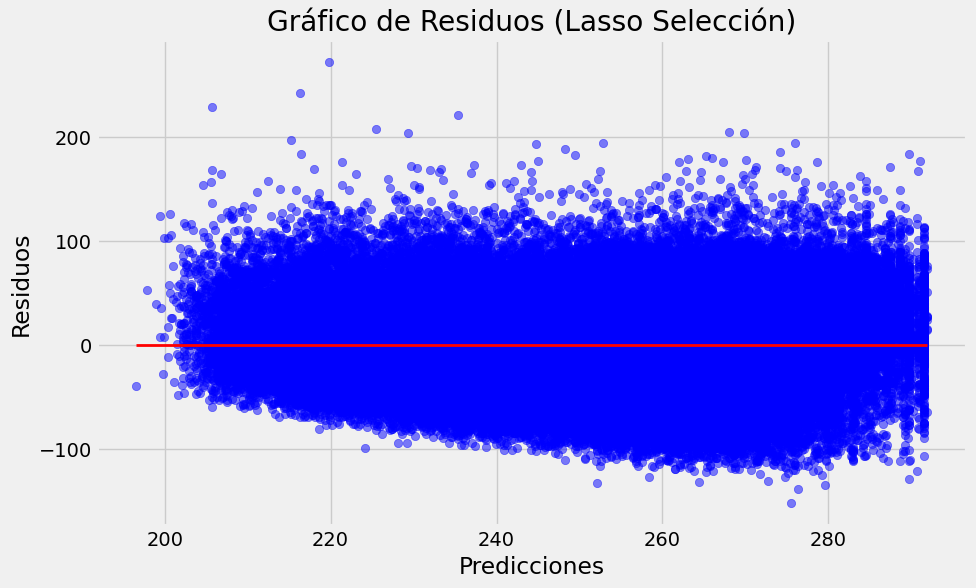


Regresión Lasso con DataFrame con PCA:

X_train shape: (362148, 10)
X_test shape: (90538, 10)
y_train shape: (362148,)
y_test shape: (90538,)

283565    188
1709      184
31826     261
27196     271
234790    236
Name: PUNT_GLOBAL, dtype: int64
457598    183
129384    192
225149    287
300853    208
26932     177
Name: PUNT_GLOBAL, dtype: int64
Métricas del modelo:
Error cuadrático medio (MSE): 2102.929753534223
Error Absoluto Medio (MAE) con PCA: 37.396942737046786
Coeficiente de determinación (R^2): 0.09484847935898832



C:\Users\diazn\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\diazn\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


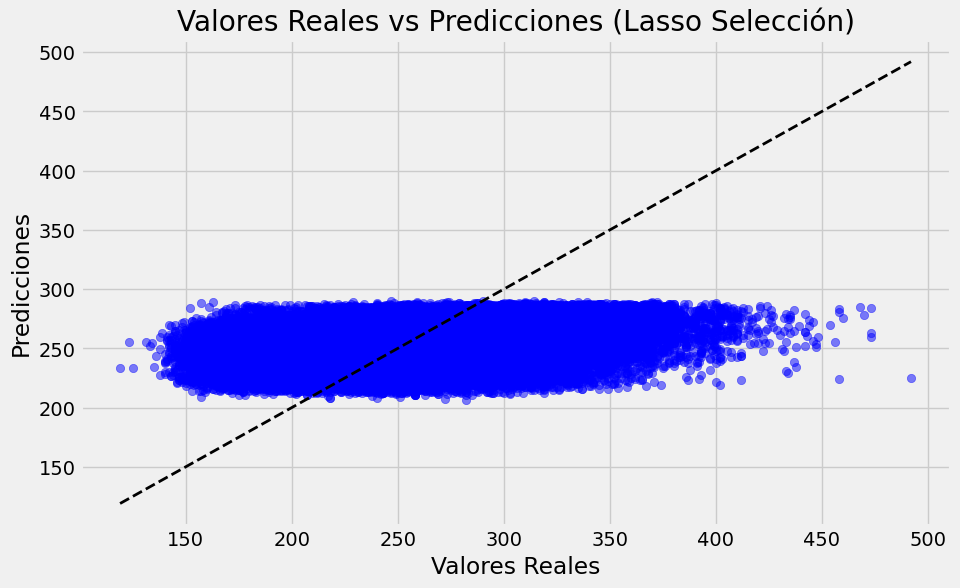

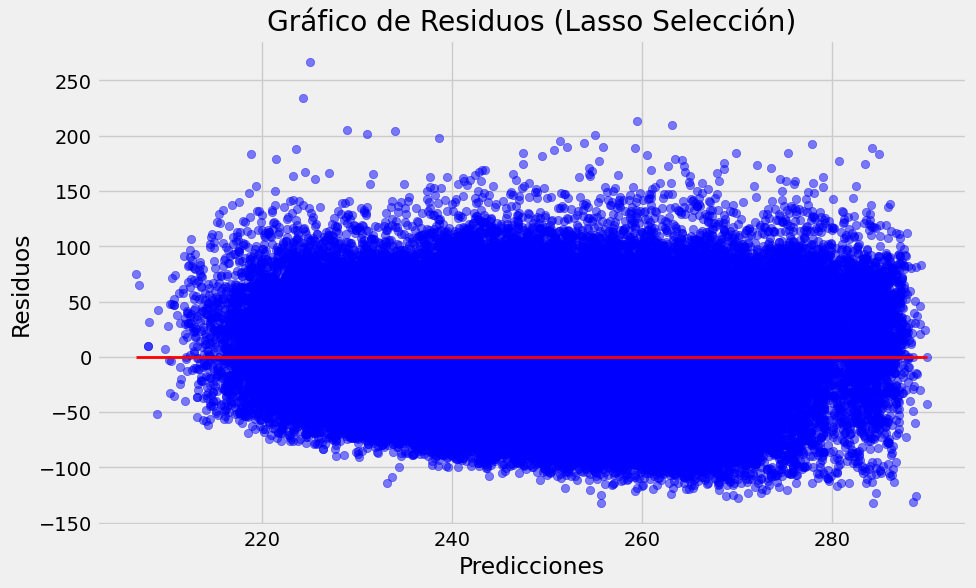

In [70]:
# Probar con cada DataFrame
for nombre, df in dfs.items():
    print("=====================================================")
    print("=====================================================")
    print("")
    print(f"Regresión Lasso con {nombre}:")
    print("")
    
    # Separar en datos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(df, pg, test_size=0.2, random_state=42)

    # Imprimir los tamaños de los conjuntos de prueba y entrenamiento resultantes
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    print("")
    
    # Selección de características utilizando Lasso
    lasso = Lasso(alpha=0.1, max_iter=10000)
    lasso.fit(X_train, y_train)

    model = SelectFromModel(lasso, prefit=True)
    X_train_selected = model.transform(X_train)
    X_test_selected = model.transform(X_test)
    
    # Evaluar el modelo Lasso con características seleccionadas
    lasso_selected = Lasso(alpha=0.1, max_iter=10000)
    lasso_selected.fit(X_train_selected, y_train)
    y_pred = lasso_selected.predict(X_test_selected)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Métricas del modelo:")
    print(f'Error cuadrático medio (MSE): {mse}')
    print(f'Error Absoluto Medio (MAE) con PCA: {mae}')
    print(f'Coeficiente de determinación (R^2): {r2}')
    print("")
    
    # Graficar los resultados
    plt.figure(figsize=(10, 6))

    # Gráfico de dispersión de valores reales vs predichos
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title('Valores Reales vs Predicciones (Lasso Selección)')
    plt.grid(True)
    plt.show()

    # Gráfico de los residuos
    residuos = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuos, color='blue', alpha=0.5)
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', lw=2)
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.title('Gráfico de Residuos (Lasso Selección)')
    plt.grid(True)
    plt.show()

### RandomForestRegressor


Regresión Random Forest Regressor con DataFrame Completo:

X_train shape: (362148, 22)
X_test shape: (90538, 22)
y_train shape: (362148,)
y_test shape: (90538,)

Métricas del modelo:
Error cuadrático medio (MSE): 1752.4374432299853
Error Absoluto Medio (MAE): 33.51673727508771
Coeficiente de determinación (R^2): 0.24570879559717362



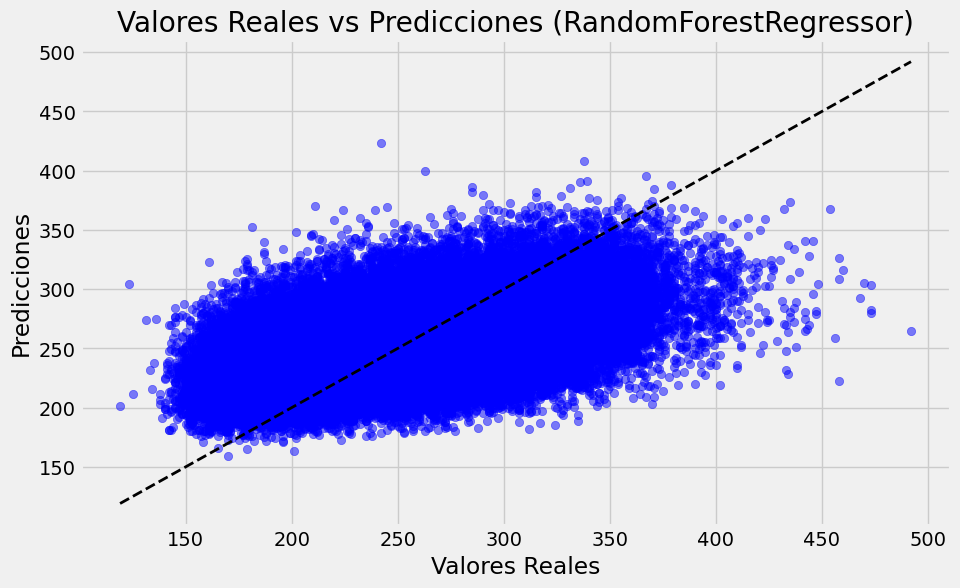

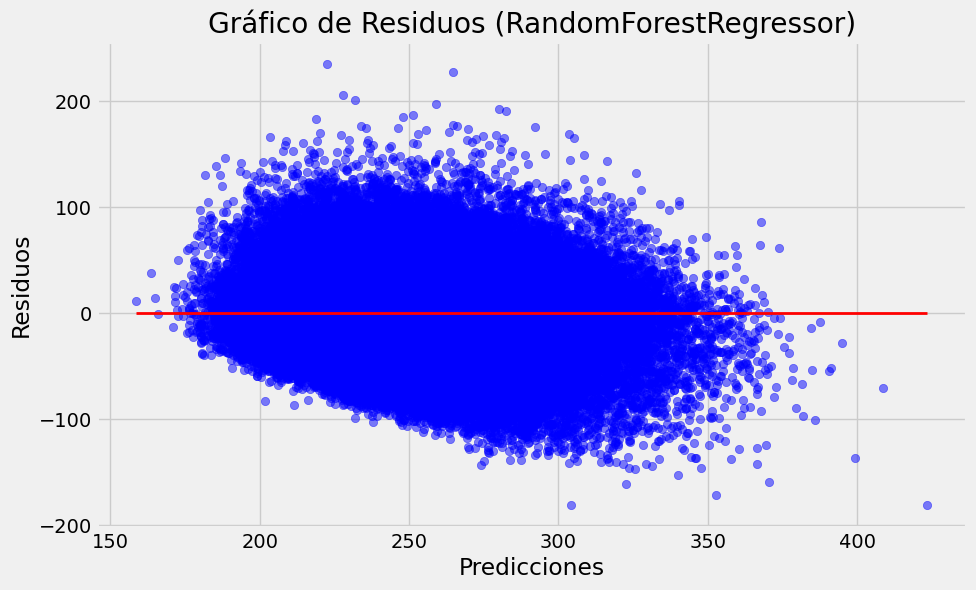

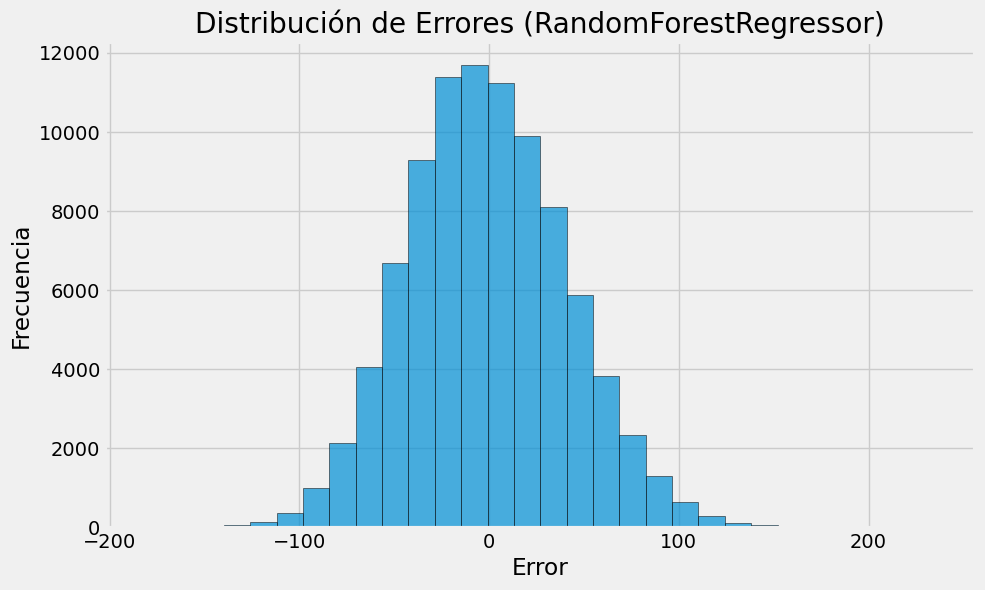

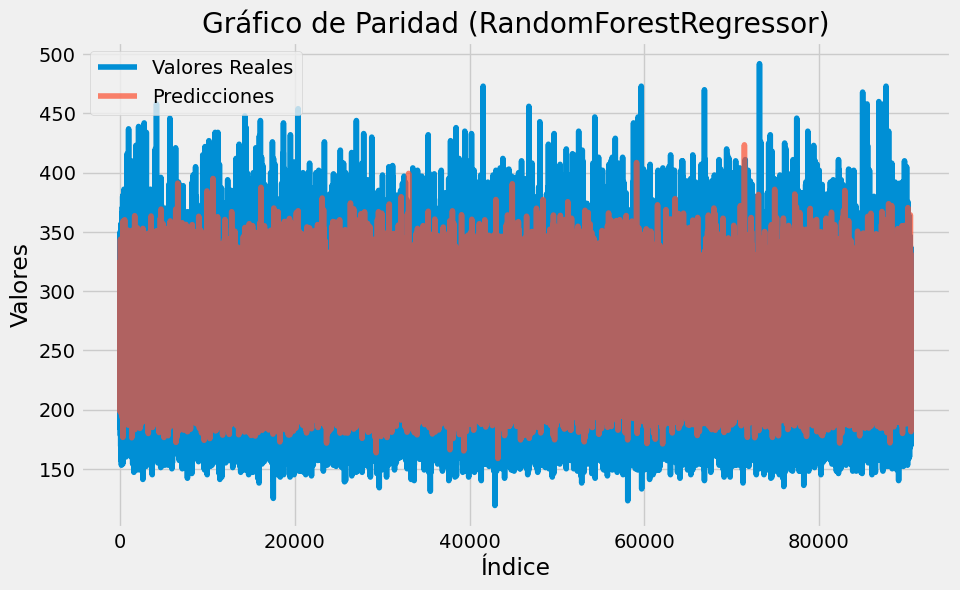


Regresión Random Forest Regressor con DataFrame Selección por Correlación:

X_train shape: (362148, 14)
X_test shape: (90538, 14)
y_train shape: (362148,)
y_test shape: (90538,)

Métricas del modelo:
Error cuadrático medio (MSE): 1994.601892422677
Error Absoluto Medio (MAE): 35.81542911300521
Coeficiente de determinación (R^2): 0.14147539499804573



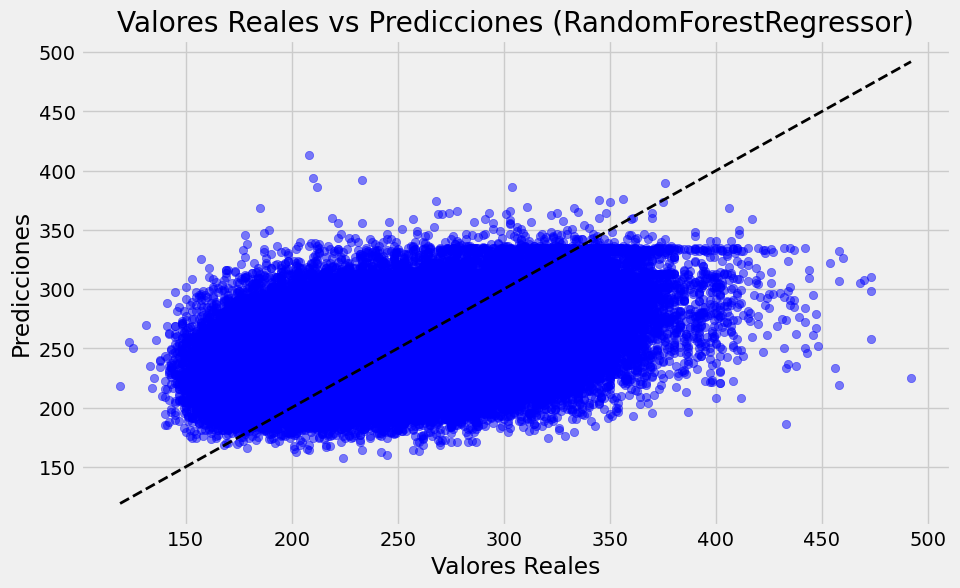

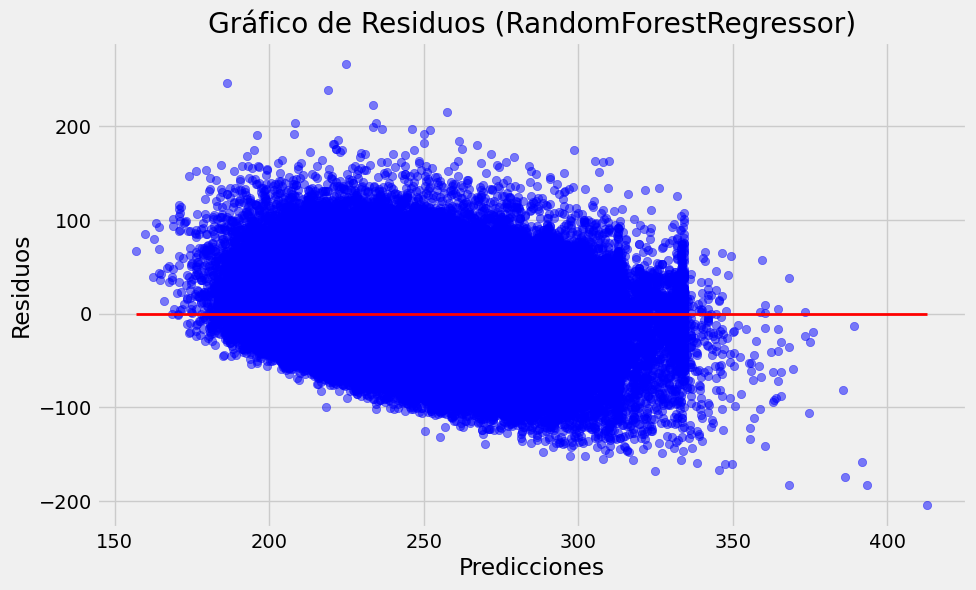

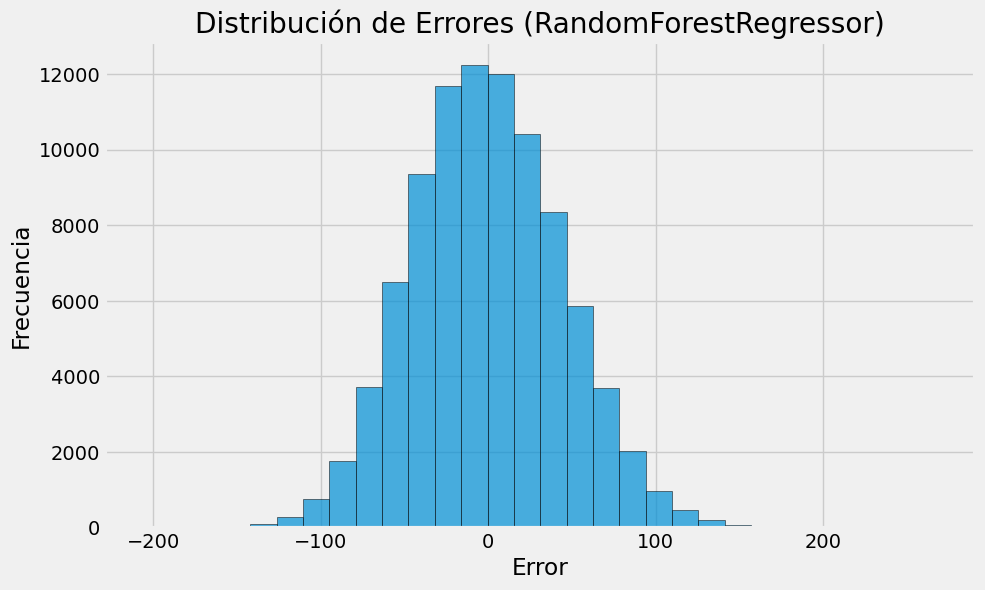

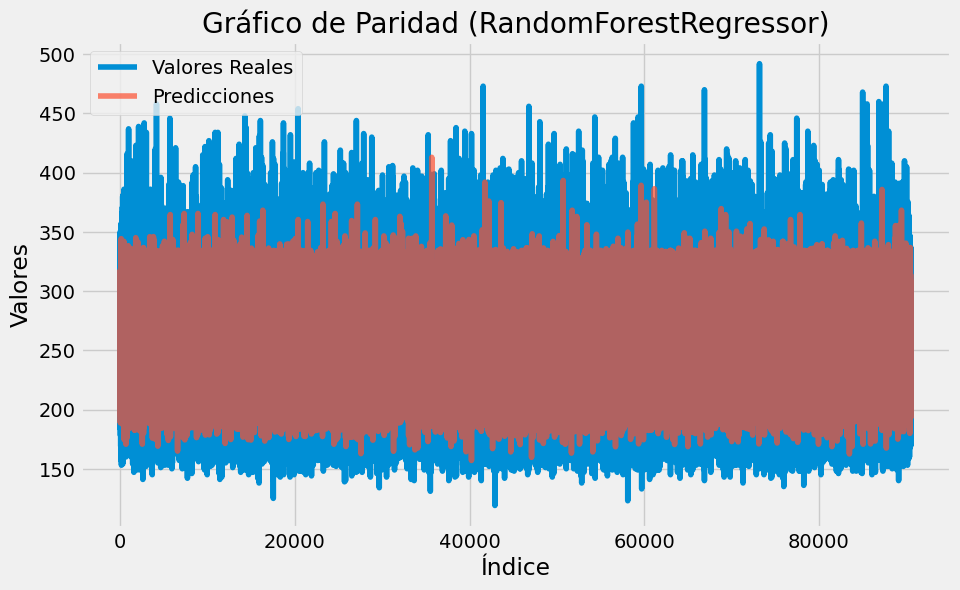


Regresión Random Forest Regressor con DataFrame con PCA:

X_train shape: (362148, 10)
X_test shape: (90538, 10)
y_train shape: (362148,)
y_test shape: (90538,)

Métricas del modelo:
Error cuadrático medio (MSE): 1842.7772567824436
Error Absoluto Medio (MAE): 34.51619977447443
Coeficiente de determinación (R^2): 0.20682436806267956



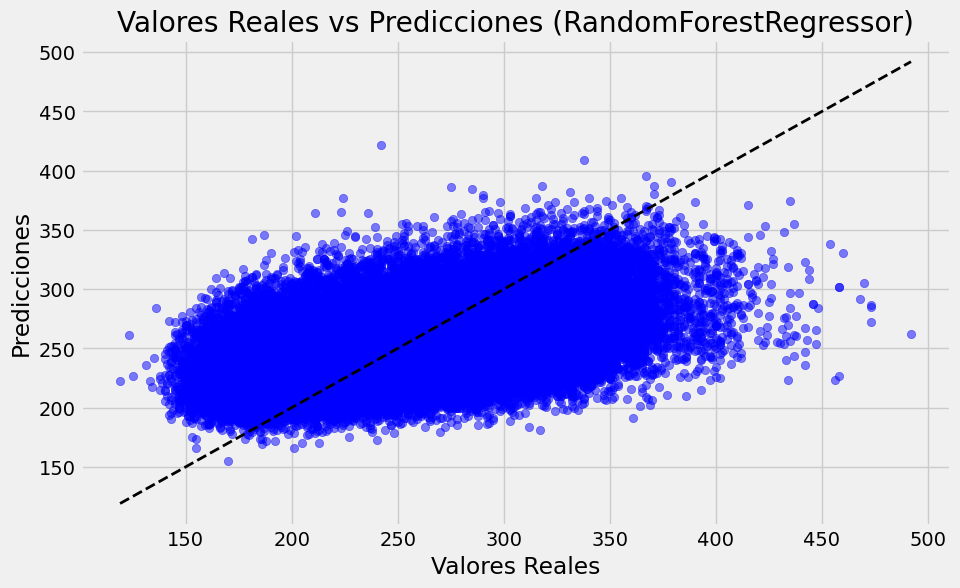

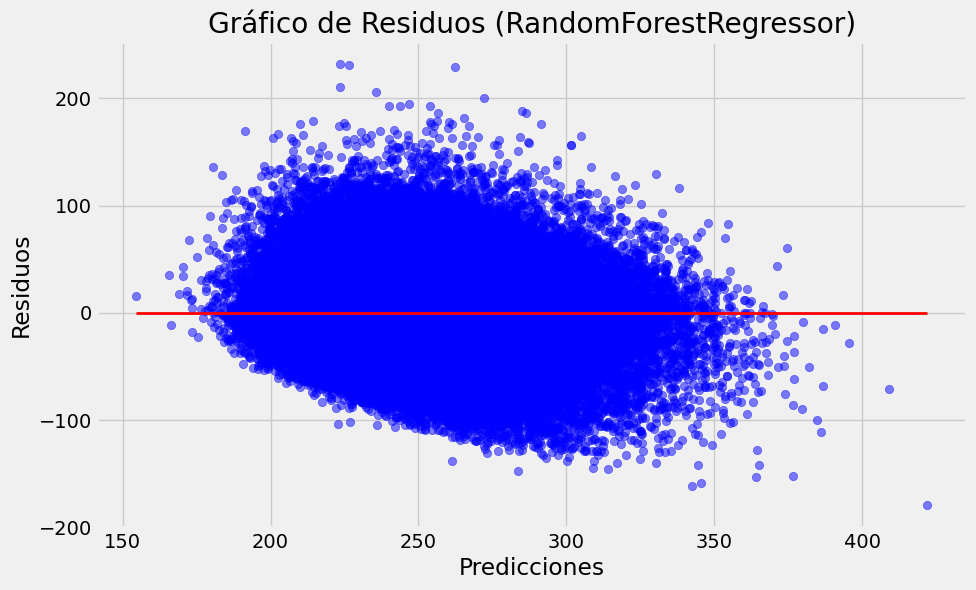

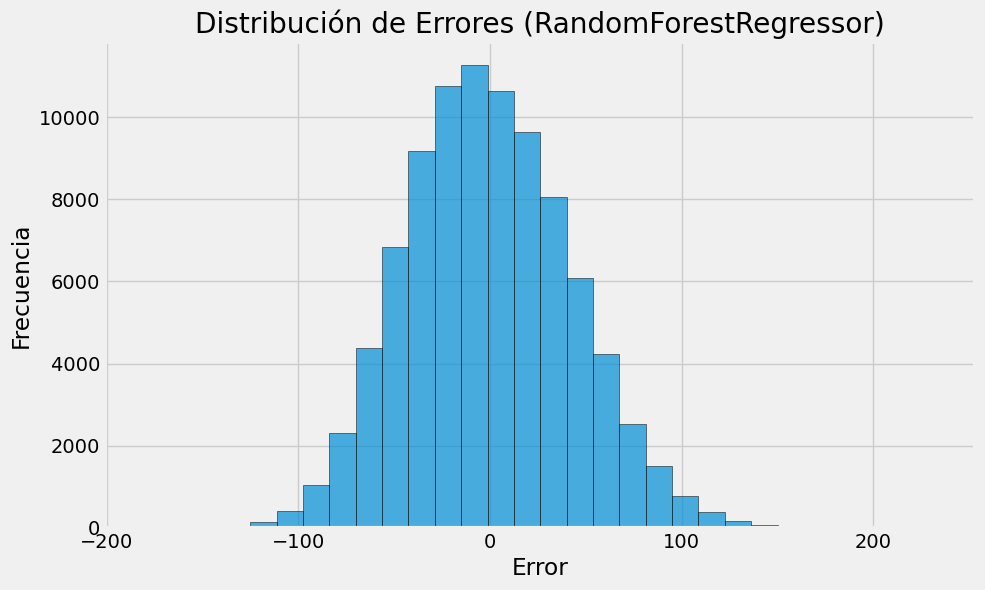

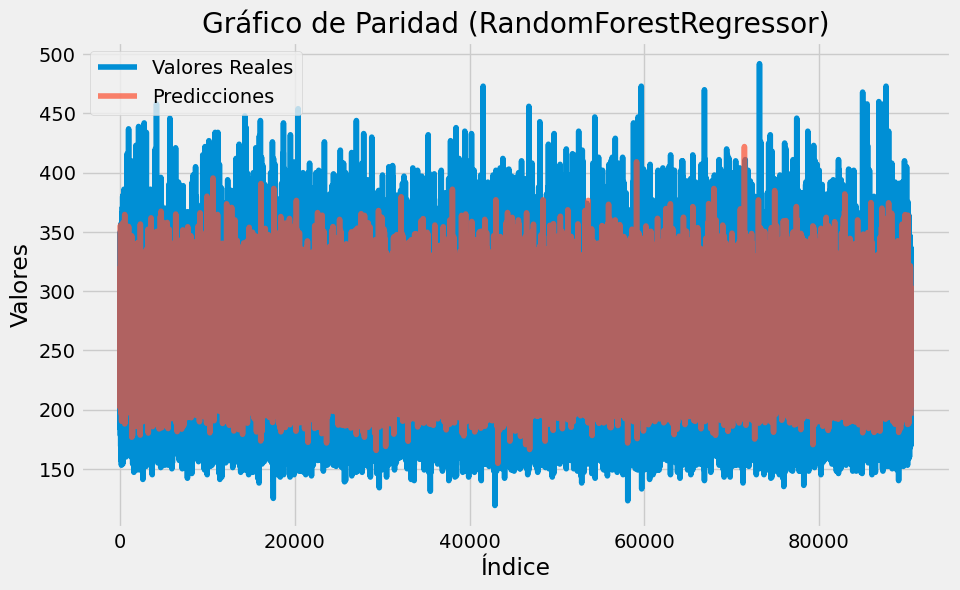

In [79]:
# Probar con cada DataFrame
for nombre, df in dfs.items():
    print("=====================================================")
    print("=====================================================")
    print("")
    print(f"Regresión Random Forest Regressor con {nombre}:")
    print("")
    
    # Separar en datos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(df, pg, test_size=0.2, random_state=42)

    # Imprimir los tamaños de los conjuntos de prueba y entrenamiento resultantes
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    print("")
    
    # Crear y entrenar el modelo RandomForestRegressor
    rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    # Evaluar el modelo RandomForestRegressor
    y_pred_rf = rf.predict(X_test)

    mse_rf = mean_squared_error(y_test, y_pred_rf) 
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    print("Métricas del modelo:")
    print(f'Error cuadrático medio (MSE): {mse_rf}')
    print(f'Error Absoluto Medio (MAE): {mae_rf}')
    print(f'Coeficiente de determinación (R^2): {r2_rf}')
    print("")

    # Gráfico de dispersión de valores reales vs predichos
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title('Valores Reales vs Predicciones (RandomForestRegressor)')
    plt.grid(True)
    plt.show()

    # Gráfico de los residuos
    residuos_rf = y_test - y_pred_rf
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_rf, residuos_rf, color='blue', alpha=0.5)
    plt.hlines(y=0, xmin=y_pred_rf.min(), xmax=y_pred_rf.max(), color='red', lw=2)
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.title('Gráfico de Residuos (RandomForestRegressor)')
    plt.grid(True)
    plt.show()

    # Gráfico de importancia de características
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    #plt.figure(figsize=(12, 6))
    #plt.title('Importancia de Características (RandomForestRegressor)')
    #plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    #plt.xticks(range(X_train.shape[1]), X_train.columns[model.get_support()], rotation=90)
    #plt.xlabel('Características')
    #plt.ylabel('Importancia')
    #plt.show()

    # Gráfico de distribución de errores
    plt.figure(figsize=(10, 6))
    plt.hist(residuos_rf, bins=30, edgecolor='k', alpha=0.7)
    plt.title('Distribución de Errores (RandomForestRegressor)')
    plt.xlabel('Error')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    # Gráfico de paridad
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Valores Reales')
    plt.plot(y_pred_rf, label='Predicciones', alpha=0.7)
    plt.xlabel('Índice')
    plt.ylabel('Valores')
    plt.title('Gráfico de Paridad (RandomForestRegressor)')
    plt.legend()
    plt.grid(True)
    plt.show()
    

### GradientBoostingRegressor


Regresión Gradient BoostingRegressor con DataFrame Completo:

X_train shape: (362148, 22)
X_test shape: (90538, 22)
y_train shape: (362148,)
y_test shape: (90538,)

Métricas del modelo:
Error cuadrático medio (MSE): 1665.7525847312913
Error Absoluto Medio (MAE): 33.00084592104212
Coeficiente de determinación (R^2): 0.28302004261090663



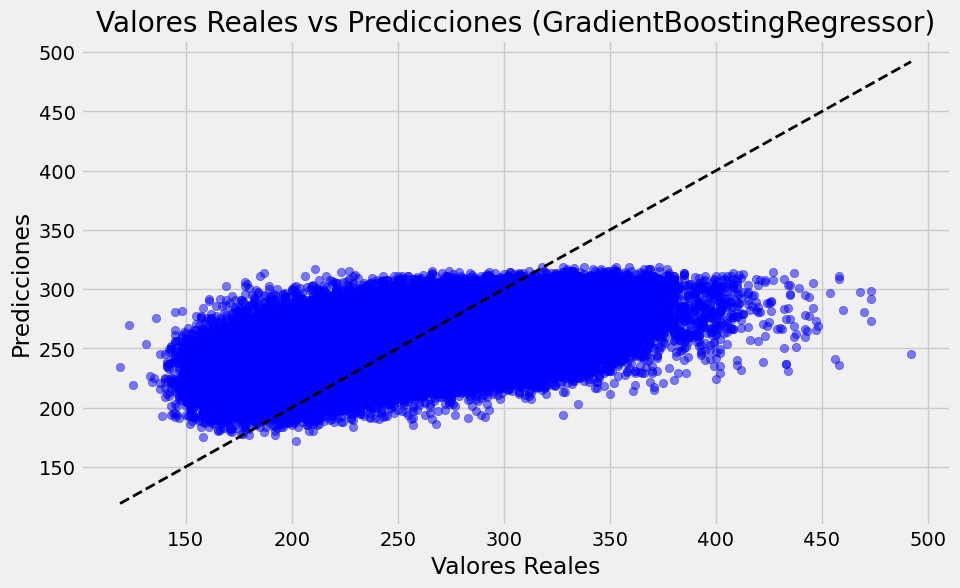

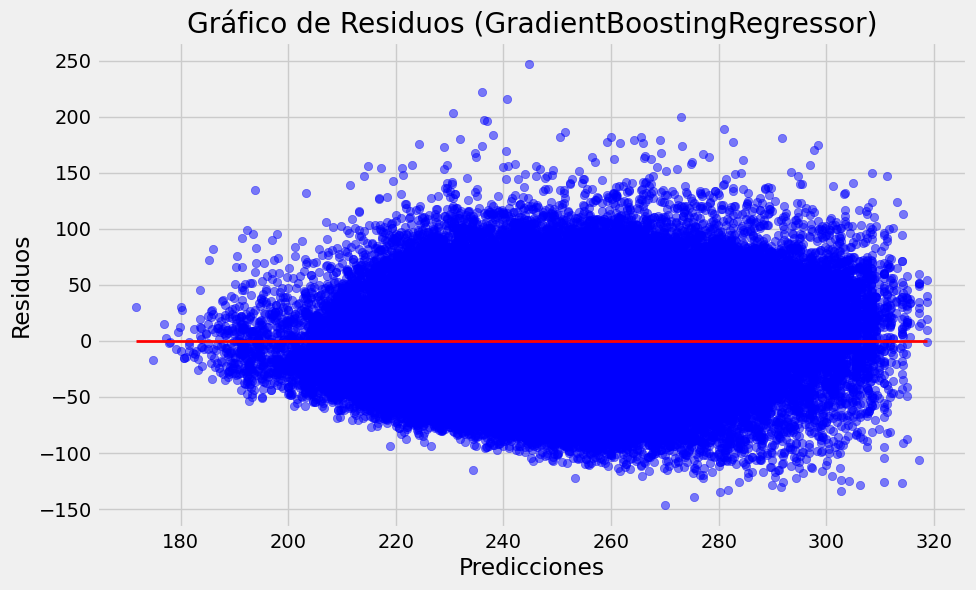

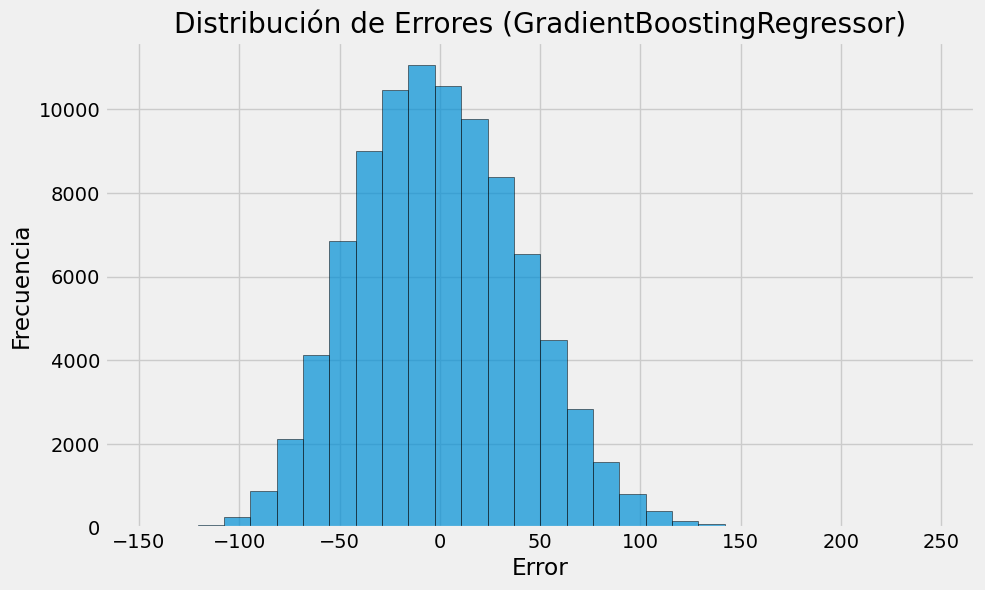

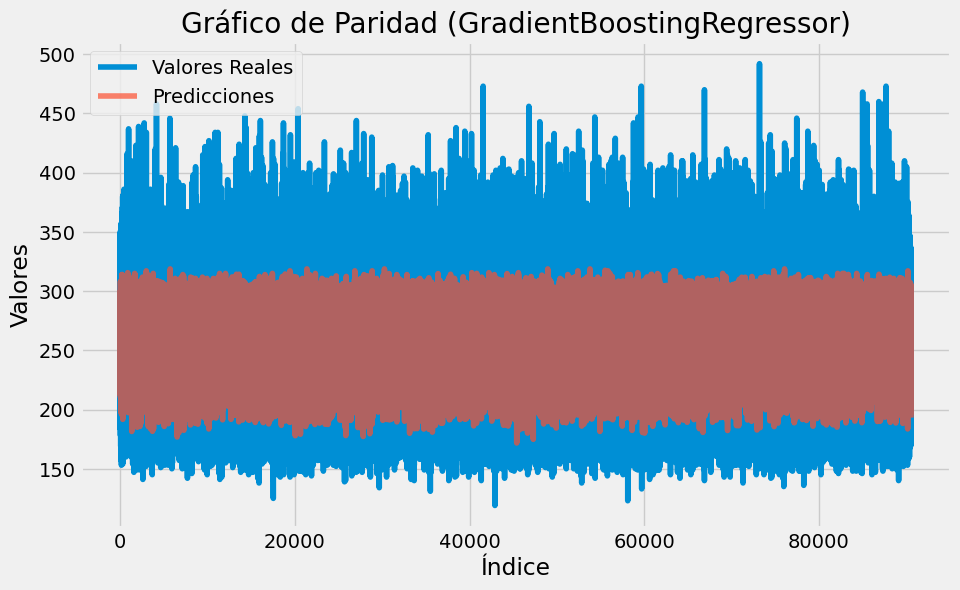


Regresión Gradient BoostingRegressor con DataFrame Selección por Correlación:

X_train shape: (362148, 14)
X_test shape: (90538, 14)
y_train shape: (362148,)
y_test shape: (90538,)

Métricas del modelo:
Error cuadrático medio (MSE): 1757.7003463796648
Error Absoluto Medio (MAE): 33.943632218245405
Coeficiente de determinación (R^2): 0.2434435155606377



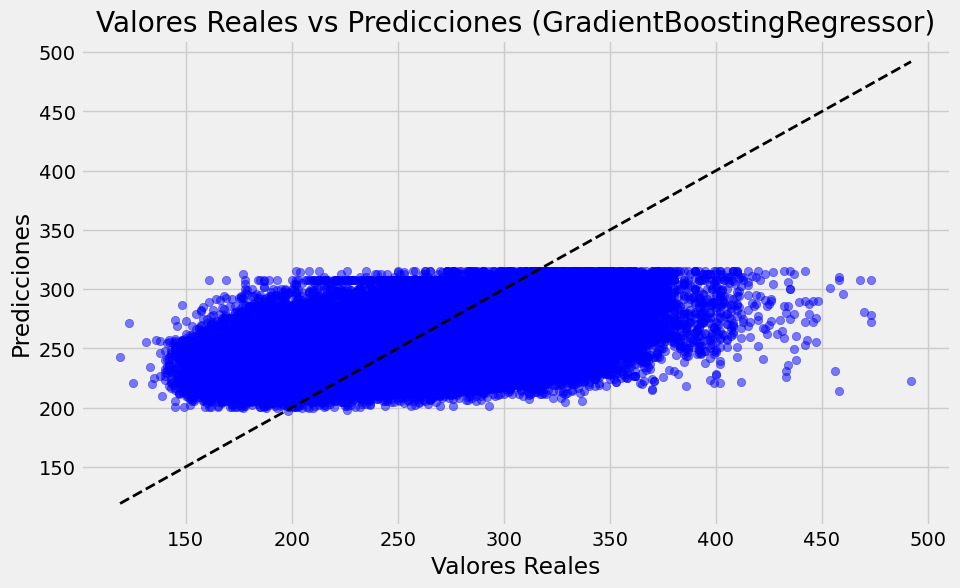

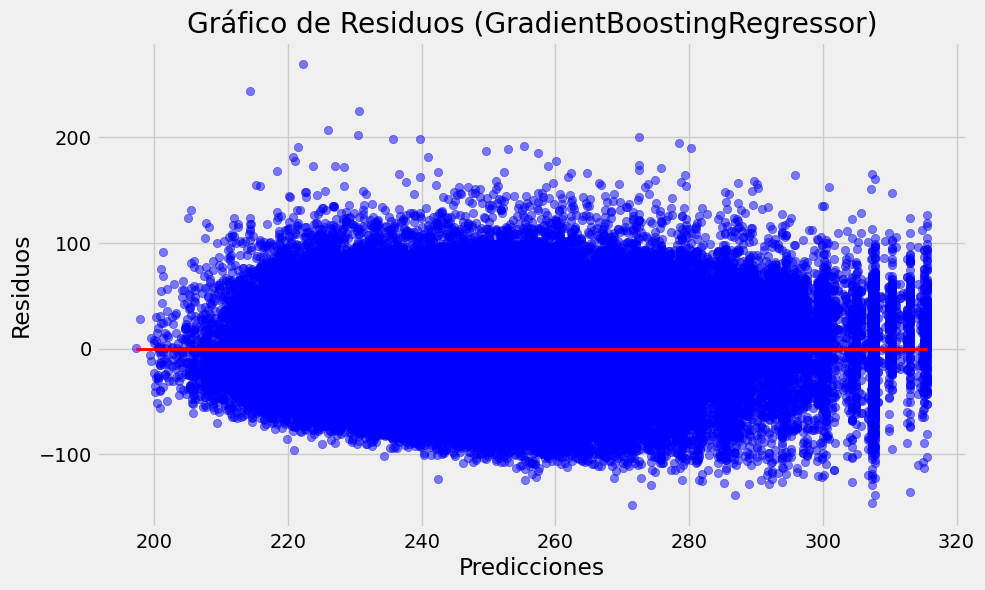

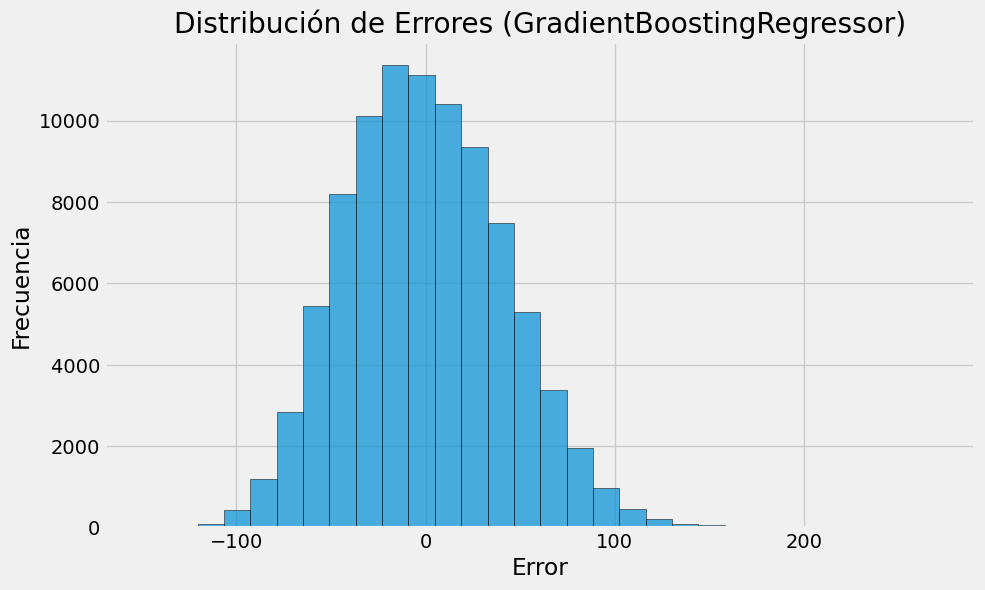

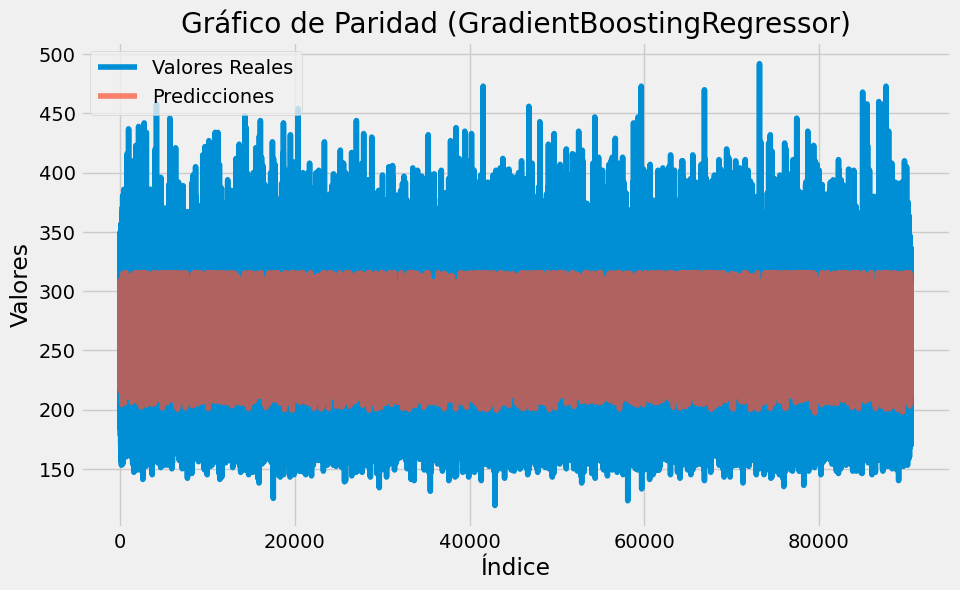


Regresión Gradient BoostingRegressor con DataFrame con PCA:

X_train shape: (362148, 10)
X_test shape: (90538, 10)
y_train shape: (362148,)
y_test shape: (90538,)

Métricas del modelo:
Error cuadrático medio (MSE): 1863.2786014908847
Error Absoluto Medio (MAE): 35.072837682711125
Coeficiente de determinación (R^2): 0.19800009644502614



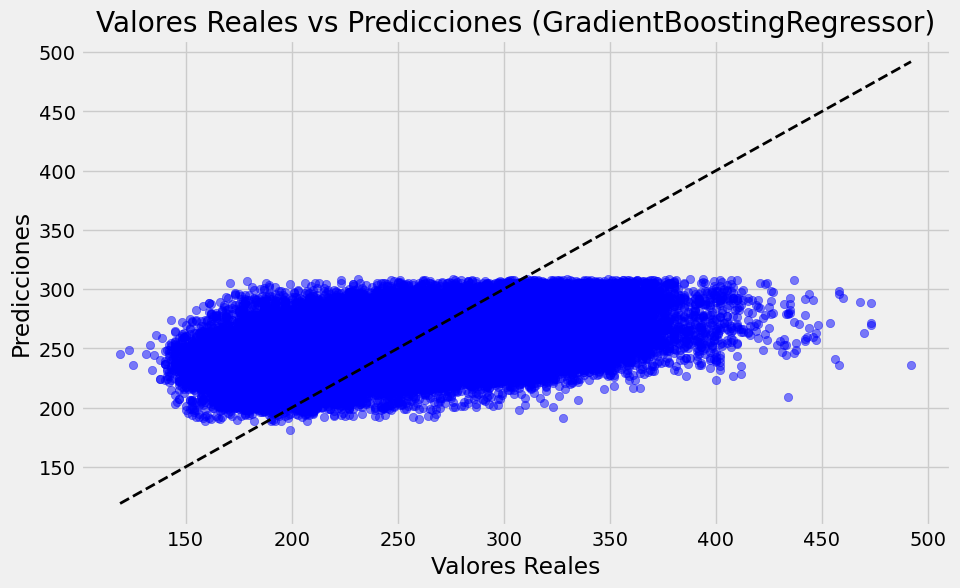

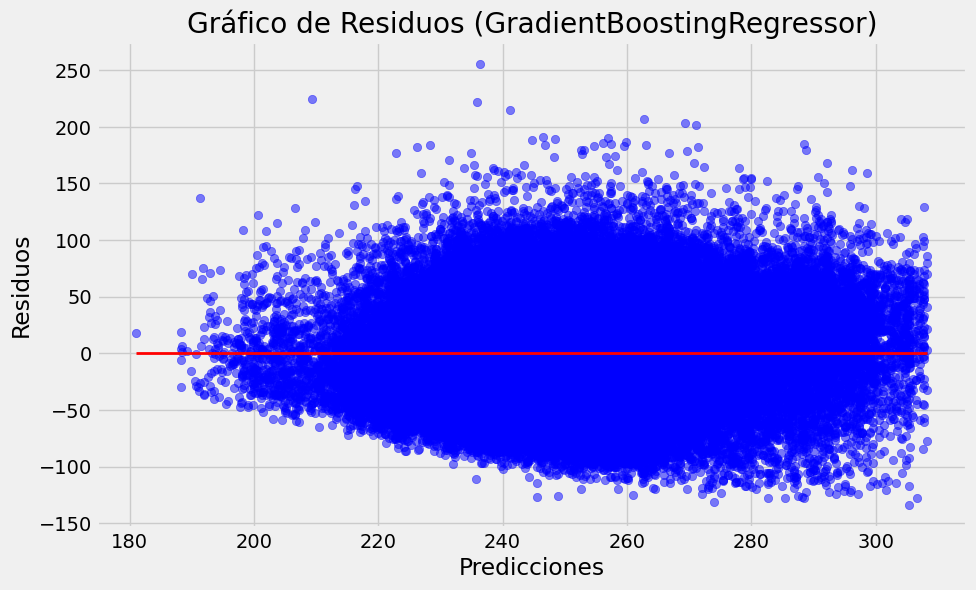

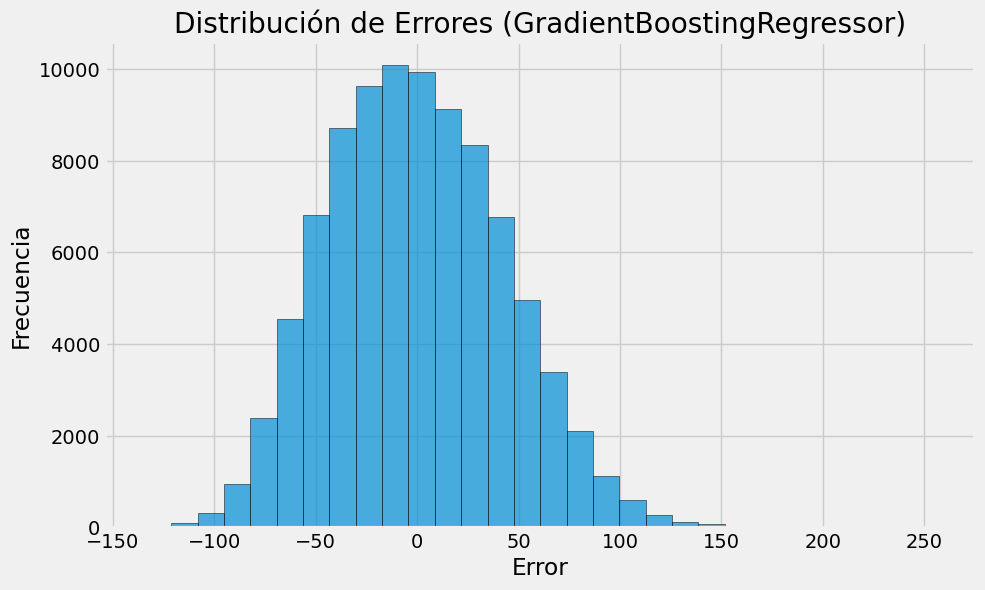

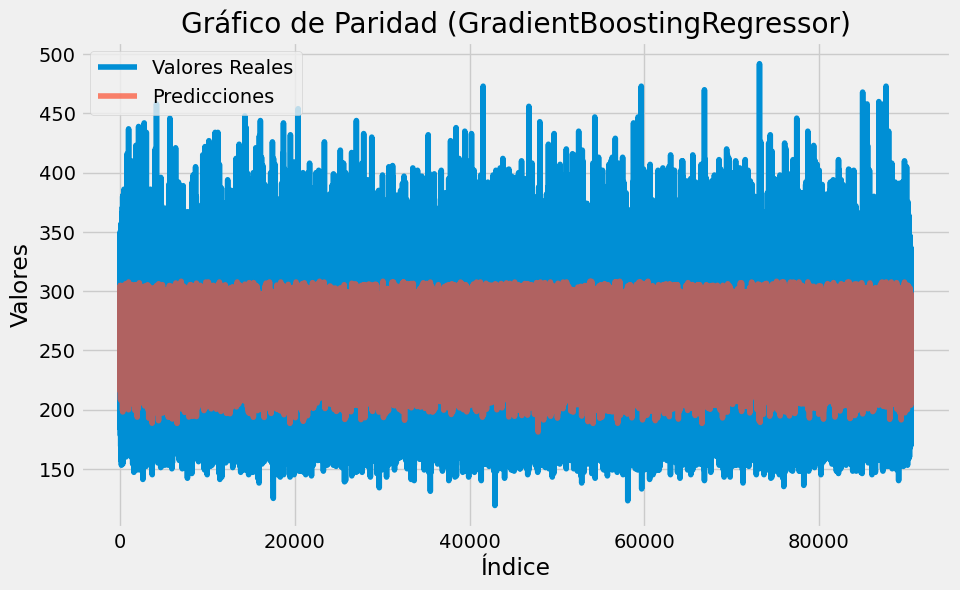

In [83]:
# Probar con cada DataFrame
for nombre, df in dfs.items():
    print("=====================================================")
    print("=====================================================")
    print("")
    print(f"Regresión Gradient BoostingRegressor con {nombre}:")
    print("")
    
    # Separar en datos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(df, pg, test_size=0.2, random_state=42)

    # Imprimir los tamaños de los conjuntos de prueba y entrenamiento resultantes
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    print("")
    
    # Crear y entrenar el modelo GradientBoostingRegressor
    gbr = GradientBoostingRegressor(n_estimators=50, random_state=42)  # Ajusta n_estimators según sea necesario
    gbr.fit(X_train, y_train)  # Entrenar el modelo una vez

    # Evaluar el modelo GradientBoostingRegressor
    y_pred_gbr = gbr.predict(X_test)

    mse_gbr = mean_squared_error(y_test, y_pred_gbr)
    mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
    r2_gbr = r2_score(y_test, y_pred_gbr)

    print("Métricas del modelo:")
    print(f'Error cuadrático medio (MSE): {mse_gbr}')
    print(f'Error Absoluto Medio (MAE): {mae_gbr}')
    print(f'Coeficiente de determinación (R^2): {r2_gbr}')
    print("")

    # Graficar los resultados

    # Gráfico de dispersión de valores reales vs predichos
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_gbr, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title('Valores Reales vs Predicciones (GradientBoostingRegressor)')
    plt.grid(True)
    plt.show()

    # Gráfico de los residuos
    residuos_gbr = y_test - y_pred_gbr
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_gbr, residuos_gbr, color='blue', alpha=0.5)
    plt.hlines(y=0, xmin=y_pred_gbr.min(), xmax=y_pred_gbr.max(), color='red', lw=2)
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.title('Gráfico de Residuos (GradientBoostingRegressor)')
    plt.grid(True)
    plt.show()

    # Gráfico de importancia de características
    importances_gbr = gbr.feature_importances_
    indices = np.argsort(importances_gbr)[::-1]

    #plt.figure(figsize=(12, 6))
    #plt.title('Importancia de Características (GradientBoostingRegressor)')
    #plt.bar(range(X_train.shape[1]), importances_gbr[indices], align='center')
    #plt.xticks(range(X_train.shape[1]), X.columns[model.get_support()][indices], rotation=90)
    #plt.xlabel('Características')
    #plt.ylabel('Importancia')
    #plt.show()

    # Gráfico de distribución de errores
    plt.figure(figsize=(10, 6))
    plt.hist(residuos_gbr, bins=30, edgecolor='k', alpha=0.7)
    plt.title('Distribución de Errores (GradientBoostingRegressor)')
    plt.xlabel('Error')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    # Gráfico de paridad
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Valores Reales')
    plt.plot(y_pred_gbr, label='Predicciones', alpha=0.7)
    plt.xlabel('Índice')
    plt.ylabel('Valores')
    plt.title('Gráfico de Paridad (GradientBoostingRegressor)')
    plt.legend()
    plt.grid(True)
    plt.show()

    

### Regresión Polinómica


Regresión Polinomica con DataFrame Completo:

X_train shape: (362148, 276)
X_test shape: (90538, 276)
y_train shape: (362148,)
y_test shape: (90538,)

Métricas del modelo:
Error cuadrático medio (MSE): 1673.314666621609
Error Absoluto Medio (MAE): 32.884123622126864
Coeficiente de determinación (R^2): 0.27976514077182735



C:\Users\diazn\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


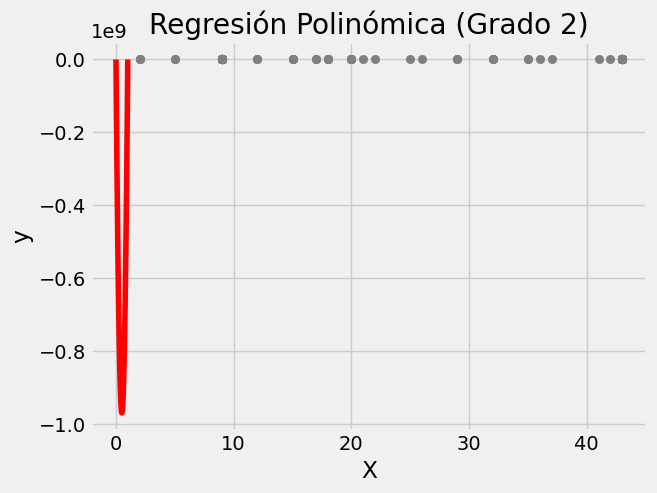


Regresión Polinomica con DataFrame Selección por Correlación:

X_train shape: (362148, 120)
X_test shape: (90538, 120)
y_train shape: (362148,)
y_test shape: (90538,)

Métricas del modelo:
Error cuadrático medio (MSE): 1817.0223782425426
Error Absoluto Medio (MAE): 34.44617592365578
Coeficiente de determinación (R^2): 0.2179098869370676



C:\Users\diazn\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


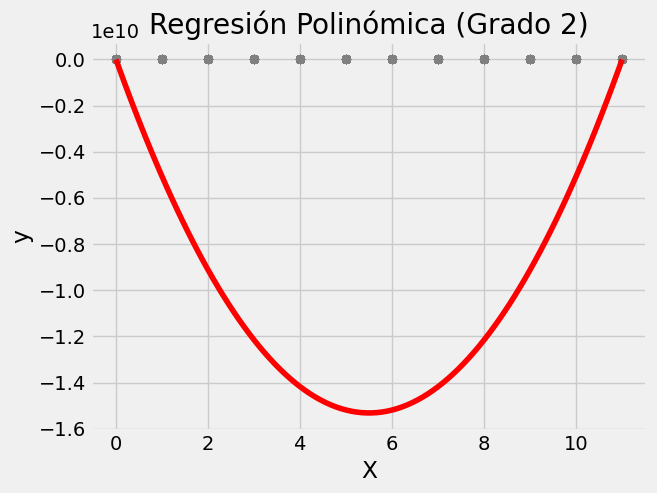


Regresión Polinomica con DataFrame con PCA:

X_train shape: (362148, 66)
X_test shape: (90538, 66)
y_train shape: (362148,)
y_test shape: (90538,)

Métricas del modelo:
Error cuadrático medio (MSE): 1862.2091771282983
Error Absoluto Medio (MAE): 34.903929964433225
Coeficiente de determinación (R^2): 0.19846040239979168



C:\Users\diazn\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


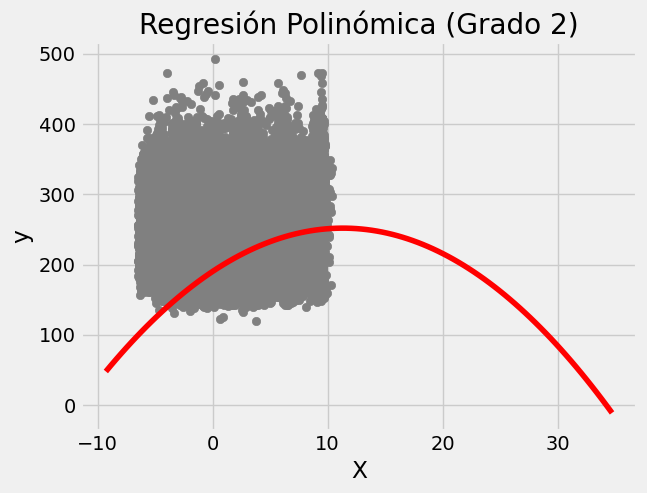

In [87]:
# Probar con cada DataFrame
for nombre, df in dfs.items():
    print("=====================================================")
    print("=====================================================")
    print("")
    print(f"Regresión Polinomica con {nombre}:")
    print("")
    
    # Transformar características con PolynomialFeatures
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(df)
    
    # Separar en datos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_poly, pg, test_size=0.2, random_state=42)

    # Imprimir los tamaños de los conjuntos de prueba y entrenamiento resultantes
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    print("")

    # Crear el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Hacer predicciones con el conjunto de prueba
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Métricas del modelo:")
    print(f'Error cuadrático medio (MSE): {mse}')
    print(f'Error Absoluto Medio (MAE): {mae}')
    print(f'Coeficiente de determinación (R^2): {r2}')
    print("")

    # Visualizar los resultados
    plt.scatter(X_test[:, 1], y_test, color='gray')  # Suponiendo que X_test tiene múltiples características, elegimos la segunda para la visualización

    # Generar datos para la visualización
    X_fit = np.zeros((100, df.shape[1]))  # Inicializar X_fit con el tamaño adecuado

    for i in range(df.shape[1]):
        min_val = np.min(df.values[:, i])
        max_val = np.max(df.values[:, i])
        X_fit[:, i] = np.linspace(min_val, max_val, 100)

    # Transformar los datos de visualización usando PolynomialFeatures
    X_fit_poly = poly.transform(X_fit)

    # Realizar predicciones sobre los datos transformados de visualización
    y_fit = model.predict(X_fit_poly)

    # Graficar la regresión polinómica ajustada sobre los datos de visualización
    plt.plot(X_fit[:, 1], y_fit, color='red')  # Suponiendo que X_fit también tiene múltiples características, elegimos la segunda para la visualización
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Regresión Polinómica (Grado 2)')
    plt.show()

    
    

## Crear CSV para Dashboard

In [71]:
df_DashBoard = df_sin_duplicados.copy()

# Campos a eliminar con poca correlación con la variable dependiente
campoNoRelevantes  = [
    'ESTU_NACIONALIDAD',
    'ESTU_GENERO',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_COMECEREALFRUTOSLEGUMBRE',
    'FAMI_SITUACIONECONOMICA',
    'ESTU_DEDICACIONLECTURADIARIA',
    'ESTU_DEDICACIONINTERNET'
]

# Eliminar campos solo si existen en el DataFrame
if all(col in df_DashBoard.columns for col in campoNoRelevantes):
    df_DashBoard = df_DashBoard.drop(columns=campoNoRelevantes)

# Ahora exportamos el dataframe a un archivo CSV
df_DashBoard.to_csv('df_DashBoard.csv', index=False)

## Modelo Seleccionado

In [89]:
print("Árbol de decisión")
print("")

df_modelo_seleccionado = dfs['DataFrame Completo']

# Separar en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_modelo_seleccionado, puntaje_global_cat, test_size=0.2, random_state=42)

# Imprimir los tamaños de los conjuntos de prueba y entrenamiento resultantes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("")

dtree = DecisionTreeClassifier(max_depth=8)
dtree = dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

print("Métricas del modelo:")
print("Exactitud: ",metrics.accuracy_score(y_test, y_pred_dt))
print("Precisión: ",metrics.precision_score(y_test, y_pred_dt, average='weighted', zero_division=0))
print("Sensibilidad: ",metrics.recall_score(y_test, y_pred_dt, average='weighted', zero_division=0))
print("Índice F1: ",metrics.f1_score(y_test, y_pred_dt, average='weighted', zero_division=0))
print("")

report = classification_report(y_test, y_pred_dt, target_names=dtree.classes_, labels=dtree.classes_, output_dict=True, zero_division=0.0)
#["Clase 1","Clase 2","Clase 3","Clase 4"]

report_df = pd.DataFrame(report).transpose()
print("Métricas del modelo por clase:")
print(report_df)
print("")

Árbol de decisión

X_train shape: (362148, 22)
X_test shape: (90538, 22)
y_train shape: (362148,)
y_test shape: (90538,)

Métricas del modelo:
Exactitud:  0.6879873644215688
Precisión:  0.6555103880275082
Sensibilidad:  0.6879873644215688
Índice F1:  0.6116147773476103

Métricas del modelo por clase:
              precision    recall  f1-score  support
1              0.000000  0.000000  0.000000      0.0
2              0.573274  0.085130  0.148246  15118.0
3              0.697123  0.956865  0.806599  61134.0
4              0.571787  0.177622  0.271045  14103.0
5              0.000000  0.000000  0.000000    183.0
micro avg      0.687987  0.687987  0.687987  90538.0
macro avg      0.368437  0.243923  0.245178  90538.0
weighted avg   0.655510  0.687987  0.611615  90538.0



## Ingresar datos para probar el modelo

In [124]:
# Ingresar las variables de un estudiante para predecir su desempeño
"""
Nacionalidad del estudiante

Valores aceptados:
El nombre del país con tildes y en mayúscula
"""
nacionalidad = 'COLOMBIA'

"""
Género del estudiante

Valores aceptados:
F o M
"""
genero = 'M'

"""
Indica si el estudiante pertenece a un grupo étnico

Valores aceptados:
Si o No
"""
tiene_etnia = 'No'

"""
Estrato socioeconómico de la vivienda del estudiante 

Valores aceptados:
Estrato 1, Estrato 2, Estrato 3, Estrato 4, Estrato 5, Estrato 6, Sin Estrato
"""
estrato_vivienda = 'Estrato 4'

"""
Mayor grado académico alcanzado por el padre del estudiante

Valores aceptados:
Primaria incompleta, Primaria completa, Secundaria (Bachillerato) incompleta, Secundaria (Bachillerato) completa,
Técnica o tecnológica incompleta, Técnica o tecnológica completa, Educación profesional incompleta
Educación profesional completa, Postgrado, No sabe, No Aplica, Ninguno
"""
educacion_padre = 'Técnica o tecnológica completa'

"""
Mayor grado académico alcanzado por la madre del estudiante

Valores aceptados:
Primaria incompleta, Primaria completa, Secundaria (Bachillerato) incompleta, Secundaria (Bachillerato) completa,
Técnica o tecnológica incompleta, Técnica o tecnológica completa, Educación profesional incompleta,
Educación profesional completa, Postgrado, No sabe, No Aplica, Ninguno
"""
educacion_madre = 'Educación profesional completa'

"""
Indica si el estudiante tiene acceso a internet

Valores aceptados:
Si o No
"""
tiene_internet = 'Si'

"""
Indica si el estudiante tiene servicio de tv

Valores aceptados:
Si o No
"""
tiene_servicio_tv = 'Si'

"""
Indica si el estudiante tiene acceso a un computador

Valores aceptados:
Si o No
"""
tiene_computador = 'Si'

"""
Indica si el estudiante tiene lavadora

Valores aceptados:
Si o No
"""
tiene_lavadora = 'Si'

"""
Indica si el estudiante tiene horno microondas o de gas

Valores aceptados:
Si o No
"""
tiene_horno_micro_gas = 'No'

"""
Indica si el estudiante o su familia tiene automovil

Valores aceptados:
Si o No
"""
tiene_automovil = 'Si'

"""
Indica si el estudiante o su familia tiene motocicleta

Valores aceptados:
Si o No
"""
tiene_motocicleta = 'No'

"""
Indica si el estudiante tiene acceso a una consola de videojuegos

Valores aceptados:
Si o No
"""
tiene_consola_videojuegos = 'Si'

"""
Frecuencia con que el estudiante come leche o derivados

Valores aceptados:
Nunca o rara vez comemos eso, 1 o 2 veces por semana, 3 a 5 veces por semana, Todos o casi todos los días
"""
come_leche_derivados = '1 o 2 veces por semana'

"""
Frecuencia con que el estudiante come carne, pescado o huevo

Valores aceptados:
Nunca o rara vez comemos eso, 1 o 2 veces por semana, 3 a 5 veces por semana, Todos o casi todos los días
"""
come_carne_pescado_huevo = '3 a 5 veces por semana'

"""
Frecuencia con que el estudiante come cereal, frutos o legumbres

Valores aceptados:
Nunca o rara vez comemos eso, 1 o 2 veces por semana, 3 a 5 veces por semana, Todos o casi todos los días
"""
come_cereal_frutos_legumbres = '1 o 2 veces por semana'

"""
Situación económica en comparación al año pasado

Valores aceptados:
Peor, Igual, Mejor
"""
situacion_economica = 'Igual'

"""
Tiempo que el estudiante dedica a leer por entretenimiendo de forma diaria

Valores aceptados:
No leo por entretenimiento, 30 minutos o menos, Entre 30 y 60 minutos, Entre 1 y 2 horas, Más de 2 horas
"""
dedicacion_lectura_diaria = 'Entre 30 y 60 minutos'

"""
Tiempo que el estudiante dedica a navegar internet con fines no académicos

Valores aceptados:
No Navega Internet, 30 minutos o menos, Entre 30 y 60 minutos, Entre 1 y 3 horas, Más de 3 horas
"""
dedicacion_internet = 'Más de 3 horas'

"""
Horas que el estudiante trabaja a la semana

Valores aceptados:
0, Menos de 10 horas, Entre 11 y 20 horas, Entre 21 y 30 horas, Más de 30 horas
"""
horas_semana_trabaja = '0'

"""
Remuneración recibida por el estudiante

Valores aceptados (entre paréntesis ya que contienen comas):
(No), (Si, en efectivo), (Si, en especie), (Si, en efectivo y especie)
"""
tipo_remuneracion = 'No'

In [125]:
# Crear DataFrame con los datos ingresados
datos_estu = {
    'ESTU_NACIONALIDAD': [nacionalidad],
    'ESTU_GENERO': [genero],
    'ESTU_TIENEETNIA': [tiene_etnia],
    'FAMI_ESTRATOVIVIENDA': [estrato_vivienda],
    'FAMI_EDUCACIONPADRE': [educacion_padre],
    'FAMI_EDUCACIONMADRE': [educacion_madre],
    'FAMI_TIENEINTERNET': [tiene_internet],
    'FAMI_TIENESERVICIOTV': [tiene_servicio_tv],
    'FAMI_TIENECOMPUTADOR': [tiene_computador],
    'FAMI_TIENELAVADORA': [tiene_lavadora],
    'FAMI_TIENEHORNOMICROOGAS': [tiene_horno_micro_gas],
    'FAMI_TIENEAUTOMOVIL': [tiene_automovil],
    'FAMI_TIENEMOTOCICLETA': [tiene_motocicleta],
    'FAMI_TIENECONSOLAVIDEOJUEGOS': [tiene_consola_videojuegos],
    'FAMI_COMELECHEDERIVADOS': [come_leche_derivados],
    'FAMI_COMECARNEPESCADOHUEVO': [come_carne_pescado_huevo],
    'FAMI_COMECEREALFRUTOSLEGUMBRE': [come_cereal_frutos_legumbres],
    'FAMI_SITUACIONECONOMICA': [situacion_economica],
    'ESTU_DEDICACIONLECTURADIARIA': [dedicacion_lectura_diaria],
    'ESTU_DEDICACIONINTERNET': [dedicacion_internet],
    'ESTU_HORASSEMANATRABAJA': [horas_semana_trabaja],
    'ESTU_TIPOREMUNERACION': [tipo_remuneracion]
}

df_estu = pd.DataFrame(datos_estu)

# Validar las columnas
for column in df_estu.columns:
    estu_value = df_estu[column].iloc[0]
    unique_values = df_sin_duplicados[column].unique()
    if estu_value in unique_values:
        print(f"Valor '{estu_value}' en columna '{column}' es válido.")
    else:
        print(f"Valor '{estu_value}' en columna '{column}' NO es válido.")

Valor 'COLOMBIA' en columna 'ESTU_NACIONALIDAD' es válido.
Valor 'M' en columna 'ESTU_GENERO' es válido.
Valor 'No' en columna 'ESTU_TIENEETNIA' es válido.
Valor 'Estrato 4' en columna 'FAMI_ESTRATOVIVIENDA' es válido.
Valor 'Técnica o tecnológica completa' en columna 'FAMI_EDUCACIONPADRE' es válido.
Valor 'Educación profesional completa' en columna 'FAMI_EDUCACIONMADRE' es válido.
Valor 'Si' en columna 'FAMI_TIENEINTERNET' es válido.
Valor 'Si' en columna 'FAMI_TIENESERVICIOTV' es válido.
Valor 'Si' en columna 'FAMI_TIENECOMPUTADOR' es válido.
Valor 'Si' en columna 'FAMI_TIENELAVADORA' es válido.
Valor 'No' en columna 'FAMI_TIENEHORNOMICROOGAS' es válido.
Valor 'Si' en columna 'FAMI_TIENEAUTOMOVIL' es válido.
Valor 'No' en columna 'FAMI_TIENEMOTOCICLETA' es válido.
Valor 'Si' en columna 'FAMI_TIENECONSOLAVIDEOJUEGOS' es válido.
Valor '1 o 2 veces por semana' en columna 'FAMI_COMELECHEDERIVADOS' es válido.
Valor '3 a 5 veces por semana' en columna 'FAMI_COMECARNEPESCADOHUEVO' es válido

In [152]:
df_estu_encoded = df_estu.copy()

# Convertir las columnas en categorías
df_estu_encoded[columnas_a_categoria] = df_estu_encoded[columnas_a_categoria].astype('category')

# Aplicar label encoding al DataFrame
df_estu_encoded = label_encode(df_estu_encoded,label_encoders)

ESTU_NACIONALIDAD  ESTU_GENERO  ESTU_TIENEETNIA  FAMI_ESTRATOVIVIENDA  \
0                  9            1                0                     3   

   FAMI_EDUCACIONPADRE  FAMI_EDUCACIONMADRE  FAMI_TIENEINTERNET  \
0                   10                    0                   1   

   FAMI_TIENESERVICIOTV  FAMI_TIENECOMPUTADOR  FAMI_TIENELAVADORA  ...  \
0                     1                     1                   1  ...   

   FAMI_TIENEMOTOCICLETA  FAMI_TIENECONSOLAVIDEOJUEGOS  \
0                      0                             1   

   FAMI_COMELECHEDERIVADOS  FAMI_COMECARNEPESCADOHUEVO  \
0                        0                           1   

   FAMI_COMECEREALFRUTOSLEGUMBRE  FAMI_SITUACIONECONOMICA  \
0                              0                        0   

   ESTU_DEDICACIONLECTURADIARIA  ESTU_DEDICACIONINTERNET  \
0                             2                        3   

   ESTU_HORASSEMANATRABAJA  ESTU_TIPOREMUNERACION  
0                        0                      0  

[1 rows x 22 columns]

In [157]:
# Realizar predicción
y_pred_estu = dtree.predict(df_estu_encoded)

print("Predicción del puntaje obtenido por el estudiante: ",labels_puntaje_global_cat[y_pred_estu[0]])

Predicción del puntaje obtenido por el estudiante:  300.0 < PUNT_GLOBAL ≤ 400.0
